<div class="alert alert-block alert-info">   

# BABS 502 Project  
#### Instructor: Martha Essak  

</div>

## Instructions and reminders for Jupyter notebooks

**Add markdown and code cells as needed to complete your project.** Please do not modify the headings of the sections.

Helpful notes abouts markdown in Jupyter to get you started:
* When you have a cell selected (by clicking on the white space to the left of the cell) in Command mode (blue box around the cell), press `a` or `b` to add a cell "above" or "below"
* In Command mode, press `d` twice to delete the cell. Press z to undo deleting a cell
* In Command mode, press `m` to change a code cell to a markdown cell, or press `y` to change a markdown cell to a code cell
* In Command mode, press `x` to cut cell, `c` to copy cell, and `v` to paste cell below the selected cell
  
* Double click a cell to enter Edit mode (green box around the cell), or press `Enter`
* Add two empty spaces at the end of a line to add a line break
* Press `shift + enter` to execute a cell to see either the formatted version (for a markdown cell) or to run the code (for a code cell). This will cause you to leave edit mode.
* Press `Ctrl + Shift + -` to split the current cell into two cells where the cursor is
* Press `Shift + m` to merge multiple cells. You can use `Shift + up arrow` or `Shift + down` arrow to select multiple cells.



[See cheat sheet for Markdown in Jupyter for more details](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)

### Names of students:
Fill in student names below, then remove the highlighting by deleting the code style.  
<br>
| Name | Student ID |
| ----------- | -------- |
| Jordan Yang | 77203800 |
| Namith Mohan| 45130770 |


---

## Table of Contents
[Project description](#Description)  
[Part A: Time plot, trying transformations/adjustments, creating training and test set](#PartA)  
[Part B](#PartB)  
[Introduction & Approach](#Introduction)  
[Exploratory Data Analysis](#EDA1)  
[Potential causes of patterns](#Causes)   
[Exponential Smoothing Model](#ETS)  
[ARIMA model](#ARIMA)  
[Comparison of models](#Compare)  
[Forecasts](#Forecast)  
[Discussion](#Discussion)  


[Appendix A: ETS Models](#AppendixA)  
[Appendix B: ARIMA Models](#AppendixB)

---

<div class="alert alert-block alert-info">   
<a id="Description"></a>

# Project description

**Objective**  

The main goal of this project is to develop a model to forecast monthly energy use for the Vancouver International Airport (YVR).  

<br>

**Introduction**  

Budget planning at YVR requires forecasting the cost of energy to operate the airport. An accurate forecast could help the YVR representatives negotiate more favourable contracts with energy suppliers.

<br>

**Data Available**  

Data was taken from 14 years of records from the YVR database. This data set includes information on date, energy use, temperature, terminal area, and number of passengers. Data have been aggregated by month into 168 records (14 years with 12 months each).  

<br>


| # | Variable | Definition |  
| :- | :- | :- |  
| 1 | month | Month and year, e.g.: Nov-98 |
| 2 | energy | Energy use measured in thousands of kilowatt hours (kWh) |
| 3 | mean.temp | Mean monthly temperature outside (degrees Celsius) |
| 4 | total.area | Total area of all terminals (sq. m.) |
| 5 | total.passengers | Total number of passengers in thousands |
| 6 | domestic.passengers | Total number of domestic passengers (traveling within Canada) in thousands |
| 7 | US.passengers | Total number of passengers traveling between Canada and the US in thousands |
| 8 | international.passengers | Total number of passengers traveling between YVR and countries other than Canada/US |


In this project, you will develop appropriate models, compare the models, and discuss advantages and limitations of each model. You should select the best model and use it to provide monthly forecasts for energy use for the next three years (January 2011 through December 2013).   
    </div>

---

<div class="alert alert-block alert-info">   

# Part A (3.5 marks)
## Time plot, trying transformations/adjustments, creating training and test set
### See Canvas submission called "Project: Part A" for detailed questions and points breakdown.
<a id="PartA"></a>  

</div>

### Load necessary packages

In [1]:
library(fpp2)
library(repr)
library(ggplot2)
library(seasonal)
library(fma)
library(dplyr)
library(GGally)
library(patchwork)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.5 ──

✔ ggplot2   3.4.4      ✔ fma       2.5   
✔ forecast  8.21.1     ✔ expsmooth 2.3   




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:fma’:

    pigs





### Import the data

In [2]:
yvr <- read.csv("YVR.csv")

In [3]:
yvr

month  energy mean.temp total.area total.passengers domestic.passengers
1   Jan-97 5958    3.9      202966     1068.36          573.84             
2   Feb-97 5859    5.0      202966     1040.30          570.36             
3   Mar-97 5230    6.3      202966     1195.47          632.68             
4   Apr-97 5654    9.1      202966     1086.42          599.11             
5   May-97 5618   14.0      202966     1244.52          673.70             
6   Jun-97 5963   15.6      202966     1352.89          729.84             
7   Jul-97 5920   17.7      202966     1517.17          807.90             
8   Aug-97 6430   19.0      202966     1668.83          869.27             
9   Sep-97 6053   15.9      202966     1348.09          714.28             
10  Oct-97 5514   10.4      202966     1195.02          662.97             
11  Nov-97 5633    7.4      202966      964.90          523.70             
12  Dec-97 5545    4.8      202966     1136.60          616.81             
13  Jan-98 5825    4.5      202966     1116.81          558.84             
14  Feb-98 5617    7.1      202966     1022.71          536.99             
15  Mar-98 4970    7.9      202966     1207.28          625.68             
16  Apr-98 5331    9.6      202966     1134.33          609.17             
17  May-98 5233   13.4      202966     1309.21          696.82             
18  Jun-98 5557   16.5      202966     1419.28          744.52             
19  Jul-98 5841   19.3      202966     1597.61          828.03             
20  Aug-98 6489   19.1      202966     1736.54          887.10             
21  Sep-98 6138   16.1      202966     1385.78          715.39             
22  Oct-98 5539   10.8      202966     1321.31          757.49             
23  Nov-98 5667    7.9      202966     1046.53          581.06             
24  Dec-98 5730    3.7      202966     1210.72          674.27             
25  Jan-99 6030    5.0      224515     1151.30          591.32             
26  Feb-99 5954    5.5      224515     1108.20          588.72             
27  Mar-99 5326    6.4      224515     1302.49          676.13             
28  Apr-99 5672    8.7      224515     1203.50          660.83             
29  May-99 5301   11.3      224515     1341.70          716.13             
30  Jun-99 5777   14.5      248046     1422.09          738.74             
⋮   ⋮      ⋮      ⋮         ⋮          ⋮                ⋮                  
139 08-Jul 7788   17.8      302279     1798.42          902.69             
140 08-Aug 8120   17.8      302279     1892.90          971.06             
141 08-Sep 7628   14.6      302279     1440.72          768.00             
142 08-Oct 7099   10.0      302279     1327.44          757.37             
143 08-Nov 7385    8.1      302279     1173.36          646.74             
144 08-Dec 7481    0.9      302279     1322.42          697.35             
145 09-Jan 7852    2.1      302279     1284.29          636.95             
146 09-Feb 7773    4.0      303079     1207.57          631.33             
147 09-Mar 6859    4.9      303079     1355.32          693.37             
148 09-Apr 7410    9.1      303079     1286.71          684.15             
149 09-May 6918   12.7      303079     1319.13          728.76             
150 09-Jun 7759   17.4      303079     1380.84          749.46             
151 09-Jul 7718   19.6      311585     1592.11          836.96             
152 09-Aug 8630   18.0      319585     1710.56          917.86             
153 09-Sep 8121   15.7      319585     1376.56          747.05             
154 09-Oct 7423   10.0      319585     1240.26          719.00             
155 09-Nov 7809    7.1      319585     1112.12          620.28             
156 09-Dec 7841    2.1      319585     1313.85          712.19             
157 10-Jan 8171    7.2      319585     1260.26          649.74             
158 10-Feb 8101    7.1      319585     1248.45          641.93             
159 10-Mar 7306    7.7      319585     1395.60      

### Creating time series objects

In [4]:
yvr_elec <- ts(yvr[,2], start = c(1997,1), frequency = 12)
yvr_elec

Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec 
1997 5958 5859 5230 5654 5618 5963 5920 6430 6053 5514 5633 5545
1998 5825 5617 4970 5331 5233 5557 5841 6489 6138 5539 5667 5730
1999 6030 5954 5326 5672 5301 5777 5831 6345 6309 6068 6372 6302
2000 6570 6497 6106 6330 6070 6401 6697 7003 6760 6192 6334 6371
2001 6501 6435 5674 6206 6094 6544 6602 6886 6677 6133 6088 6291
2002 6349 6286 5588 5914 5716 6235 6483 6708 6553 5837 5961 5828
2003 6126 6020 5375 5741 5635 6199 6376 6844 6379 5822 5884 5820
2004 6105 6014 5552 5908 5956 6399 6572 7043 6418 5741 6497 6207
2005 6504 6337 5644 6148 6141 6521 6661 7387 6815 6173 6319 6434
2006 6544 6534 5809 6290 6202 6492 6733 7040 6690 6220 6497 6582
2007 6802 6947 6443 6835 6619 7096 7291 7642 7443 6921 7338 7358
2008 7540 7543 6923 7351 7084 7288 7788 8120 7628 7099 7385 7481
2009 7852 7773 6859 7410 6918 7759 7718 8630 8121 7423 7809 7841
2010 8171 8101 7306 7877 7575 7740 8149 8813 8154 7635 7932 7975


### Time plot

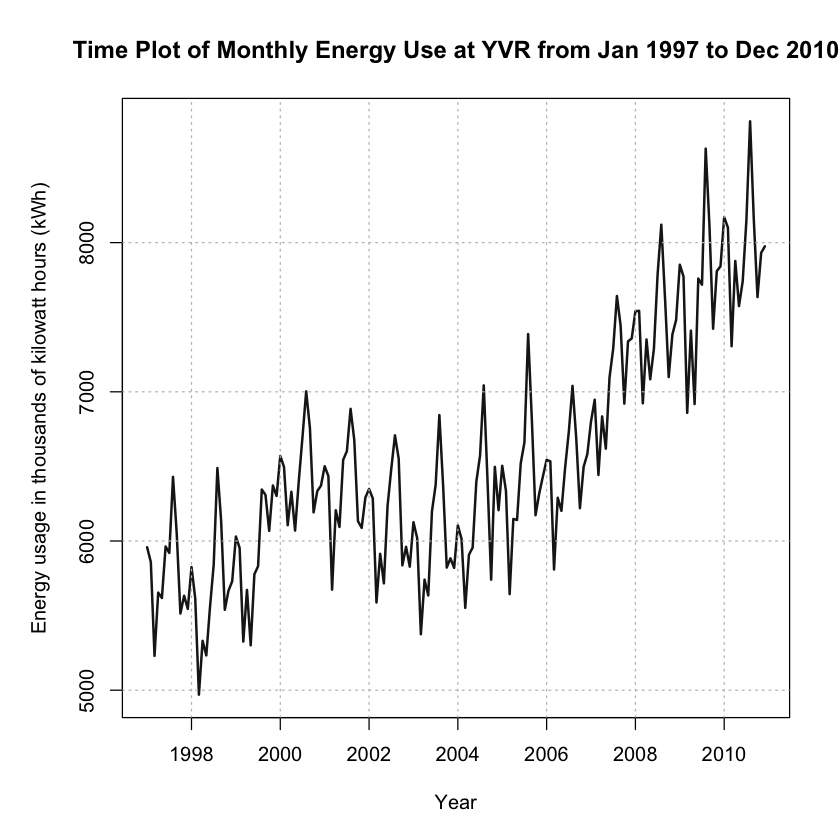

In [5]:
par(mar=c(5, 5, 4, 2) + 0.1)
plot(yvr_elec, main = "Time Plot of Monthly Energy Use at YVR from Jan 1997 to Dec 2010",
     ylab = "Energy usage in thousands of kilowatt hours (kWh)", xlab = "Year",
    lwd = 2, col = "gray11")
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")


### Box-Cox transformation

In [6]:
lambda <- BoxCox.lambda(yvr_elec)
lambda

[1] 0.6931483

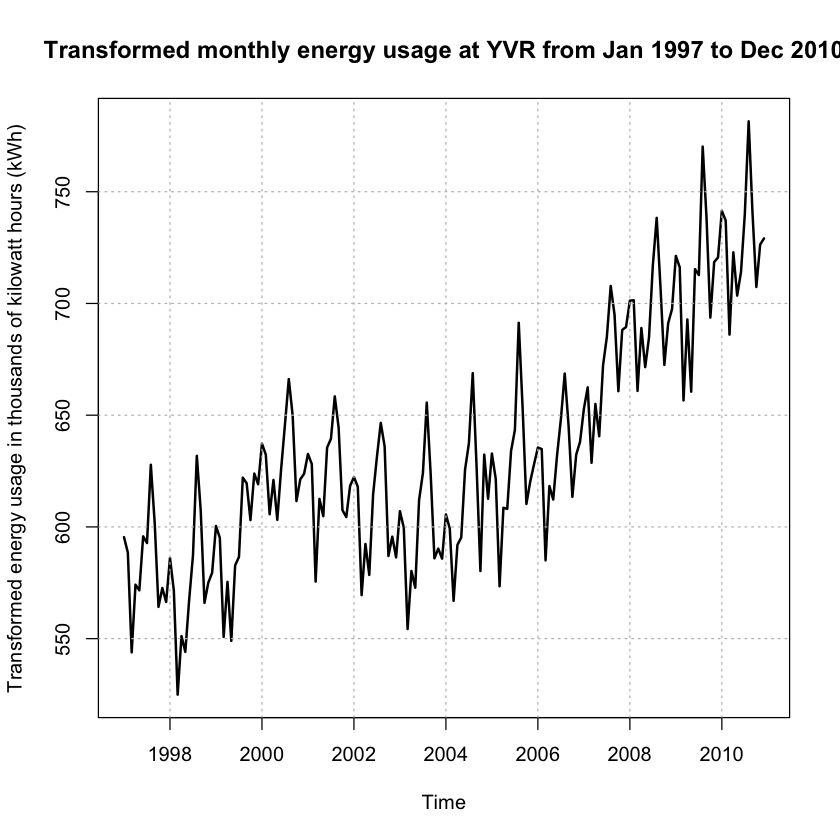

In [7]:
plot(BoxCox(yvr_elec,lambda), main = "Transformed monthly energy usage at YVR from Jan 1997 to Dec 2010",
    ylab = "Transformed energy usage in thousands of kilowatt hours (kWh)",
    lwd = 2)
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")

**Explanation**: Box-Cox transformation is used to make the seasonal variation approximately equal across the whole series. The plot of the transformed data indicates a more stabilized variance which means the transformation is effective.


### Calendar adjustment for number of days in each month

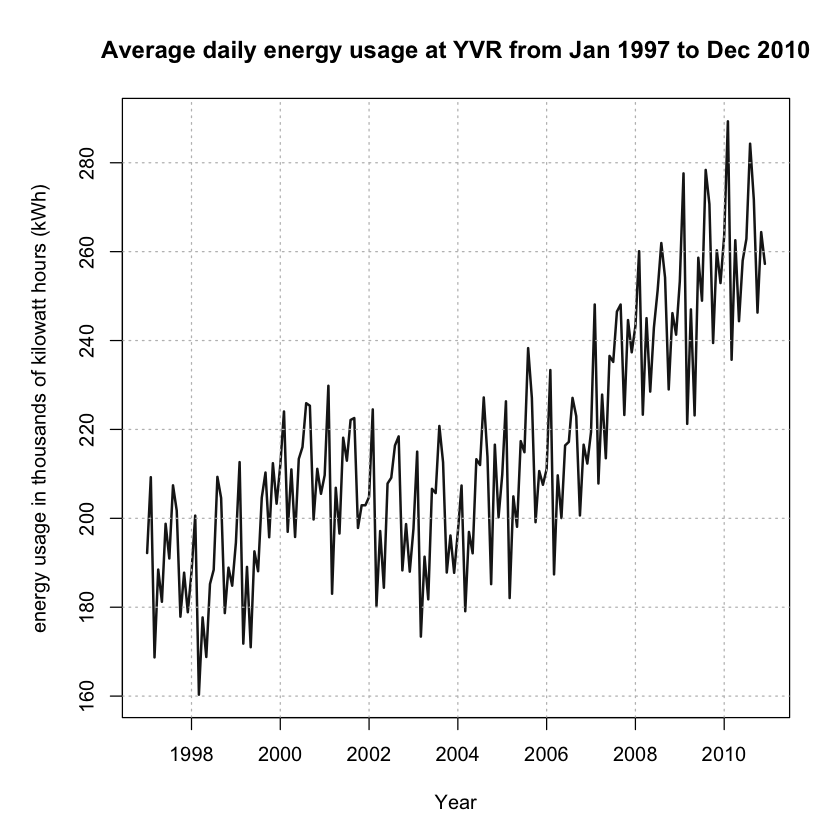

In [8]:
yvr_elec_cl <- yvr_elec/monthdays(yvr_elec)

par(mar=c(5, 5, 4, 2) + 0.1)
plot(yvr_elec_cl, main = "Average daily energy usage at YVR from Jan 1997 to Dec 2010",
     ylab = "energy usage in thousands of kilowatt hours (kWh)", xlab = "Year",
     cex.main=1.2, lwd = 2, col = "gray11")
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")



**Explanation**: Calendar adjustment is used to remove the variation due to calendar effects before fitting the model. The adjustment is effective because it allows a fair comparison of energy usage across months, removing the effects of different number of days in a month, and also stabilize the seasonal patterns in the data.

**Holiday Adjustment**: the airport could be extremely popular during the holidays and will cause more energy usage. Removing holidays from the data may stabilize the seasonal patterns better.

### Divide the data into the training set and the test set

In [9]:
yvr.train <- window(yvr_elec, end = c(2007,12))
yvr.test <- window(yvr_elec, start = c(2008,1))

In [10]:
yvr.train

Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec 
1997 5958 5859 5230 5654 5618 5963 5920 6430 6053 5514 5633 5545
1998 5825 5617 4970 5331 5233 5557 5841 6489 6138 5539 5667 5730
1999 6030 5954 5326 5672 5301 5777 5831 6345 6309 6068 6372 6302
2000 6570 6497 6106 6330 6070 6401 6697 7003 6760 6192 6334 6371
2001 6501 6435 5674 6206 6094 6544 6602 6886 6677 6133 6088 6291
2002 6349 6286 5588 5914 5716 6235 6483 6708 6553 5837 5961 5828
2003 6126 6020 5375 5741 5635 6199 6376 6844 6379 5822 5884 5820
2004 6105 6014 5552 5908 5956 6399 6572 7043 6418 5741 6497 6207
2005 6504 6337 5644 6148 6141 6521 6661 7387 6815 6173 6319 6434
2006 6544 6534 5809 6290 6202 6492 6733 7040 6690 6220 6497 6582
2007 6802 6947 6443 6835 6619 7096 7291 7642 7443 6921 7338 7358

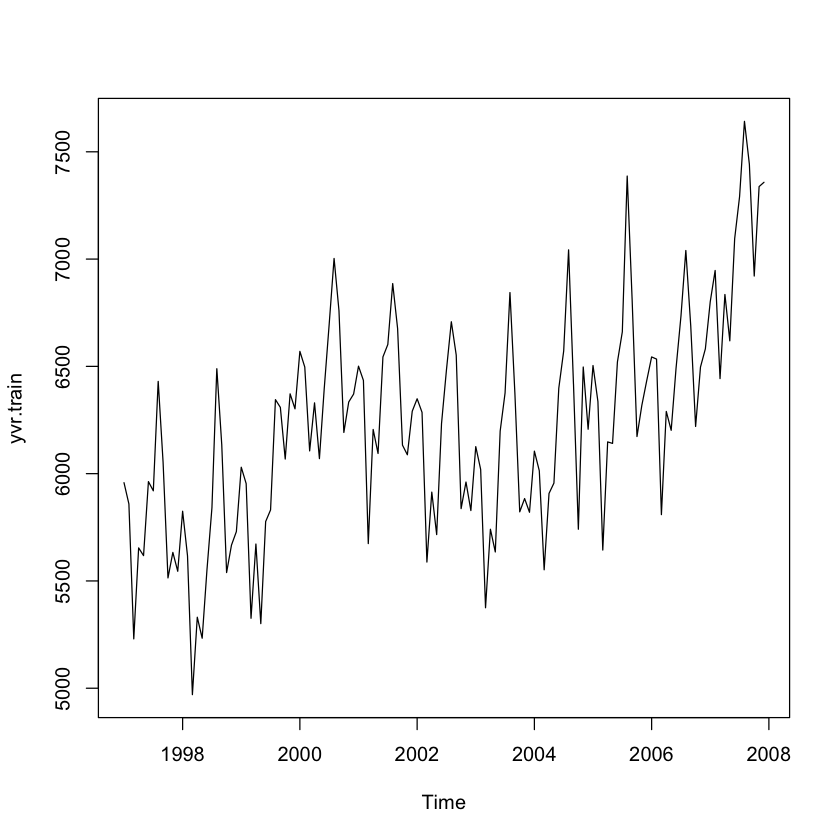

In [11]:
plot(yvr.train)

----

<div class="alert alert-block alert-info">   

# Part B
### Note that Part B includes everything below this header
<a id="PartB"></a>  

</div>

<div class="alert alert-block alert-danger">
    
### Make sure that your code is organized and includes useful annotations and written descriptions of what you are seeing on plots or the conclusions that you are drawing. (0.5 marks)
  
### Prepare all plots for publication by including detailed axis labels.
    
### Complete anwers will include observations and conclusions/interpretations.
<div>

<div class="alert alert-block alert-success">
<a id="Introduction"></a>  

# Introduction & Approach (250 words max.) (2 marks)
Write an introduction to the project and explain the overall approach.  

What to include: objective, purpose of the analysis (benefit to the organization), background information, brief description of the approach that is being taken to achieving the objective.
    
If you include any references, please put the bibliographical information at the end of your introduction; this does not contribute to the word count. **Make sure to write in your own words.**  

</div>

<h3 style = "color:#4863A0"> Objective and Background Information</h3>
<p style = "color:#4863A0"> Energy consumption is essential in today's world, directly linked to environmental concerns globally. Airports, which utilize energy for various operations including escalators, heating, cooling, lighting, and safety, face the challenge of managing energy efficiently to enhance operational performance, maximize stakeholder value, and minimize environmental impact. The goal of this project is to devise an accurate energy use forecasting model for Vancouver Airport (YVR), aiming to improve resource optimization, strategic planning, budgeting, and sustainability initiatives.

<h3 style = "color:#4863A0"> Our Approach</h3>
<p style = "color:#4863A0">Our approach began with evaluating basic forecasting methods such as the mean, drift, naïve, and seasonal naïve techniques to establish a foundational understanding of the data's complexity and the airport's operational dynamics. We then conducted an in-depth analysis to identify the most effective ETS and ARIMA models, employing advanced techniques to ensure these models precisely reflect YVR's energy consumption patterns. Among all the models we tested, we finally select one best method for predicting energy usage trends at the airport. In the last part of this analysis, we also discuss the potential improvements can be addressed.

----

<div class="alert alert-block alert-warning">
<a id="EDA1"></a>

# Exploratory Data Analysis (300 words max.) (4 marks)  

Create plots of the electricity use data (**use all the data, not just the training set**); prepare them as if for publication and upload them. Include a decomposition plot from STL decomposition.  

Describe the characteristics of trend, cycle and seasonality in detail, referring to specific characteristics of the plots. Also mention any unusual features, if present. Be specific.  

<br>

Organize your answers as follows:  

Seasonality: ...  
    
Trend/cycle: ...  

Unusual features: ...  
</div>

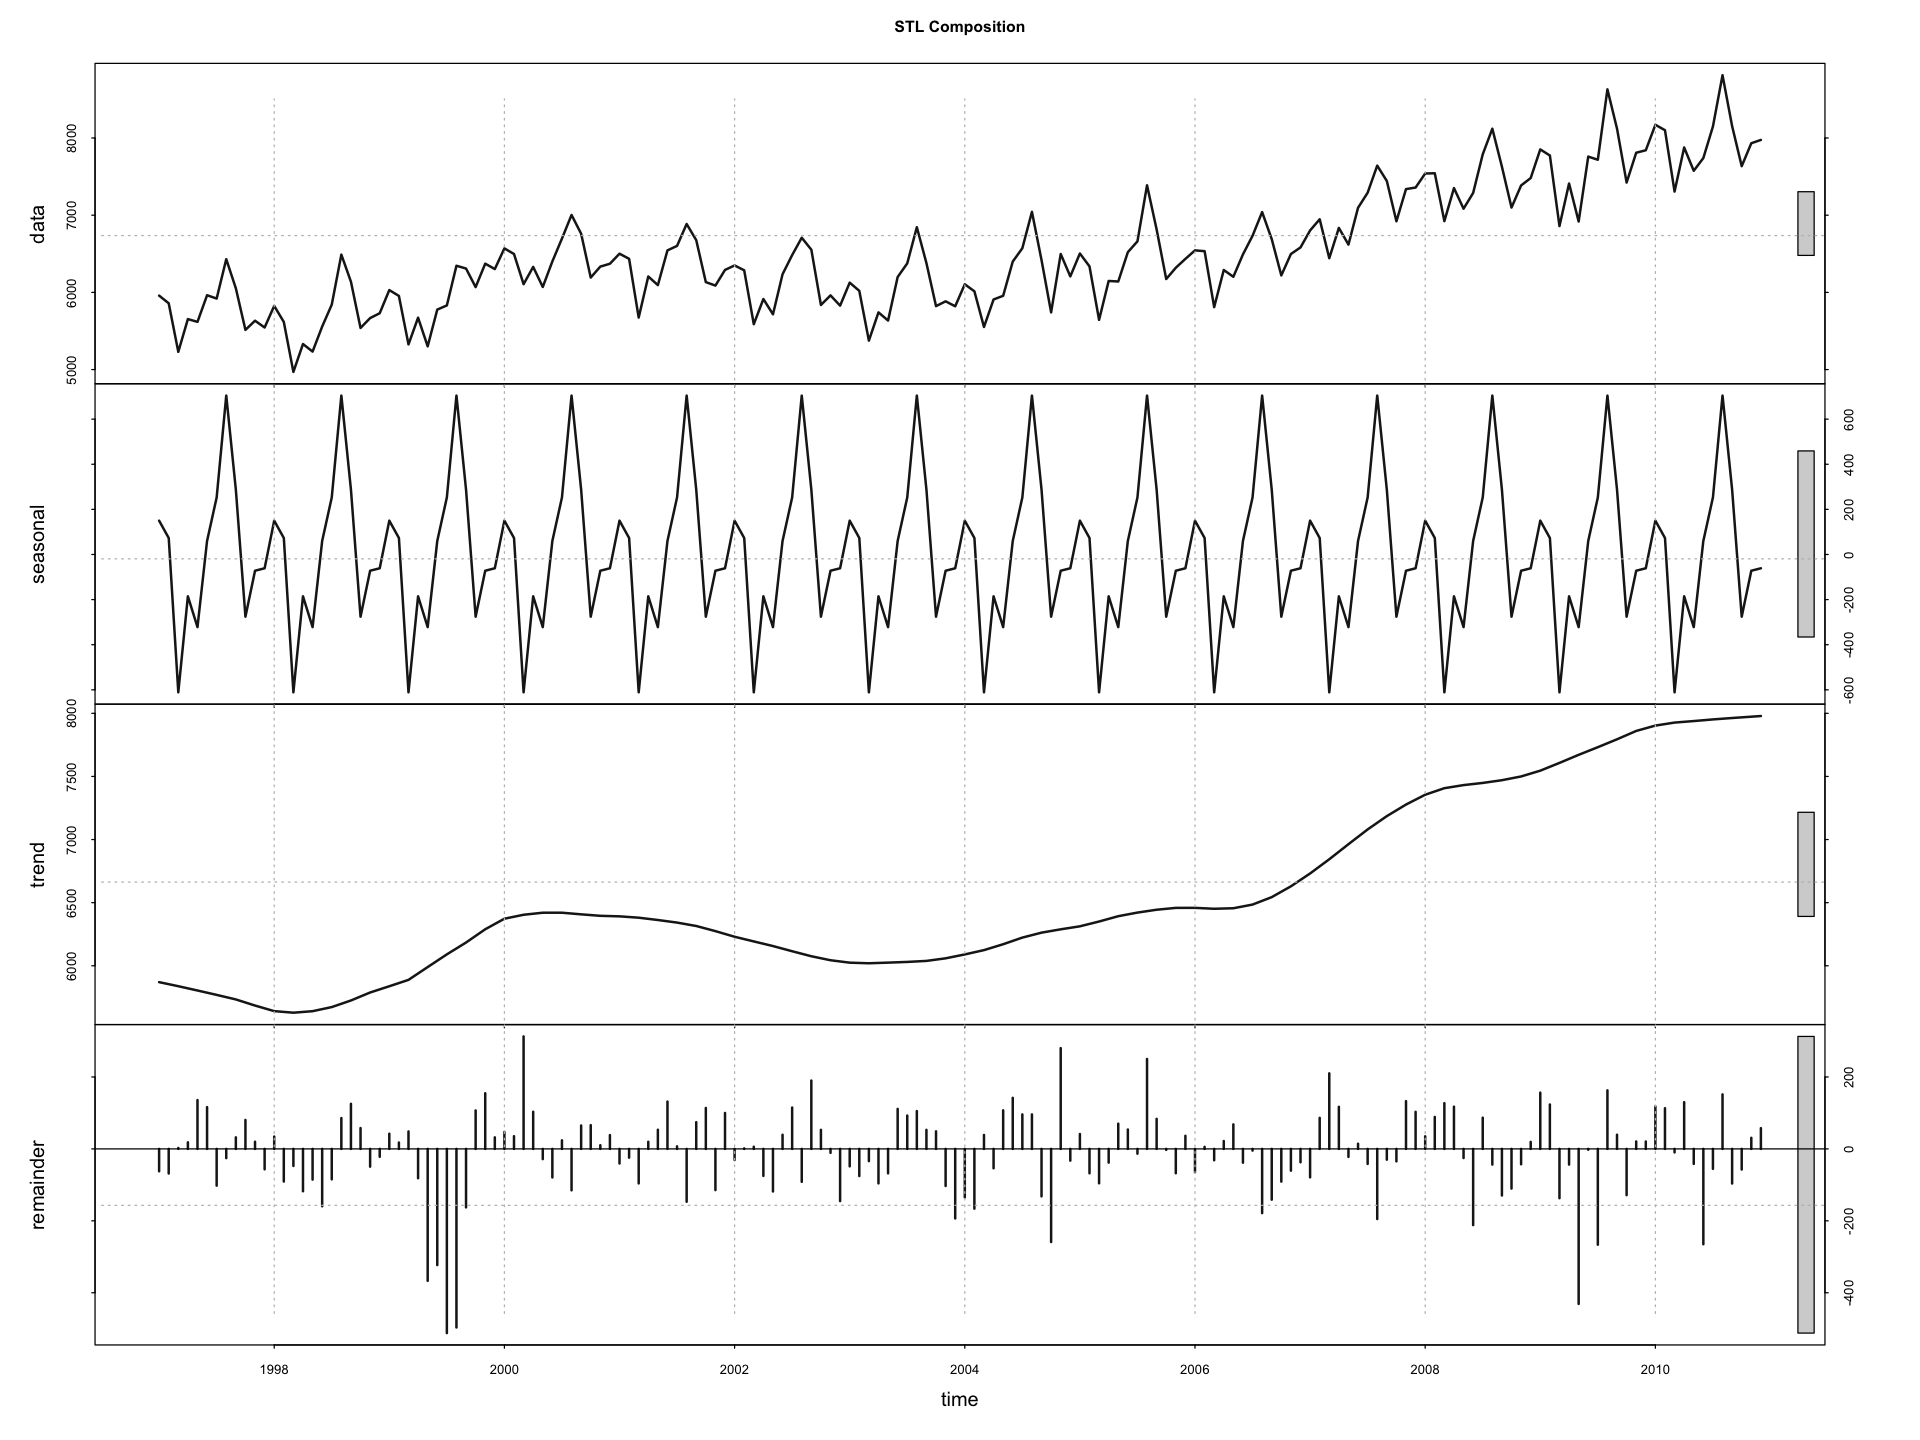

In [12]:
# STL decomposition
options(repr.plot.width=16, repr.plot.height=12)

stl <- stl(yvr_elec, s.window="periodic", robust=TRUE)
plot(stl, main = "STL Composition",
     cex.main= 2, lwd = 2, col = "gray11")
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")


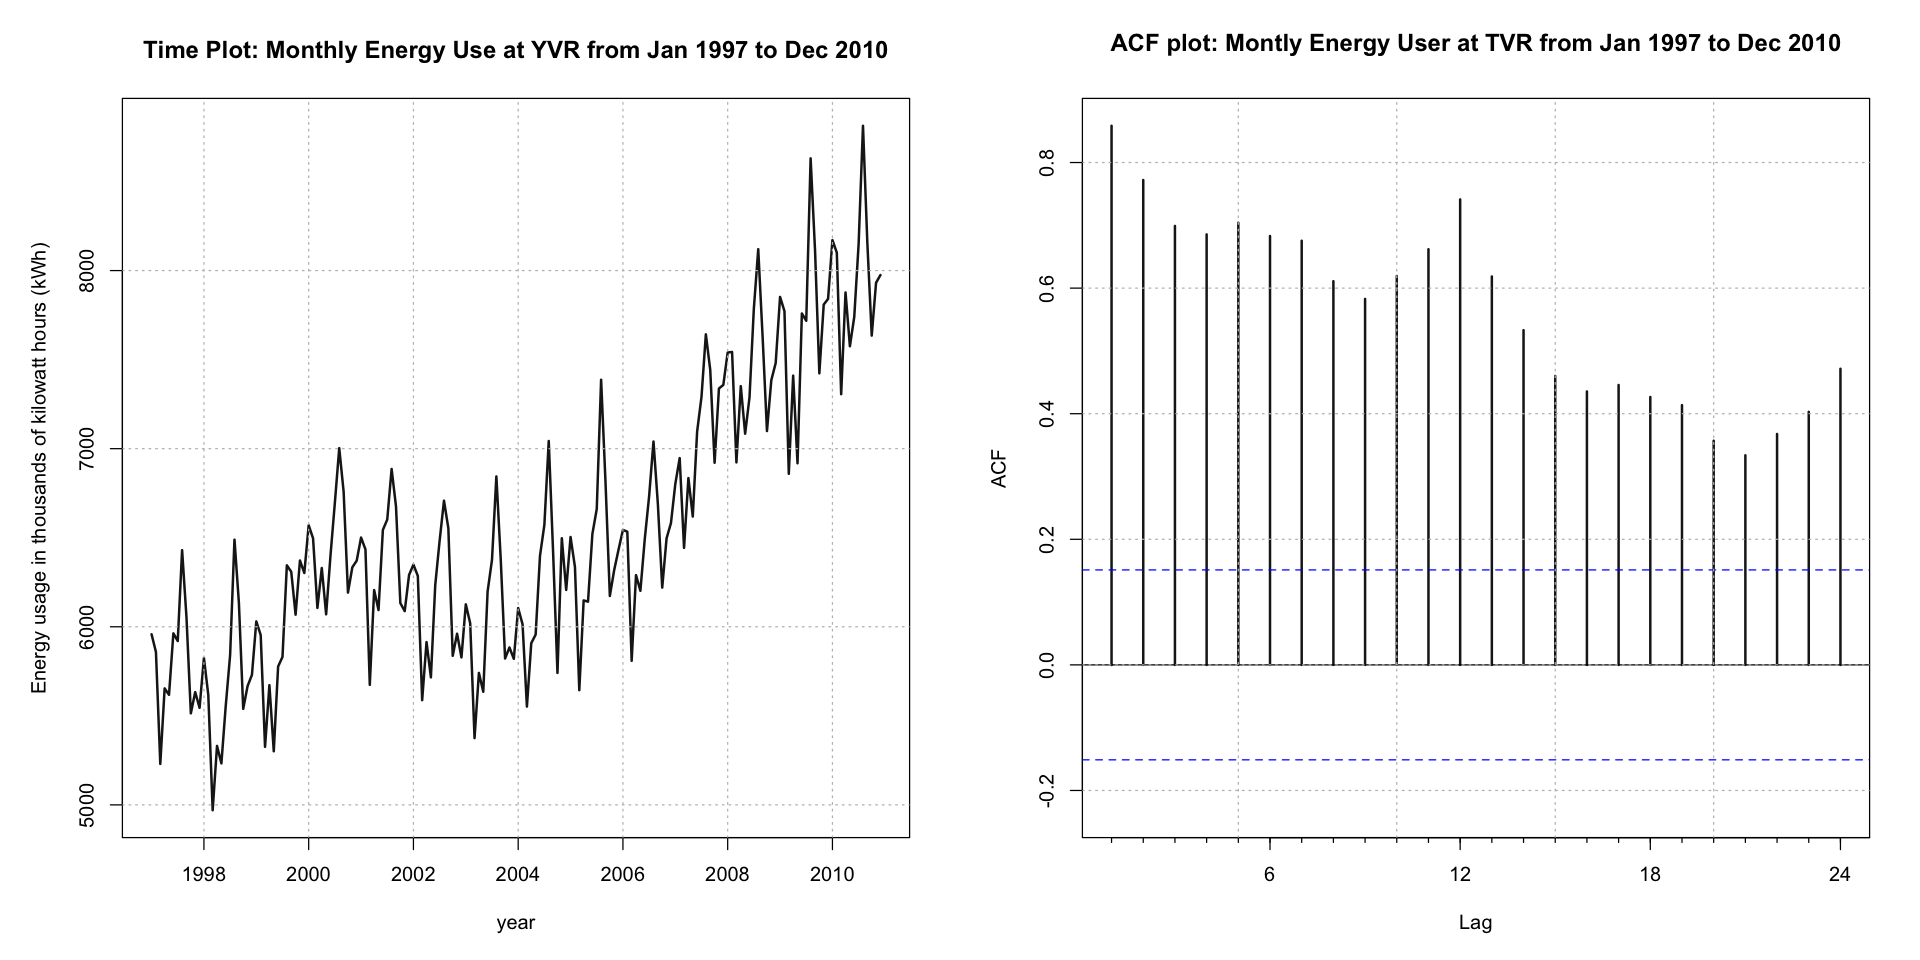

In [13]:
# Time plot and ACF
options(repr.plot.width=16, repr.plot.height=8)
par(mfrow=c(1,2))

## Time plot
par(mar=c(5, 5, 4, 2) + 0.1)
plot(yvr_elec, main = "Time Plot: Monthly Energy Use at YVR from Jan 1997 to Dec 2010",
     ylab = "Energy usage in thousands of kilowatt hours (kWh)", xlab = "year",
     cex.main= 1.2, lwd = 2, col = "gray11")
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")

## Acf plot
par(mar=c(5, 5, 4, 2) + 0.1)
Acf(yvr_elec, main = "ACF plot: Montly Energy User at TVR from Jan 1997 to Dec 2010",
     cex.main=1.2, lwd = 2, col = "gray11")
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")

In [14]:
# Design ggplot theme
custom_theme1 <- theme(
    plot.title = element_text(size = 12, face = "bold", hjust = 0.5) , # set title feature
    axis.title.y = element_text(size = 11, color = "gray36", margin = margin(r = 20, unit = "pt")), # set ylab feature
    axis.title.x = element_text(size = 11, color = "gray36"), # set xlab feature 
    legend.title = element_text(size = 11),
    legend.text = element_text(size = 11),
    legend.key.size = unit(1, "lines"),
    panel.background = element_rect(fill = "white"), # remove gray background
    panel.grid.major = element_line(color = "gray", linewidth = 0.3, linetype = "dotted"), # change the grid style
    panel.grid.minor = element_line(color = "gray", linewidth = 0.3, linetype = "dotted"),
    )

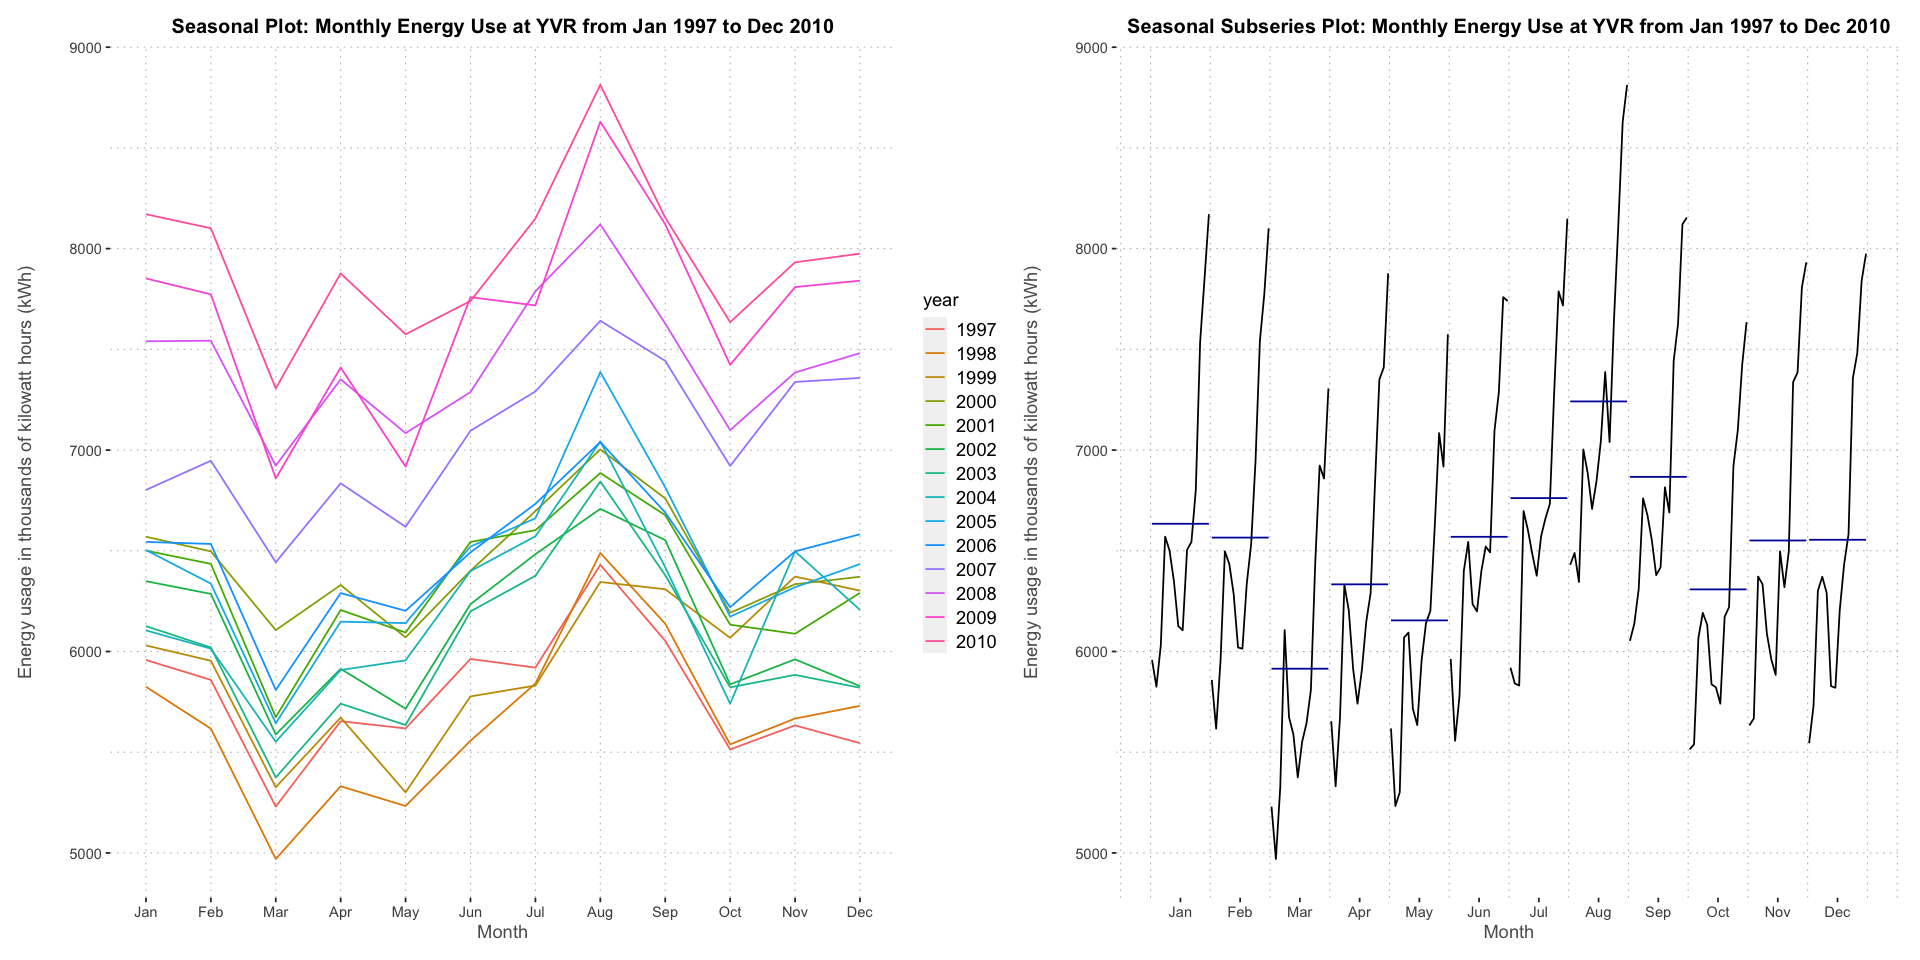

In [15]:
# Seasonal Plots
options(repr.plot.width=16, repr.plot.height=8)

## Seasonal Plot
pseas <- ggseasonplot(yvr_elec) +
ggtitle("Seasonal Plot: Monthly Energy Use at YVR from Jan 1997 to Dec 2010") +
ylab("Energy usage in thousands of kilowatt hours (kWh)") +
custom_theme1

## Seasonal Subseries Plot
pss <- ggsubseriesplot(yvr_elec) +
ggtitle("Seasonal Subseries Plot: Monthly Energy Use at YVR from Jan 1997 to Dec 2010") +
ylab("Energy usage in thousands of kilowatt hours (kWh)") +
custom_theme1

# Arrange plots side by side with patchwork
pseas + pss

<h3 style = "color:#4863A0">Seasonality

<p style = "color:#4863A0">- The seasonality component clearly shows a repeating pattern with a period of 1 year, with peak in August and valley in March.
- The size of the seasonal fluctuations appears to be fairly consistent over time.

<h3 style = "color:#4863A0">Trend/cycle

<p style = "color:#4863A0">- The trend component exhibits a general increase over time, with a roughly linear trend.

<h3 style = "color:#4863A0"> Unusual Features</h3>

<p style = "color:#4863A0">- The yearly level slightly decrease from year 2000 to 2003.

<div class="alert alert-block alert-warning">
<a id="Causes"></a>

# Potential causes (300 words max.) (3 marks)

Describe what could be causing the patterns that you are seeing in electricity use. Create any relevant plots and include them. Make sure to discuss any specific features of plots. Remember that the original dataset includes other variables! (300 words max.)  
</div>

In [16]:
# make the whole dataset into a time series object
yvr_ts <- ts(yvr[,2:5], start = c(1997,1), frequency = 12)

# make temperatuer, passenger and area tiem series objects
yvr_temp <- ts(yvr[,3], start = c(1997,1), frequency = 12)
yvr_pass <- ts(yvr[,5], start = c(1997,1), frequency = 12)
yvr_area <- ts(yvr[,4], start = c(1997,1), frequency = 12)

<h3 style = "color:#4863A0"> Energy use VS Terminal Area</h3>

<p style = "color:#4863A0"><b>Relationship: </b>The scatter plot reveals a positive correlation between energy usage and the size of the terminal area, indicating that as the terminal area increases, there is a corresponding rise in energy consumption. This relationship suggests a direct link between the physical dimensions of the terminal and the amount of energy required to maintain its operations, highlighting the impact of spatial factors on energy utilization within the terminal environment. The time plot and the STL trend component exhibit matching trends, indicating a consistent pattern observed in both analyses.

<h3 style = "color:#4863A0"> Energy use VS Temperature</h3>

<p style = "color:#4863A0"><b>Seasonality: </b>There is a distinct pattern of increased energy consumption corresponding to periods when the temperature rises above or drops below the optimal range for comfort. This trend suggests that energy usage intensifies both during higher temperatures and when conditions become cooler than what is considered ideal.

<p style = "color:#4863A0"><b>Relationship</b>: The scatter plot analysis does not reveal any straightforward relationships; However, there is a positive correlation observed between temperature and the total number of passengers.

<h3 style = "color:#4863A0"> Energy use VS Total Passengers</h3>

<p style = "color:#4863A0"><b>Relationship: </b> From the scatter plot, we can see that there is a positive correlation between energy use and the total number of passengers.

<p style = "color:#4863A0"><b>Seasonality: </b>These plots indicate that the peaks and valleys of the energy use and total passengers are alinged. 

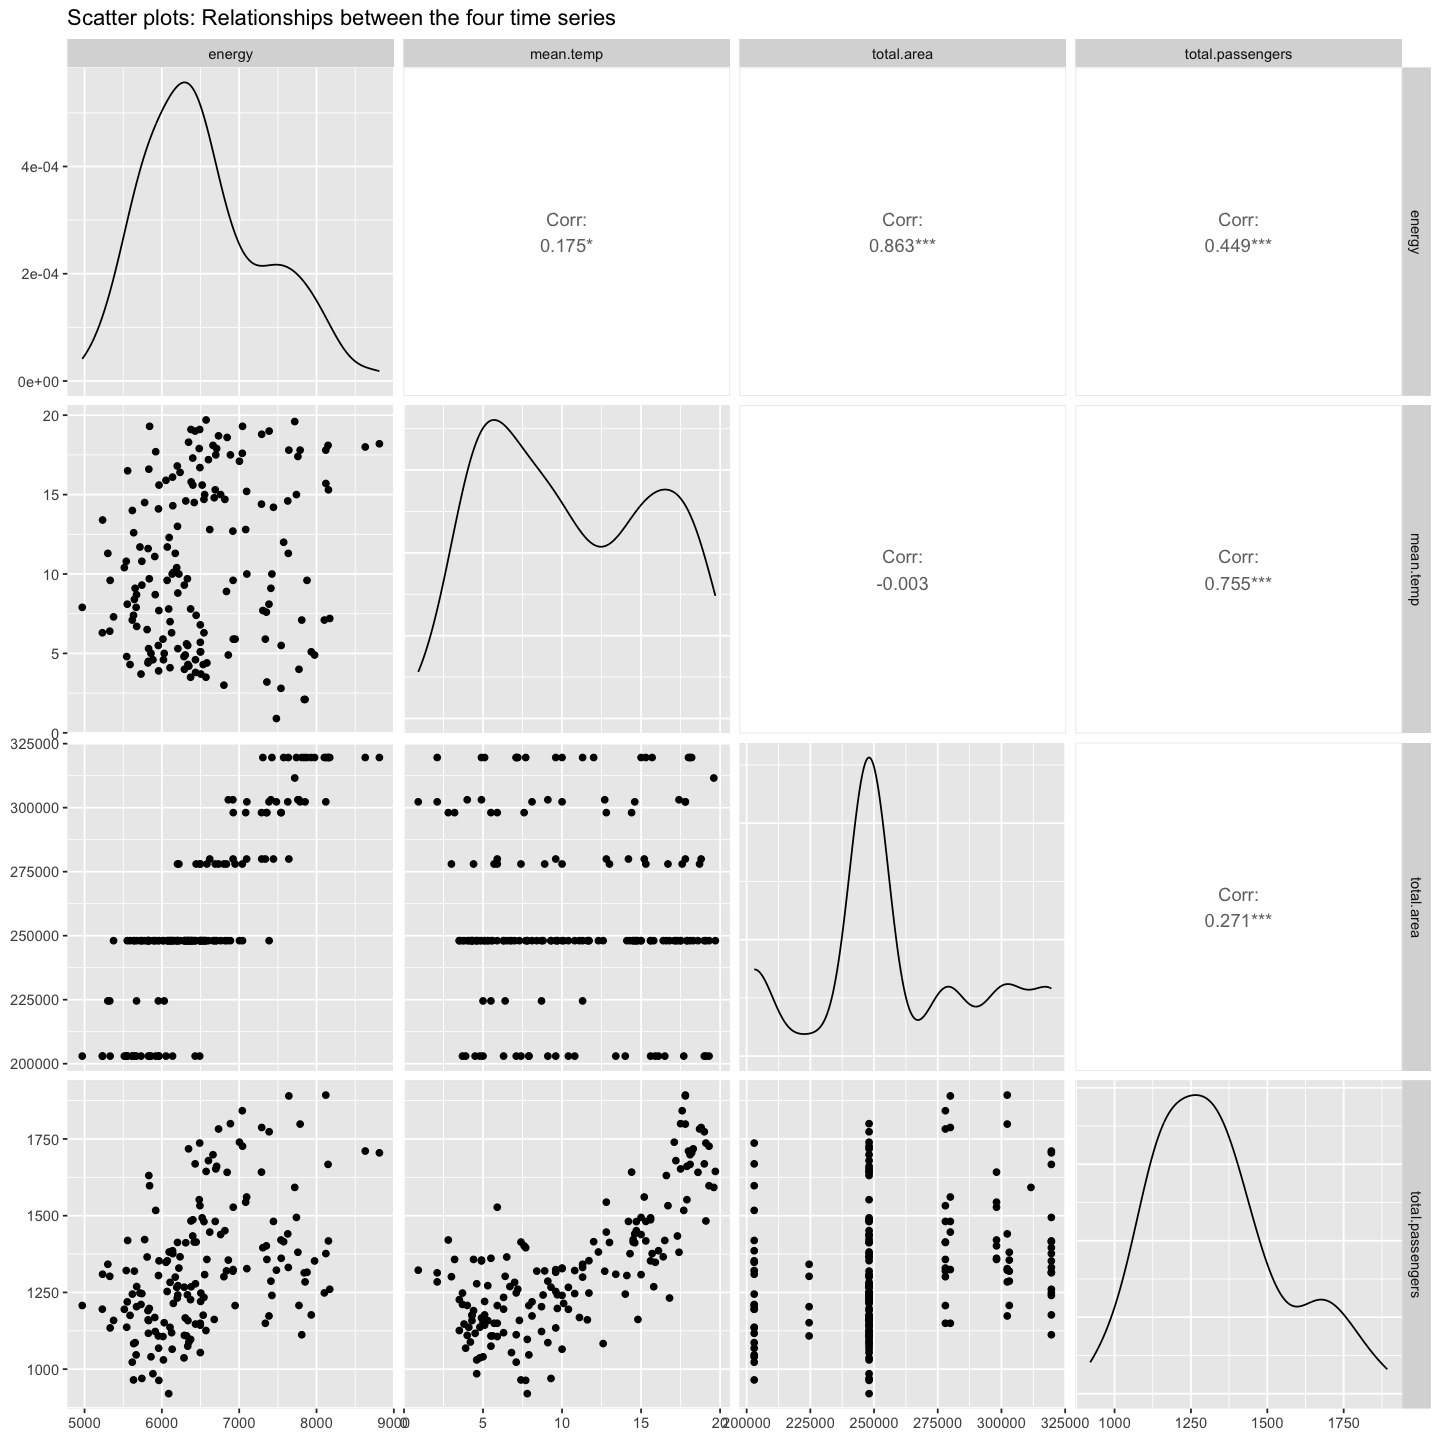

In [17]:
options(repr.plot.width=12, repr.plot.height=12)
ggpairs(as.data.frame(yvr_ts[,1:4])) +
    ggtitle("Scatter plots: Relationships between the four time series")

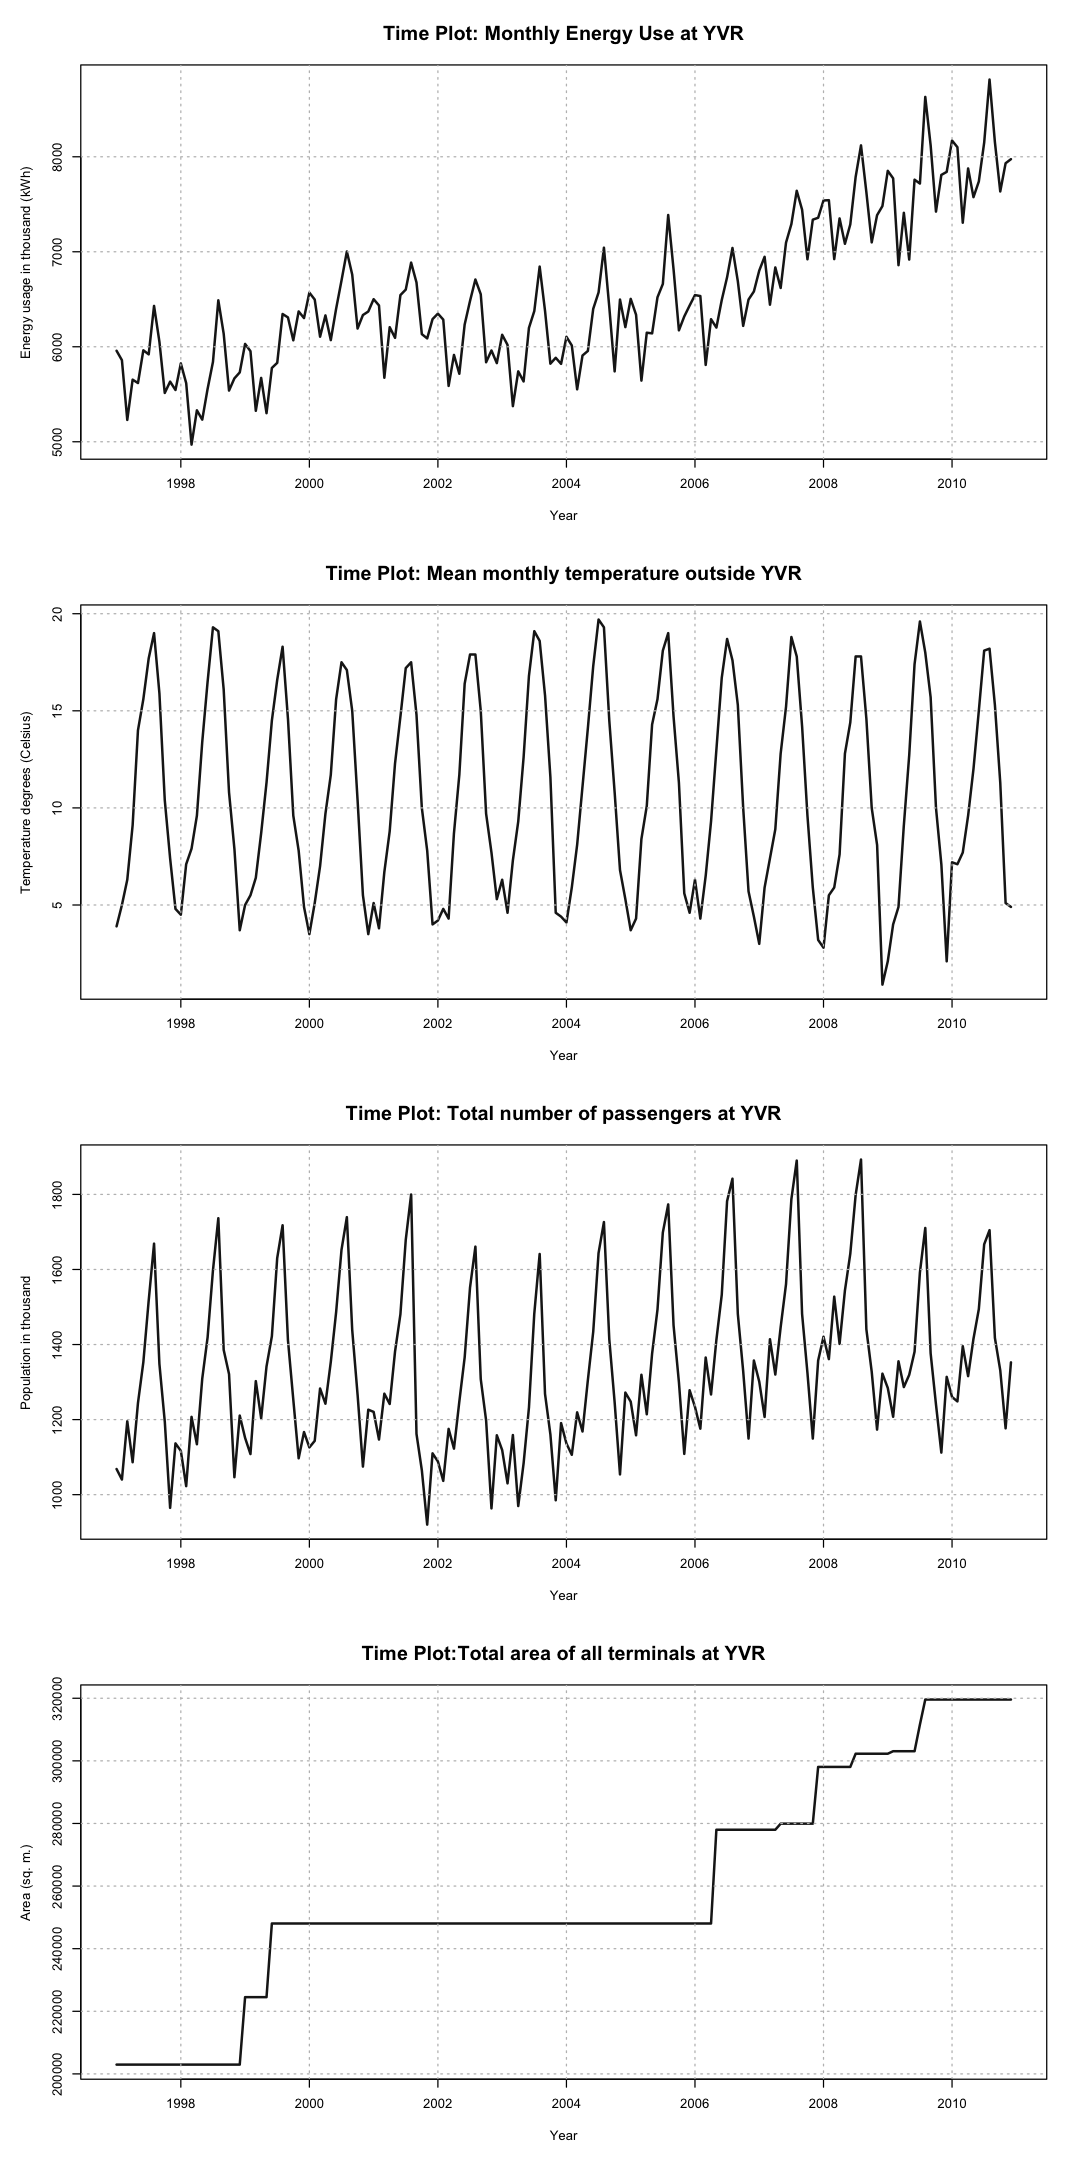

In [18]:
# Time plots
options(repr.plot.width=9, repr.plot.height=18)
par(mfrow=c(4,1))


## Time plot of energy use
par(mar=c(5, 5, 4, 2) + 0.1)
plot(yvr_elec, main = "Time Plot: Monthly Energy Use at YVR",
     ylab = "Energy usage in thousand (kWh)",xlab = "Year",
     cex.main= 1.5, lwd = 2, col = "gray11")
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")

## Time plot of temperature
par(mar=c(5, 5, 4, 2) + 0.1)
plot(yvr_temp, main = "Time Plot: Mean monthly temperature outside YVR",
     ylab = "Temperature degrees (Celsius)",xlab = "Year",
     cex.main= 1.5, lwd = 2, col = "gray11")
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")

## Time plot of passengers
par(mar=c(5, 5, 4, 2) + 0.1)
plot(yvr_pass, main = "Time Plot: Total number of passengers at YVR",
     ylab = "Population in thousand",xlab = "Year",
     cex.main= 1.5, lwd = 2, col = "gray11")
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")

## Time plot of area
par(mar=c(5, 5, 4, 2) + 0.1)
plot(yvr_area, main = "Time Plot:Total area of all terminals at YVR",
     ylab = "Area (sq. m.)",xlab = "Year",
     cex.main= 1.5, lwd = 2, col = "gray11")
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")

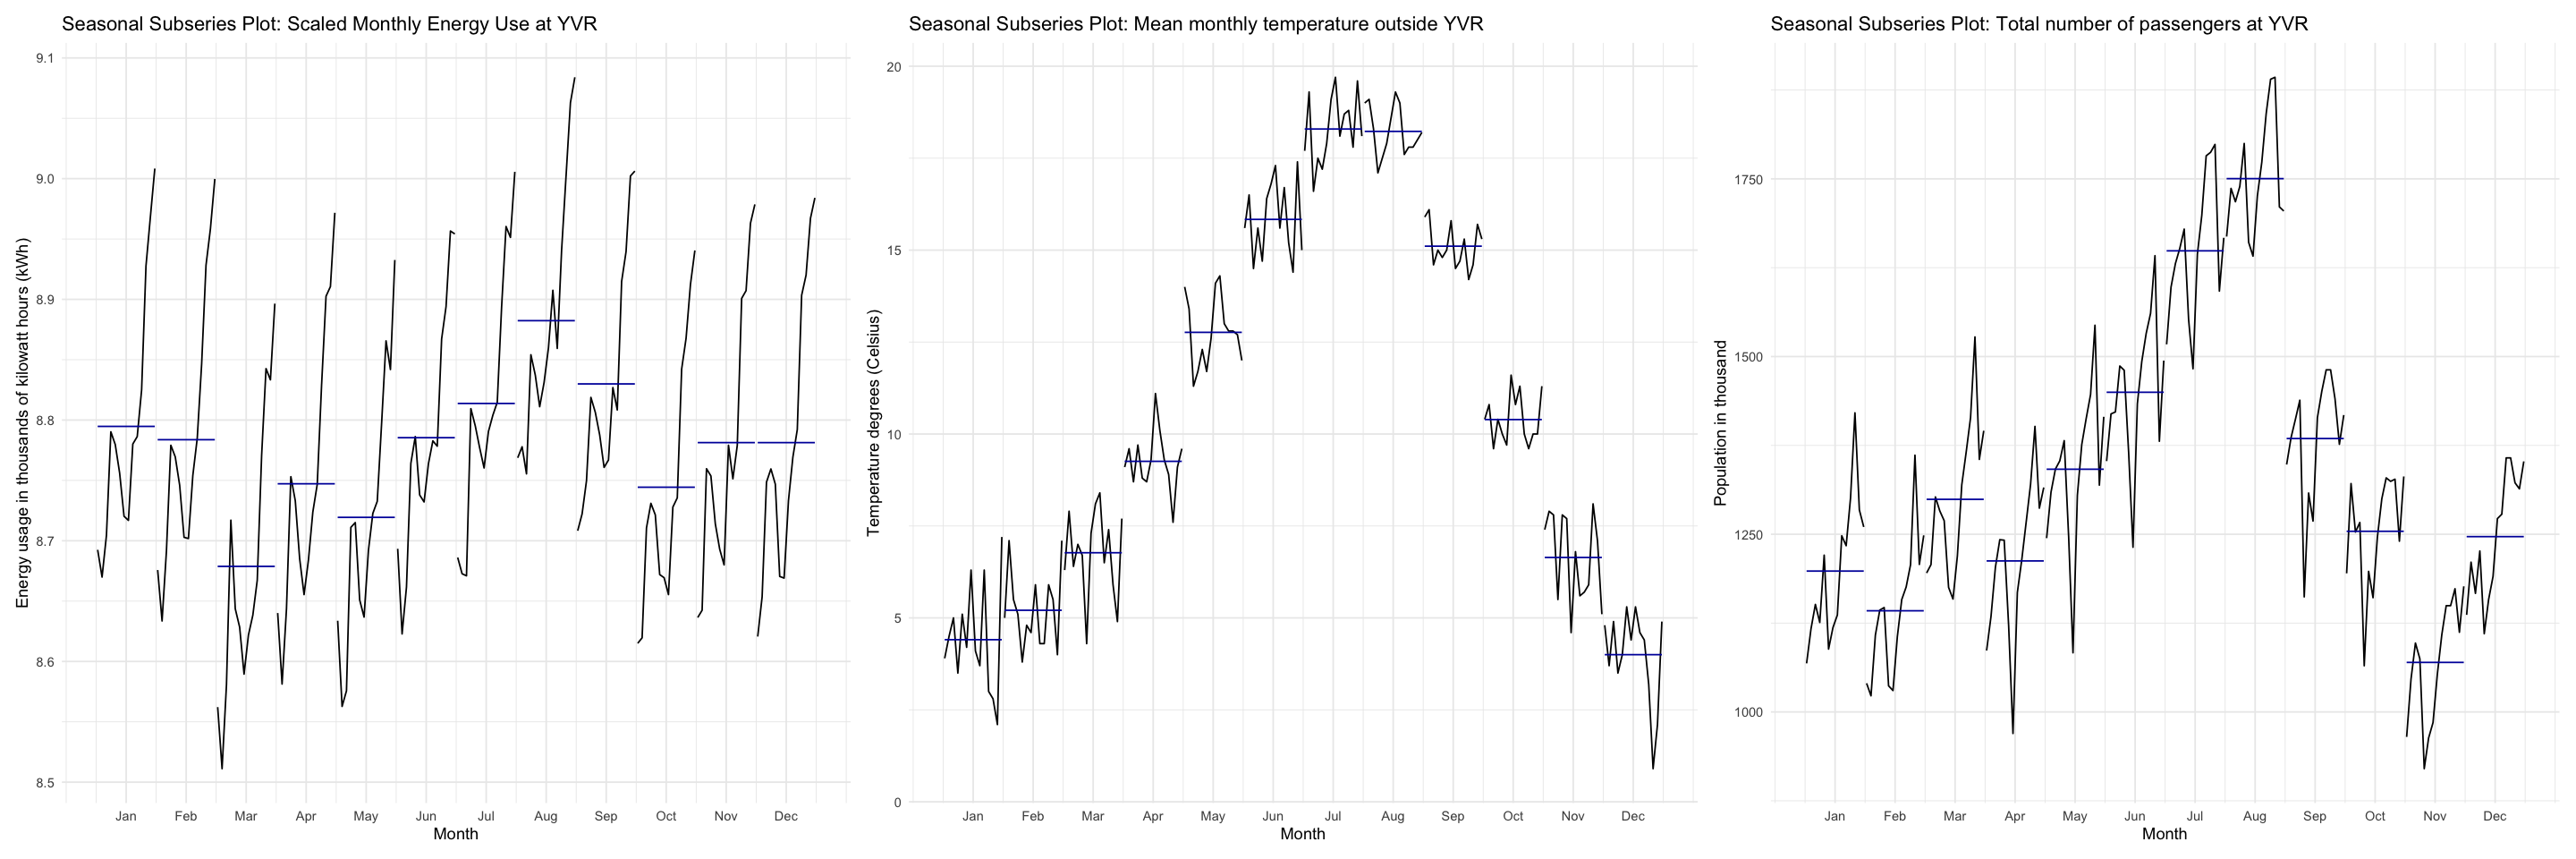

In [19]:
# Seasonal plots
options(repr.plot.width=24, repr.plot.height=8)

## Seasonal Subseries Plot
s1 <- ggsubseriesplot(log(yvr_elec)) +
ggtitle("Seasonal Subseries Plot: Scaled Monthly Energy Use at YVR") +
ylab("Energy usage in thousands of kilowatt hours (kWh)") +
theme_minimal()

s2 <- ggsubseriesplot(yvr_temp) +
ggtitle("Seasonal Subseries Plot: Mean monthly temperature outside YVR") +
ylab("Temperature degrees (Celsius)") +
theme_minimal()

s3 <- ggsubseriesplot(yvr_pass) +
ggtitle("Seasonal Subseries Plot: Total number of passengers at YVR") +
ylab("Population in thousand") +
theme_minimal()

# Arrange plots side by side with patchwork
s1 + s2 + s3

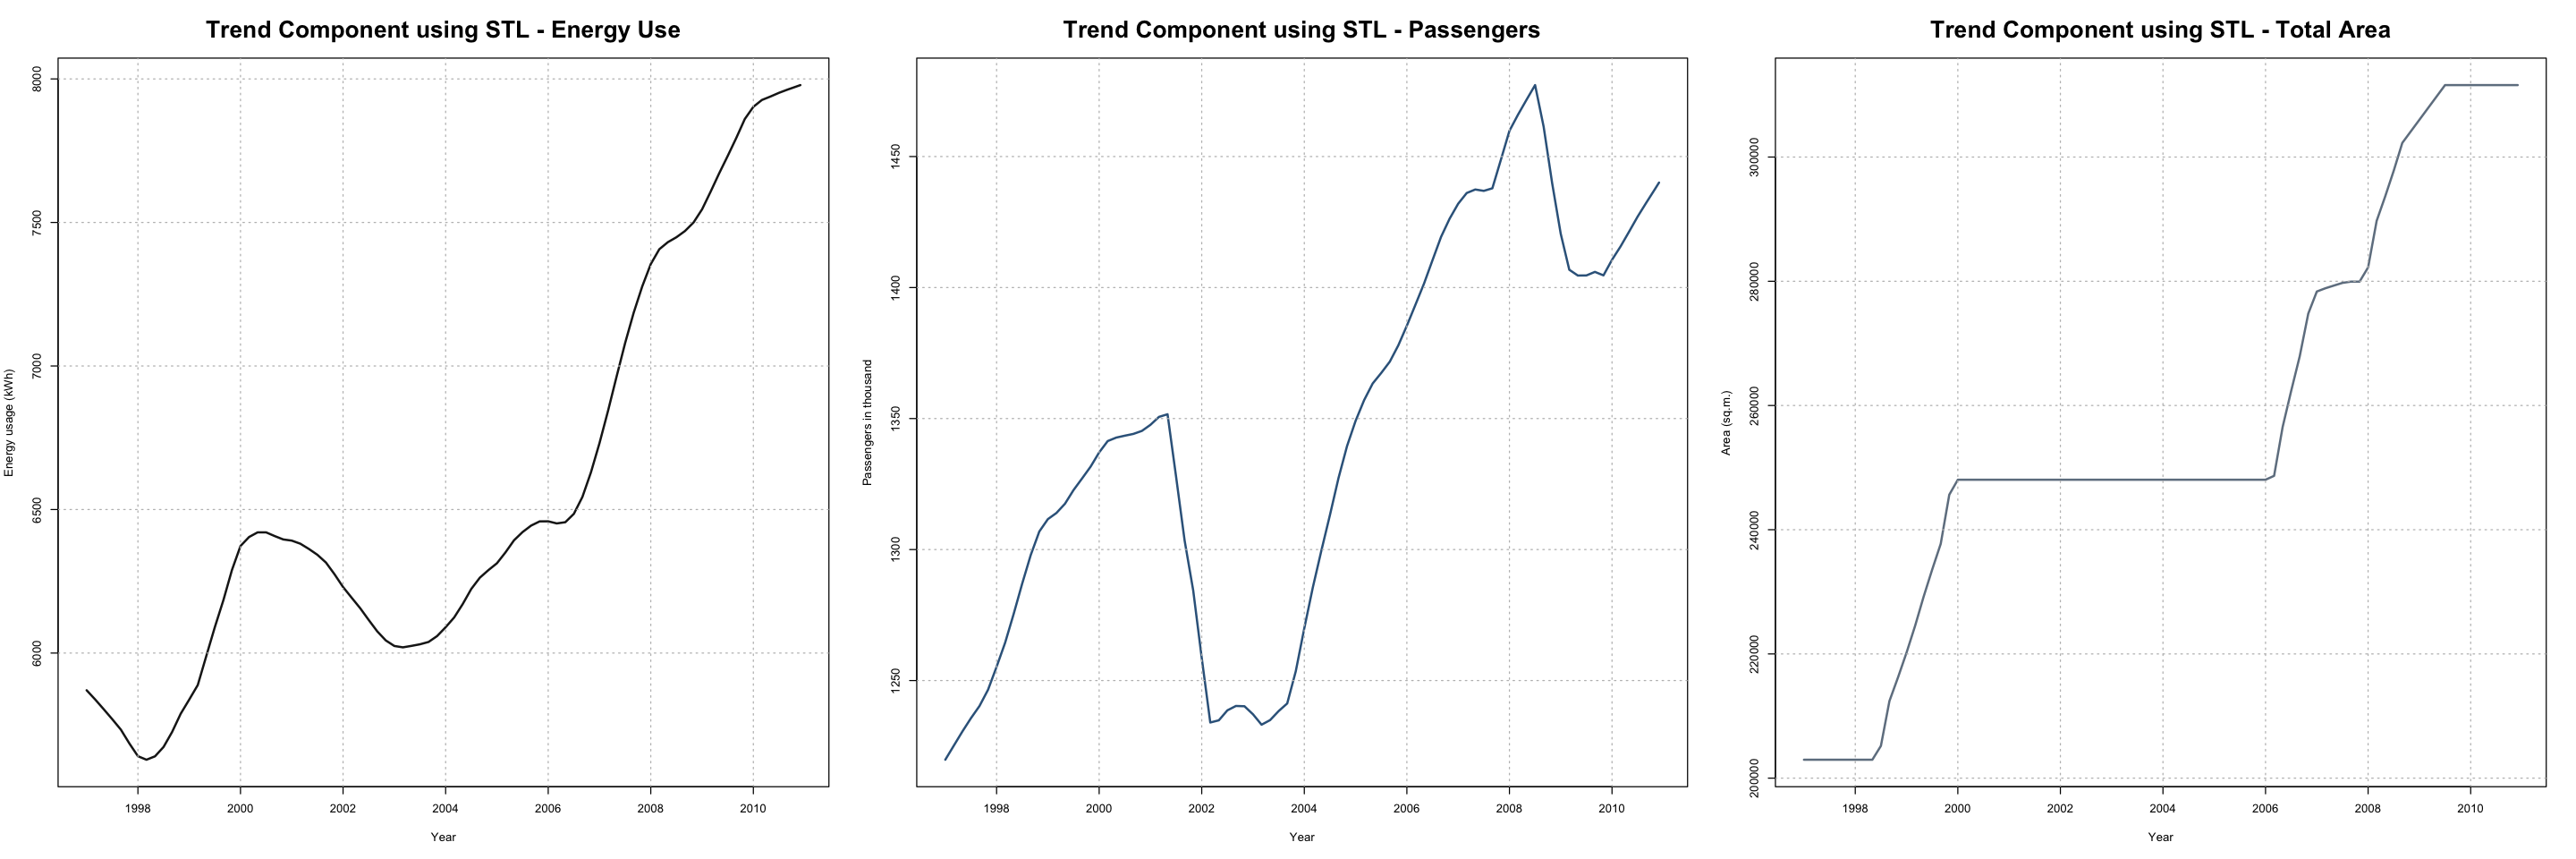

In [20]:
# Trend plots
options(repr.plot.width=24, repr.plot.height=8)
par(mfrow=c(1,3))

stl_elec <- stl(yvr_elec, s.window="periodic", robust=TRUE)
plot(stl_elec$time.series[, "trend"], main = "Trend Component using STL - Energy Use", ylab = "Energy usage (kWh)",xlab = "Year",
     cex.main= 2, lwd = 2, col = "gray11")
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")

stl_pass <- stl(yvr_pass, s.window="periodic", robust=TRUE)
plot(stl_pass$time.series[, "trend"], main = "Trend Component using STL - Passengers", ylab = "Passengers in thousand",xlab = "Year",
     cex.main= 2, lwd = 2, col = "steelblue4")
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")

stl_area <- stl(yvr_area, s.window="periodic", robust=TRUE)
plot(stl_area$time.series[, "trend"], main = "Trend Component using STL - Total Area", ylab = "Area (sq.m.)",xlab = "Year",
     cex.main= 2, lwd = 2, col = "slategrey")
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")

----

<div class="alert alert-block alert-success">
<a id="Basic"></a>

# Basic forecasting methods
</div>  

Use the basic methods we have learned to develop forecasts for the test set. Plot in the following colours:  

mean method (blue)  
drift method (green)  
naïve method (red)  
seasonal naïve method (purple)  

 
## Visual comparison and assessment of basic methods (1.25 marks)

Plot the training set and test set data in black. Include the forecasts of the test set for each of the basic forecasting methods in a different colour (colours are given above) with a legend to explain.  

Prepare the plot for publication and upload it.

 

From a visual assessment, which of the basic forecasting methods seems to produce the best forecasts of the test set? Discuss briefly. (4 sentences max.)  
    

<h3 style = "color:#4863A0"> Develop forcastes using four basic methods</h3>

In [21]:
fit1 <- meanf(yvr.train, h = 36)
fit2 <- rwf(yvr.train, h = 36)
fit3 <- rwf(yvr.train, drift = TRUE, h = 36)
fit4 <- snaive(yvr.train, h = 36)

<h3 style = "color:#4863A0"> Forecasts of the test set using the basic method</h3>

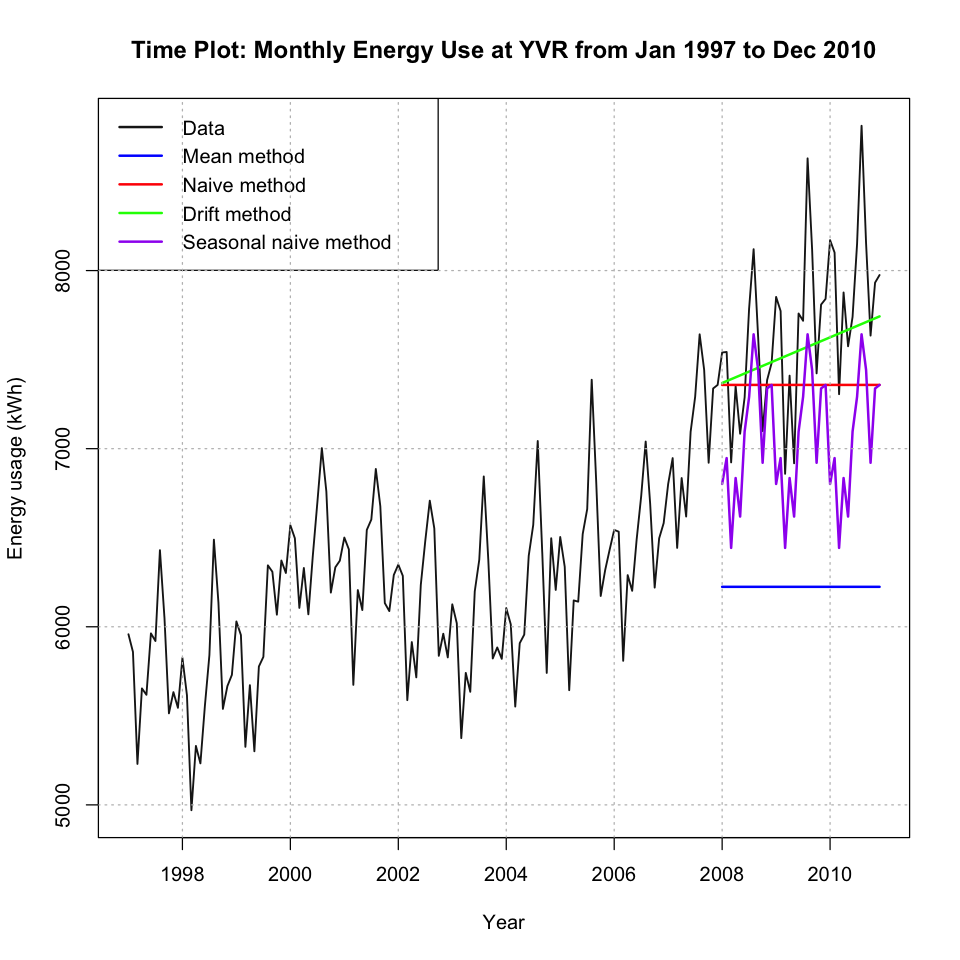

In [22]:
options(repr.plot.width=8, repr.plot.height=8)

plot(yvr_elec, main = "Time Plot: Monthly Energy Use at YVR from Jan 1997 to Dec 2010",
     ylab = "Energy usage (kWh)", xlab = "Year",
     cex.main= 1.2, lwd = 1.5, col = "gray11")
lines(fit1$mean, col = "blue", lwd = 2)
lines(fit2$mean, col = "red", lwd = 2)
lines(fit3$mean, col = "green", lwd = 2)
lines(fit4$mean, col = "purple", lwd = 2)
legend("topleft", lty = 1, lwd = 2, col = c("gray11","blue","red","green","purple"),
       c("Data", "Mean method", "Naive method", "Drift method", "Seasonal naive method"))
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")

<h3 style = "color:#4863A0"> Visual assessment of the four basic method</h3>

<p style = "color:#4863A0"> The <b>drift method </b>stands out as the optimal forecasting approach for energy usage at YVR, capturing the observed increasing trend without significant deviation from historical values, indicating a better fit compared to the other forecasting methods. </style>

## Accuracy measures (1 mark)
Create a table with the RMSE, MAE, MAPE, and MASE for the test set for each of the four basic methods. Round values to 1 decimal place.

In [23]:
# Calculate accuracy metrics for each model
acc1 <- accuracy(fit1, yvr.test)
acc2 <- accuracy(fit2, yvr.test)
acc3 <- accuracy(fit3, yvr.test)
acc4 <- accuracy(fit4, yvr.test)

# Create the metrics table
Basic_model <- c("mean method", "naive method", "drft method", "seasonal naive method")

metrics <- cbind(Basic_model, rbind(
  round(acc1[2, c("RMSE", "MAE", "MAPE", "MASE")], 1),
  round(acc2[2, c("RMSE", "MAE", "MAPE", "MASE")], 1),
  round(acc3[2, c("RMSE", "MAE", "MAPE", "MASE")], 1),
  round(acc4[2, c("RMSE", "MAE", "MAPE", "MASE")], 1)))

metrics


Basic_model           RMSE   MAE    MAPE MASE
[1,] mean method           1528.5 1463.8 18.8 5.5 
[2,] naive method          550.1  443.2  5.6  1.7 
[3,] drft method           416    328.5  4.2  1.2 
[4,] seasonal naive method 698.7  626.8  8    2.4

## Comparison of basic methods (1 mark)
Based on the accuracy measures for the test set, which of the basic forecasting methods seems to forecast the test set the best? Interpret the MASE for this method. (4 sentences max.) 

<p style = "color:#4863A0"><b>Drift Method</b>


<p style = "color:#4863A0">Given the metrics for the test set, the <b><i>drift method</i></b> performs the best with the lowest scores for RMSE, MAE, MAPE, and MASE when compared to other basic forecasting methods. With a MASE score of roughly 1.24 for the drift method, it suggests that the forecast errors from this approach are, on average, 1.24 times less than those produced by the naive method, which acts as the standard for comparison.

----

<div class="alert alert-block alert-success">
<a id="ETS"></a>

# Exponential Smoothing (ETS) model

Fit ETS models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix A**.
    
</div>    

<h2><mark>Please run the codes in Appendix first before this section, thanks!</mark>

## What is the model, using the ETS(__, __, __) notation? (0.25 marks)

<p style = "color:#4863A0"><b>The model we picked is ETS(M,A,A).

In [64]:
# Multiplicative error Holt-Winters Additive (M, A, A)
ets_best <- ets(yvr.train, model = "MAA")

## What are the estimates of the smoothing parameters? (0.25 marks)

- <p style = "color:#4863A0"><b>Alpha = 0.8082
- <p style = "color:#4863A0"><b>beta = 0.0001
- <p style = "color:#4863A0"><b>gamma = 0.0001

In [25]:
summary(ets_best)

ETS(M,A,A) 

Call:
 ets(y = yvr.train, model = "MAA") 

  Smoothing parameters:
    alpha = 0.8082 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5803.689 
    b = 17.436 
    s = -37.9185 -34.4259 -248.9098 320.0811 666.5463 231.972
           63.7197 -351.3296 -188.4109 -568.7838 53.8096 93.6498

  sigma:  0.0218

     AIC     AICc      BIC 
1957.628 1962.996 2006.636 

Training set error measures:
                    ME     RMSE     MAE        MPE     MAPE      MASE
Training set -6.611667 126.3696 99.4423 -0.1458104 1.602955 0.3752775
                    ACF1
Training set -0.02754951

## Explain why this model is appropriate based on the features of the data. (4 sentences max.) (1.5 marks)

<p style = "color:#4863A0">As indicated in the time plot, the data follows an additive trend - the trend is roughly linear,  and an additive season -  the seasonal variation is roughly constant. Because all the data are positive, multiplicative error models can be used. The smoothing parameter alpha is relatively large means the model giver higher weights on recent data which makes sense as the trend increases over time.

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

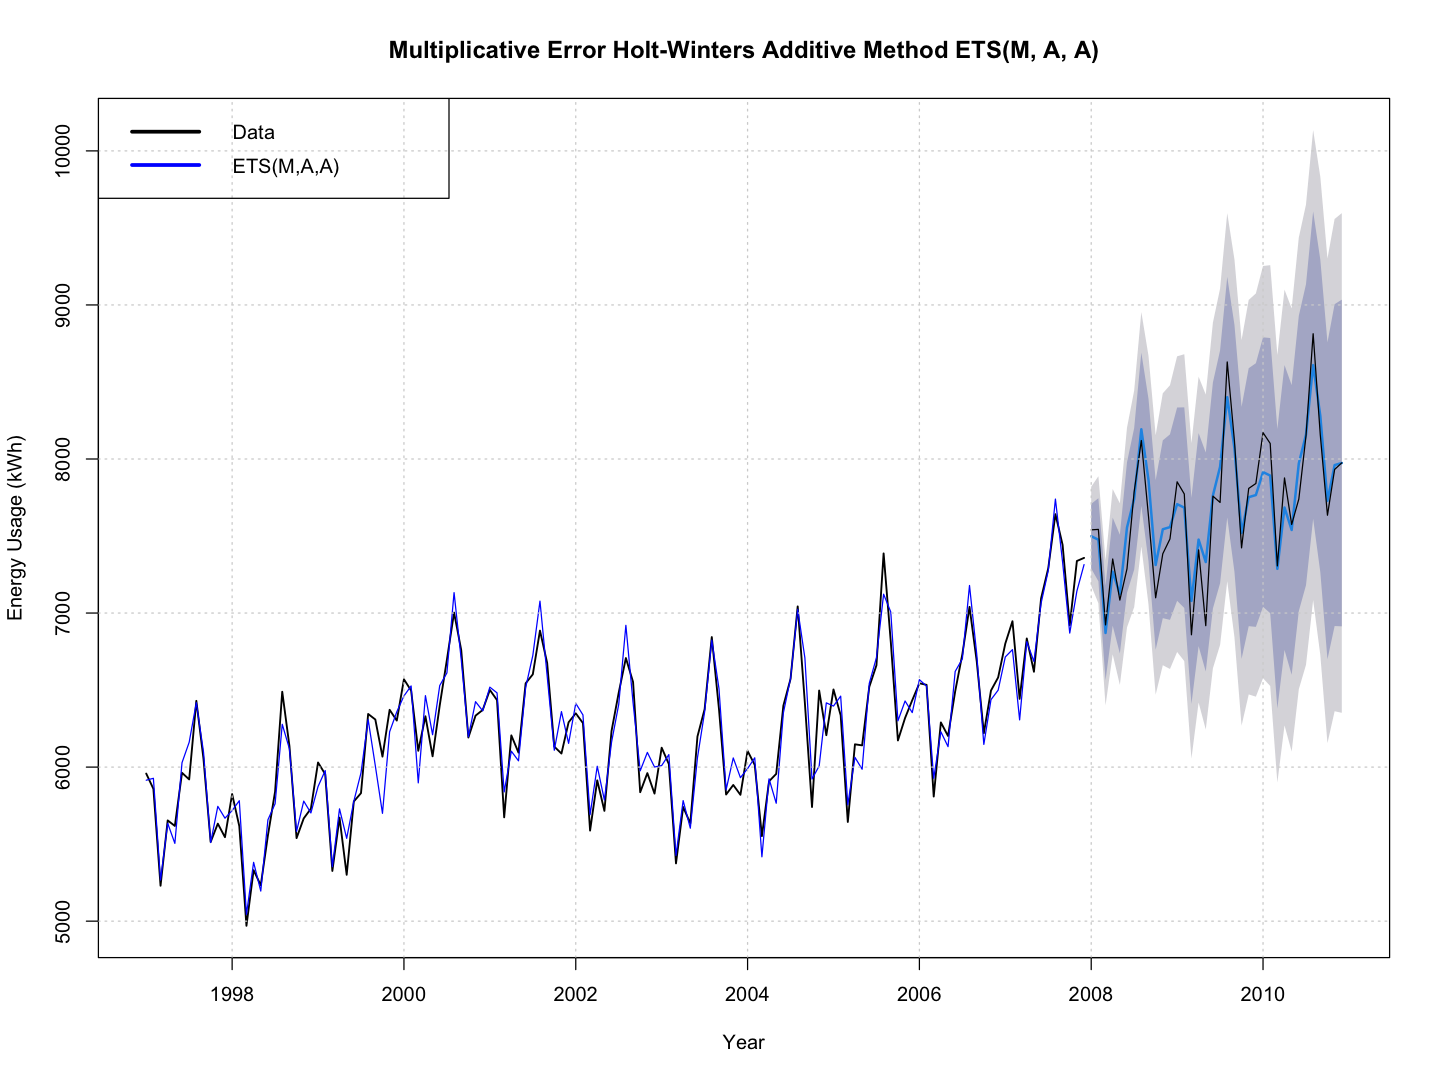

In [26]:
options(repr.plot.width=12, repr.plot.height=9)

fcst.ets <- forecast(ets_best, h = 36)

plot(fcst.ets, main = "Multiplicative Error Holt-Winters Additive Method ETS(M, A, A)", ylab = "Energy Usage (kWh)", xlab = "Year", lwd = 1.5)
lines(yvr.test)
lines(fitted(ets_best), col = "blue")
grid(nx = NULL, ny = NULL, col = "lightgray", lty = "dotted")
legend("topleft",lty=1, lwd = 3, col=c("black","blue"), c("Data", "ETS(M,A,A)"))

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ETS models that you tried. (Present any values, then 4 sentences max.)

<h3 style = "color:#4863A0"> Accuracy measures on the training set

In [41]:
# Show the training scores
ETS_method <- c("Auto ETS", 
             "Additive Holt-Winter's method ETS(A,A,A)", 
             "Multiplicative Holt-Winter's method ETS(A,A,M)", 
             "Additive Holt-Winters Damped (additive trend) method ETS(A,Ad,A)", 
             "Multiplicative Holt-Winters Damped (additive trend) method ETS(A,Ad,M)",
             "Multiplicative error Additive Holt-Winter's method ETS(M,A,A)",
             "Mean method", "Naive method", "Drift method", "Seasonal naive method")
cbind(ETS_method, round(rbind(
    acc.ets0[1,c(2,3,5,6)],
    acc.ets1[1,c(2,3,5,6)], 
    acc.ets2[1,c(2,3,5,6)], 
    acc.ets3[1,c(2,3,5,6)], 
    acc.ets4[1,c(2,3,5,6)],
    acc.ets.best[1,c(2,3,5,6)],
    acc1[1,c(2,3,5,6)],
    acc2[1,c(2,3,5,6)],
    acc3[1,c(2,3,5,6)],
    acc4[1,c(2,3,5,6)]),
                     4))

ETS_method                                                            
 [1,] Auto ETS                                                              
 [2,] Additive Holt-Winter's method ETS(A,A,A)                              
 [3,] Multiplicative Holt-Winter's method ETS(A,A,M)                        
 [4,] Additive Holt-Winters Damped (additive trend) method ETS(A,Ad,A)      
 [5,] Multiplicative Holt-Winters Damped (additive trend) method ETS(A,Ad,M)
 [6,] Multiplicative error Additive Holt-Winter's method ETS(M,A,A)         
 [7,] Mean method                                                           
 [8,] Naive method                                                          
 [9,] Drift method                                                          
[10,] Seasonal naive method                                                 
      RMSE     MAE      MAPE   MASE  
 [1,] 126.6517 98.0999  1.5698 0.3702
 [2,] 126.2613 98.9585  1.5943 0.3735
 [3,] 136.4113 105.8658 1.7025 0.3995
 [4,] 126.7748 99.151   1.5909 0.3742
 [5,] 127.3611 99.0056  1.5838 0.3736
 [6,] 126.3696 99.4423  1.603  0.3753
 [7,] 507.84   406.4286 6.5795 1.5338
 [8,] 371.8135 310.2901 5.0536 1.171 
 [9,] 371.6598 309.3927 5.0441 1.1676
[10,] 343.3462 264.9833 4.1644 1

<p style = "color:#4863A0">Given the accuracy scores from the training set, the ETS(M,A,A) model exhibits a better fit to the training set than basic forecasting methods (mean, naive, drift, and seasonal naive), as evidenced by much lower values across all four metrics. Additionally, it competes effectively with other ETS models, as the values for these four metrics are closely comparable across the ETS models.

## Accuracy measures (0.5 marks)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

<p style = "color:#4863A0">The RMSE, MAE, MAPE, MASE of ETS(M,A,A) on the test set are 155.98, 123.18, 1.61 and 0.46, respectively.

In [42]:
cbind("ETS(M,A,A)", round(rbind(acc.ets.best[2,c(2,3,5,6)]),4))

RMSE     MAE      MAPE  MASE  
[1,] ETS(M,A,A) 155.9826 123.1789 1.614 0.4649

## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

<p style = "color:#4863A0">The table of accuracy measures presented below outlines the accuracy metrics for each model on the test set. The ETS(M,A,A) model stands out with the lowest RMSE, MAE, and MAPE scores among all tested models, along with a decent MASE where it ranks fourth. The forecast plots of the four models with the best scores and the original data shows that the ETS(M,A,A) model more accurately captures the patterns in the original dat  compared to the others.

<h3 style = "color:#4863A0"> Accuracy measures on the test set

In [43]:
# Show the test scores
ETS_method <- c("Auto ETS", 
             "Additive (seasonality) Holt-Winter's method (A,A,A)", 
             "Multiplicative (seasonality) Holt-Winter's method (A,A,M)", 
             "Additive Holt-Winters Damped (additive trend) method (A,Ad,A)", 
             "Multiplicative Holt-Winters Damped (additive trend) method(A,Ad,M)",
             "Seasonal Adjusted Additive Trend Method (A,A,N)",
             "Seasonal Adjusted Exponential Trend Method (A,M,N)",
             "Sesoanl Adjusted Multiplicative error Additive Trend Method (M,A,N)",
             "Multiplicative error Additive Holt-Winter's method (M,A,A)",
             "Mean method", "Naive method", "Drift method", "Seasonal naive method")
cbind(ETS_method, round(rbind(
    acc.ets0[2,c(2,3,5,6)],
    acc.ets1[2,c(2,3,5,6)], 
    acc.ets2[2,c(2,3,5,6)], 
    acc.ets3[2,c(2,3,5,6)], 
    acc.ets4[2,c(2,3,5,6)],
    acc.ets5[1,c(2,3,5,6)],
    acc.ets6[1,c(2,3,5,6)],
    acc.ets7[1,c(2,3,5,6)],
    acc.ets.best[2,c(2,3,5,6)],
    acc1[2,c(2,3,5,6)],
    acc2[2,c(2,3,5,6)],
    acc3[2,c(2,3,5,6)],
    acc4[2,c(2,3,5,6)]),
                     2))

ETS_method                                                         
 [1,] Auto ETS                                                           
 [2,] Additive (seasonality) Holt-Winter's method (A,A,A)                
 [3,] Multiplicative (seasonality) Holt-Winter's method (A,A,M)          
 [4,] Additive Holt-Winters Damped (additive trend) method (A,Ad,A)      
 [5,] Multiplicative Holt-Winters Damped (additive trend) method(A,Ad,M) 
 [6,] Seasonal Adjusted Additive Trend Method (A,A,N)                    
 [7,] Seasonal Adjusted Exponential Trend Method (A,M,N)                 
 [8,] Sesoanl Adjusted Multiplicative error Additive Trend Method (M,A,N)
 [9,] Multiplicative error Additive Holt-Winter's method (M,A,A)         
[10,] Mean method                                                        
[11,] Naive method                                                       
[12,] Drift method                                                       
[13,] Seasonal naive method                                              
      RMSE   MAE    MAPE  MASE
 [1,] 386.41 315.94 4.01  1.19
 [2,] 189    155.9  2     0.59
 [3,] 243.61 203.89 2.62  0.77
 [4,] 381.18 312.72 3.97  1.18
 [5,] 279.92 233.9  3     0.88
 [6,] 197.35 162.35 2.09  0.36
 [7,] 277.67 224.16 2.95  0.3 
 [8,] 179.43 145.7  1.88  0.31
 [9,] 155.98 123.18 1.61  0.46
[10,] 1528.5 1463.8 18.78 5.52
[11,] 550.06 443.19 5.6   1.67
[12,] 415.98 328.48 4.21  1.24
[13,] 698.66 626.83 8.04  2.37

<h3 style = "color:#4863A0"> Forecast plot for the test set

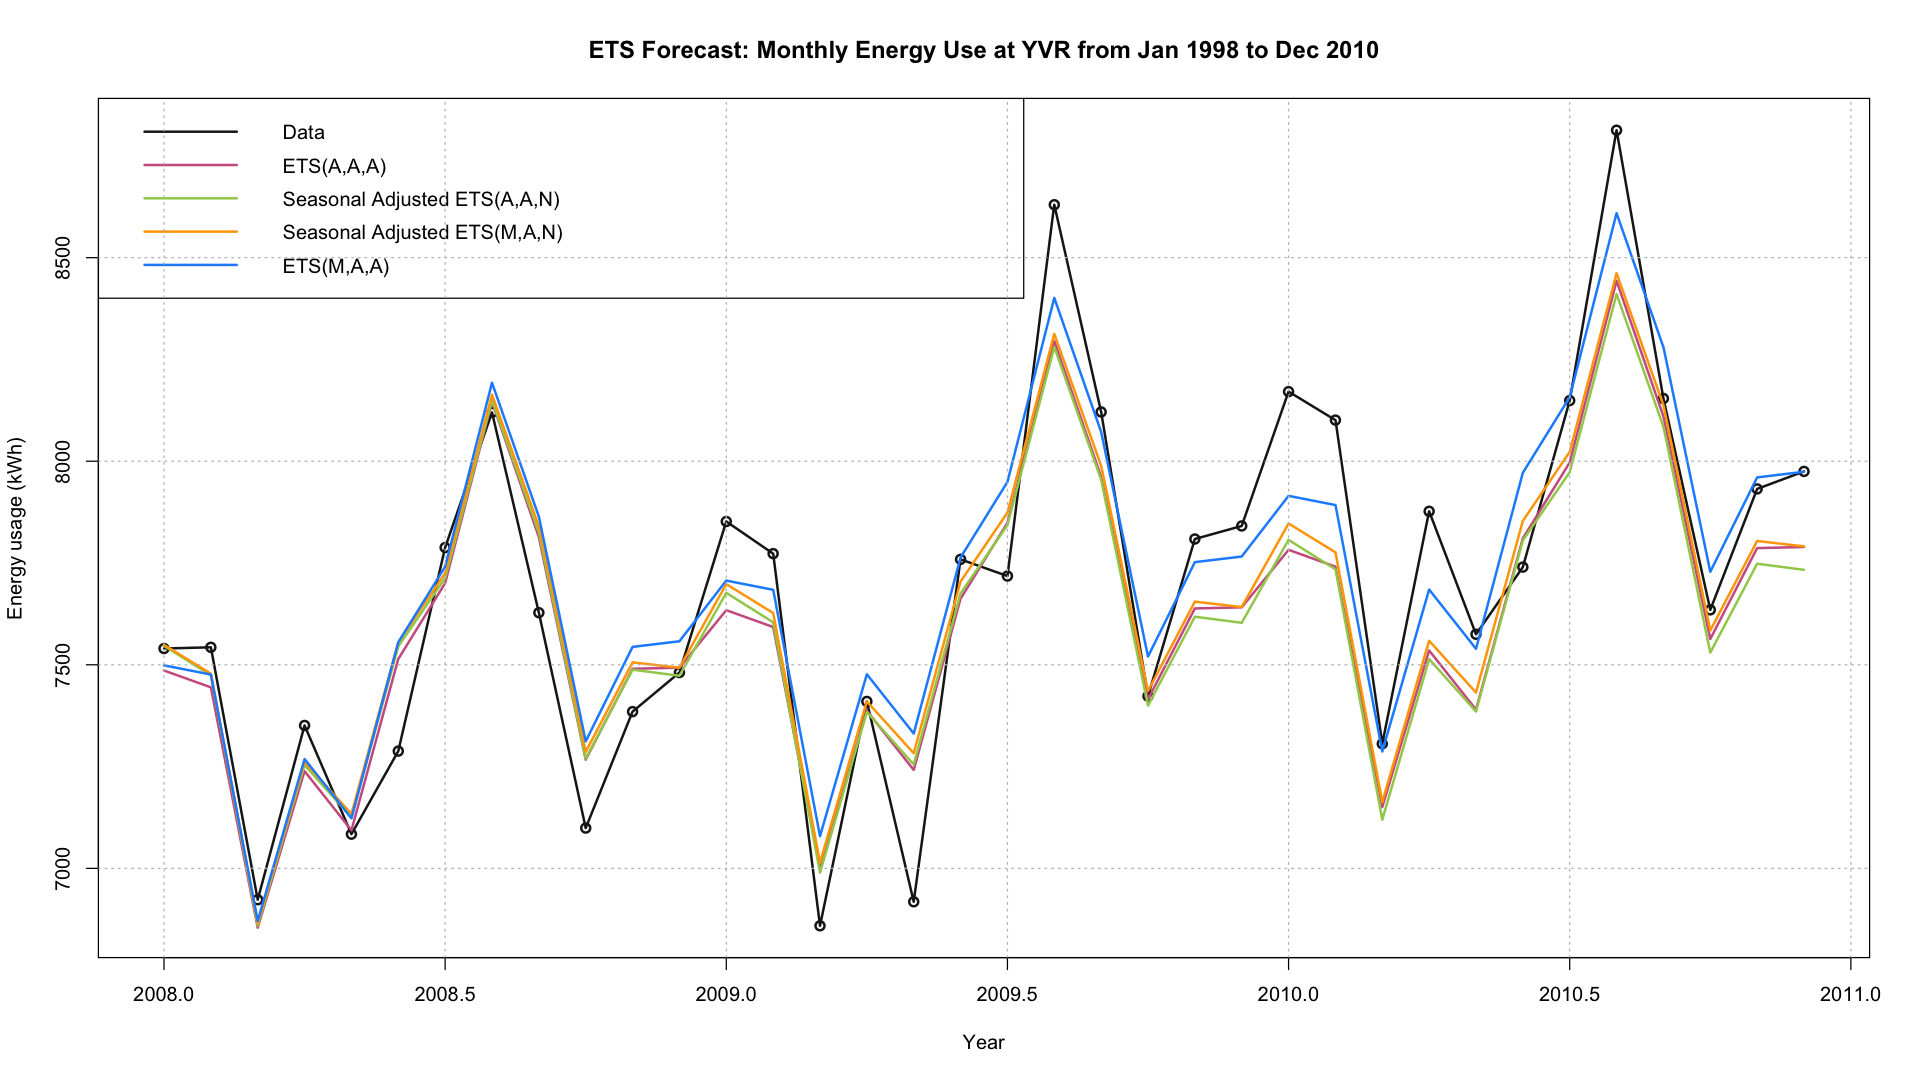

In [44]:
# Plot the models
options(repr.plot.width=16, repr.plot.height=9)

plot(yvr.test, main = "ETS Forecast: Monthly Energy Use at YVR from Jan 1998 to Dec 2010",
     ylab = "Energy usage (kWh)", xlab = "Year",
     cex.main= 1.2, lwd = 2, col = "gray11", type = "o")
lines(fcst1$mean, col = "hotpink3", lwd = 2)
lines(fcst5, col = "darkolivegreen3", lwd = 2)
lines(fcst7, col = "orange", lwd = 2)
lines(fcst.ets$mean, col = "dodgerblue", lwd = 2)


legend("topleft",lty=1, lwd = 2, col=c("gray11",
                                   "hotpink3", 
                                   "darkolivegreen3",
                                   "orange",
                                   "dodgerblue"), 
       c("Data", 
         "ETS(A,A,A)", 
         "Seasonal Adjusted ETS(A,A,N)",
         "Seasonal Adjusted ETS(M,A,N)",
         "ETS(M,A,A)"))
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")

## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

<p style = "color:#4863A0"><b>a) Mean of the residuals = -0.0010. The value is very close to zero, indicating no bias.</b>

In [45]:
# (a) Calculate the mean of the residuals
mean(residuals(ets_best), na.rm = TRUE)

[1] -0.001043112

<p style = "color:#4863A0"><b>b)</b>
    
- <p style = "color:#4863A0"><b>The residuals should have a zero mean" property is met:</b> From the time plot, the residuals have a mean of zero.

- <p style = "color:#4863A0"><b>The residuals should have a zero mean" property is met:</b> From the time plot, the residuals have a mean of zero."The residuals are uncorrelated" property is met:** From the ACF plot, the residuals are unautocorrelated with no significant lags in the first 24 lags of the residuals.

- <p style = "color:#4863A0"><b>The residuals should have a zero mean" property is met:</b> From the time plot, the residuals have a mean of zero."Residuals have constant variance" property is met:** From the time plot, variance of residuals stays approximately constant through time.

- <p style = "color:#4863A0"><b>The residuals should have a zero mean" property is met:</b> From the time plot, the residuals have a mean of zero."Residuals are normally distributed" property is NOT met:** From the histogram plot, the distribution of the residuals are slightly right skewed even without taking the outlier into account.


<p style = "color:#4863A0"><b>c)</b>

- <p style = "color:#4863A0"><b> H0</b>: the first 24 lags autocorrelations are not significantly different from a white noice process

- <p style = "color:#4863A0"><b>HA</b>: the first 24 lags autocorrelations are significantly different from a white noise process

- <p style = "color:#4863A0"><b>number of lags tested</b>: 2m = 24

- <p style = "color:#4863A0"><b>p-value</b> = 0.9741

- <p style = "color:#4863A0"><b>Ljung-Box statistic</b> Q* is not very large

- <p style = "color:#4863A0"><b>Using alpha = 0.05, given that p-value is 0.9741 which is way larger than 0.05, so we fail to reject H0. 

- <p style = "color:#4863A0"><b>Conclusion:</b> There are no significant autocorrelations for the first 24 lags of the residuals.


	Ljung-Box test

data:  Residuals from ETS(M,A,A)
Q* = 12.469, df = 24, p-value = 0.9741

Model df: 0.   Total lags used: 24



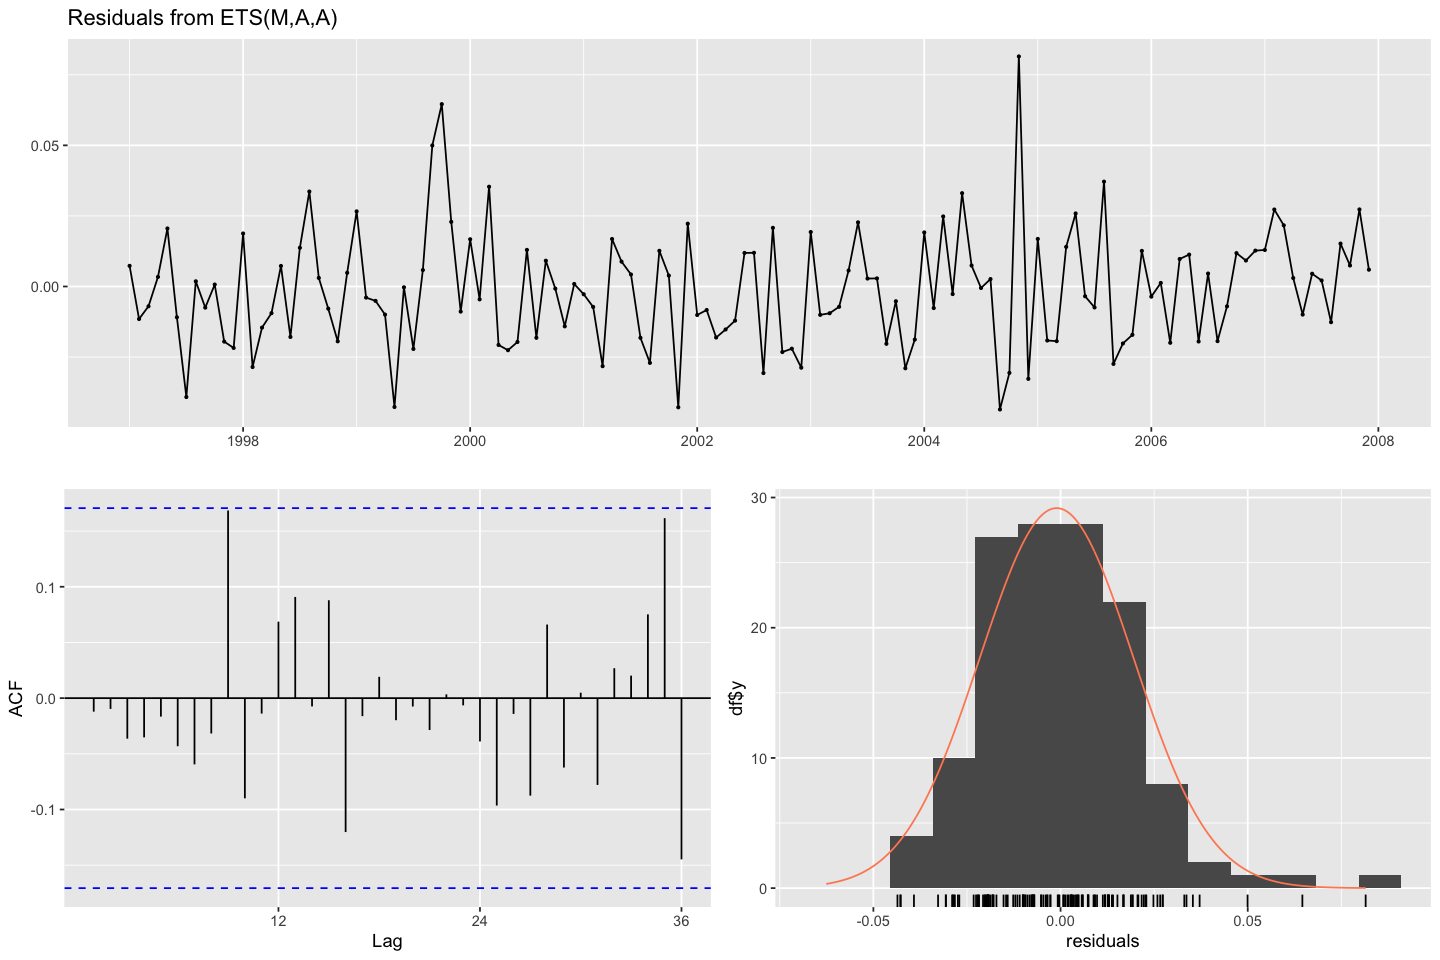

In [46]:
options(repr.plot.width=12, repr.plot.height=8)

checkresiduals(ets_best)

----

<div class="alert alert-block alert-success">
<a id="ARIMA"></a>
    
# ARIMA model
    
Fit ARIMA models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix B**.
    
</div>    

## What is the model, using the ARIMA(p, d, q)X(P, D, Q)m notation? (0.25 marks)

<p style = "color:#4863A0"><b>The model that is being used is the ARIMA (1, 1, 0)x(0, 1, 1)[12]

In [47]:
arima.best <- Arima(yvr.train, order = c(1,1,0), seasonal = c(0,1,1))

## What are the estimates of the parameters? (0.25 marks)

<p style = "color:#4863A0"><b>The estimates of the parameters are:</b>
    
    - AR1 : -0.1972 
    
    - SMA1 : -0.8927 

In [48]:
summary(arima.best)

Series: yvr.train 
ARIMA(1,1,0)(0,1,1)[12] 

Coefficients:
          ar1     sma1
      -0.1972  -0.8927
s.e.   0.0905   0.1794

sigma^2 = 18824:  log likelihood = -762.54
AIC=1531.08   AICc=1531.29   BIC=1539.42

Training set error measures:
                   ME    RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 9.495075 129.171 93.95688 0.1257726 1.494625 0.3545766 -0.01035696

## Appropriateness of model (2 marks)
Explain why this model is appropriate based on the features of the data. Include the ACF and PACF plots of the differenced data. (5 sentences max.)

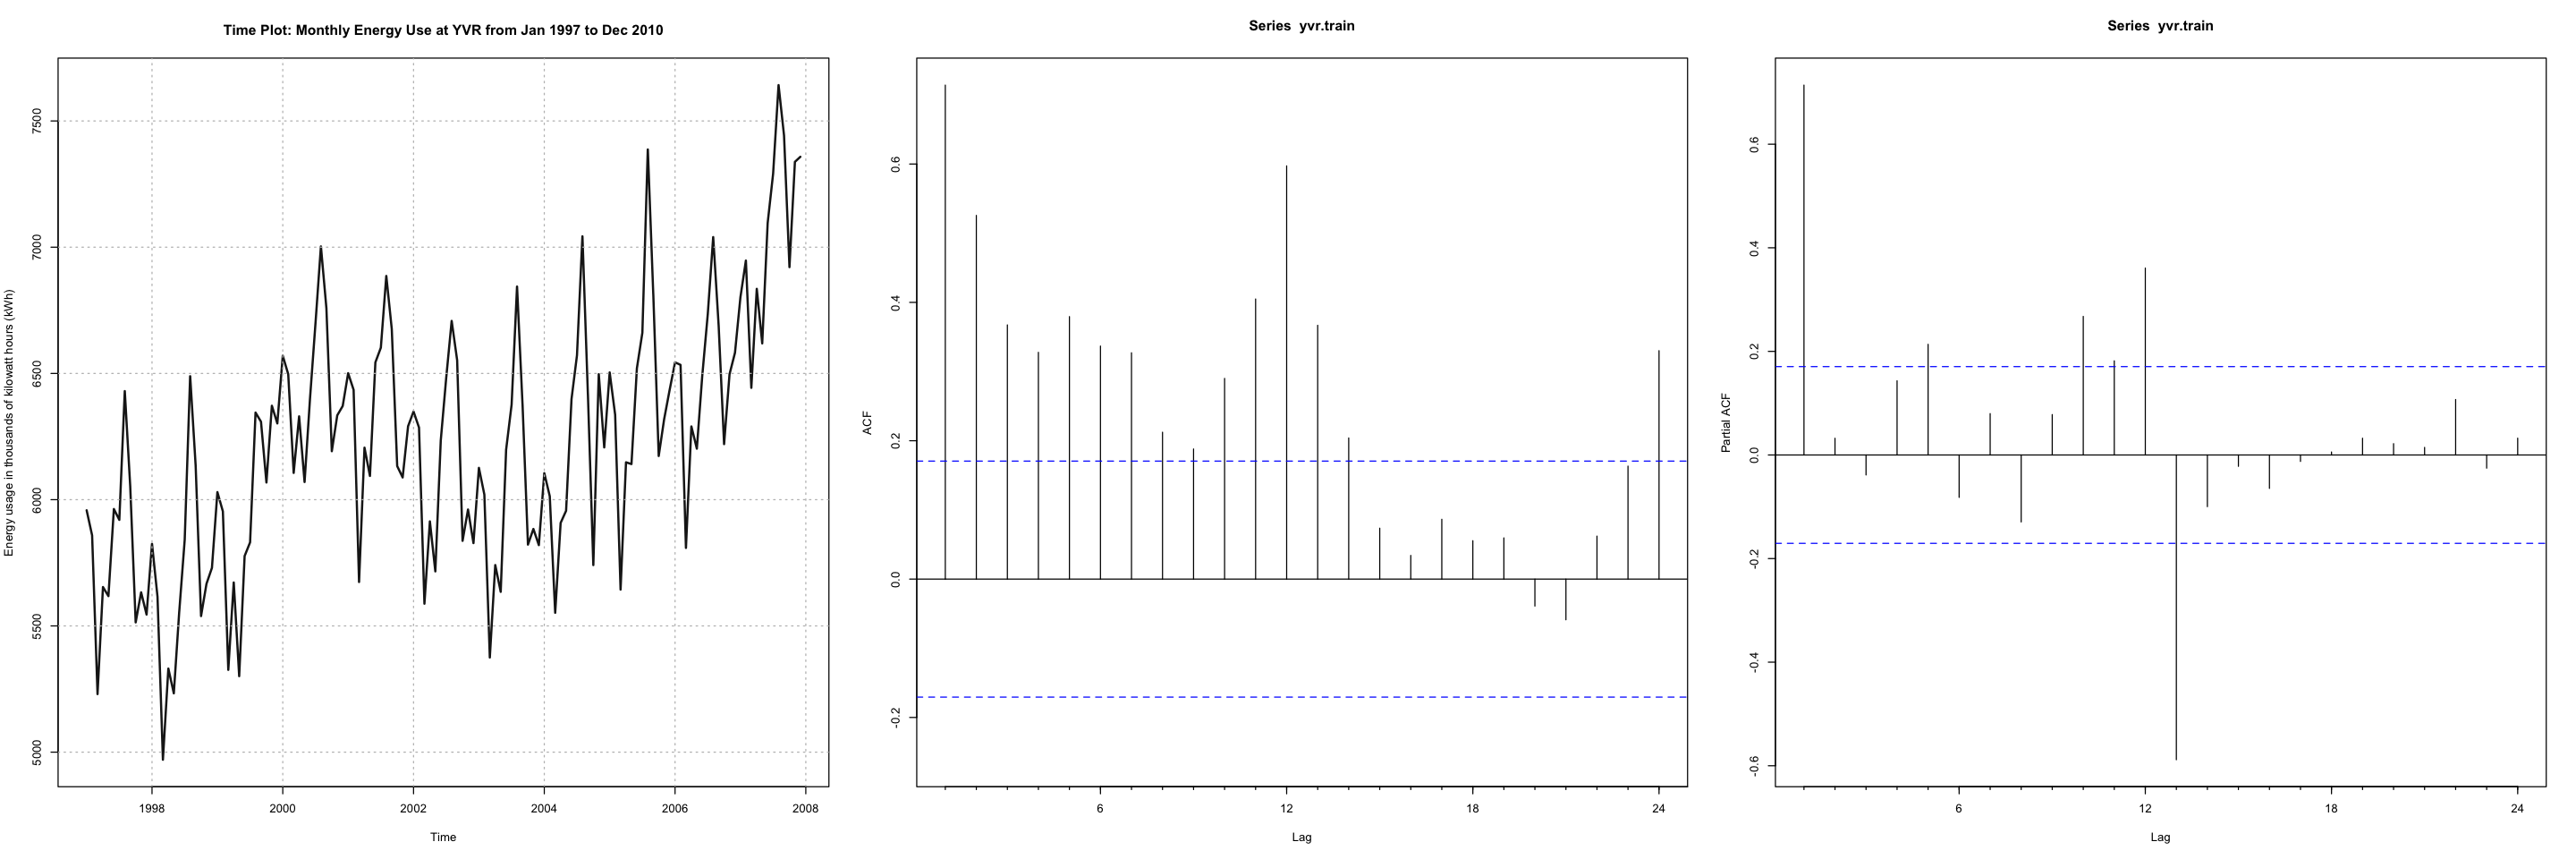

In [49]:
# ACF and PCF
options(repr.plot.width=24, repr.plot.height=8)
par(mfrow=c(1,3))

plot(yvr.train, main = "Time Plot: Monthly Energy Use at YVR from Jan 1997 to Dec 2010",
     ylab = "Energy usage in thousands of kilowatt hours (kWh)",
     cex.main= 1.2, lwd = 2, col = "gray11")
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")
Acf(yvr.train)
Pacf(yvr.train)

<p style = "color:#4863A0"><b>The original time plot shows that there is seasonality that repeats every 12 months (this is the value of m), indicating that we should use D=1 , doing seasonal differencing of lag-m (where m = the seasonal frequency) .


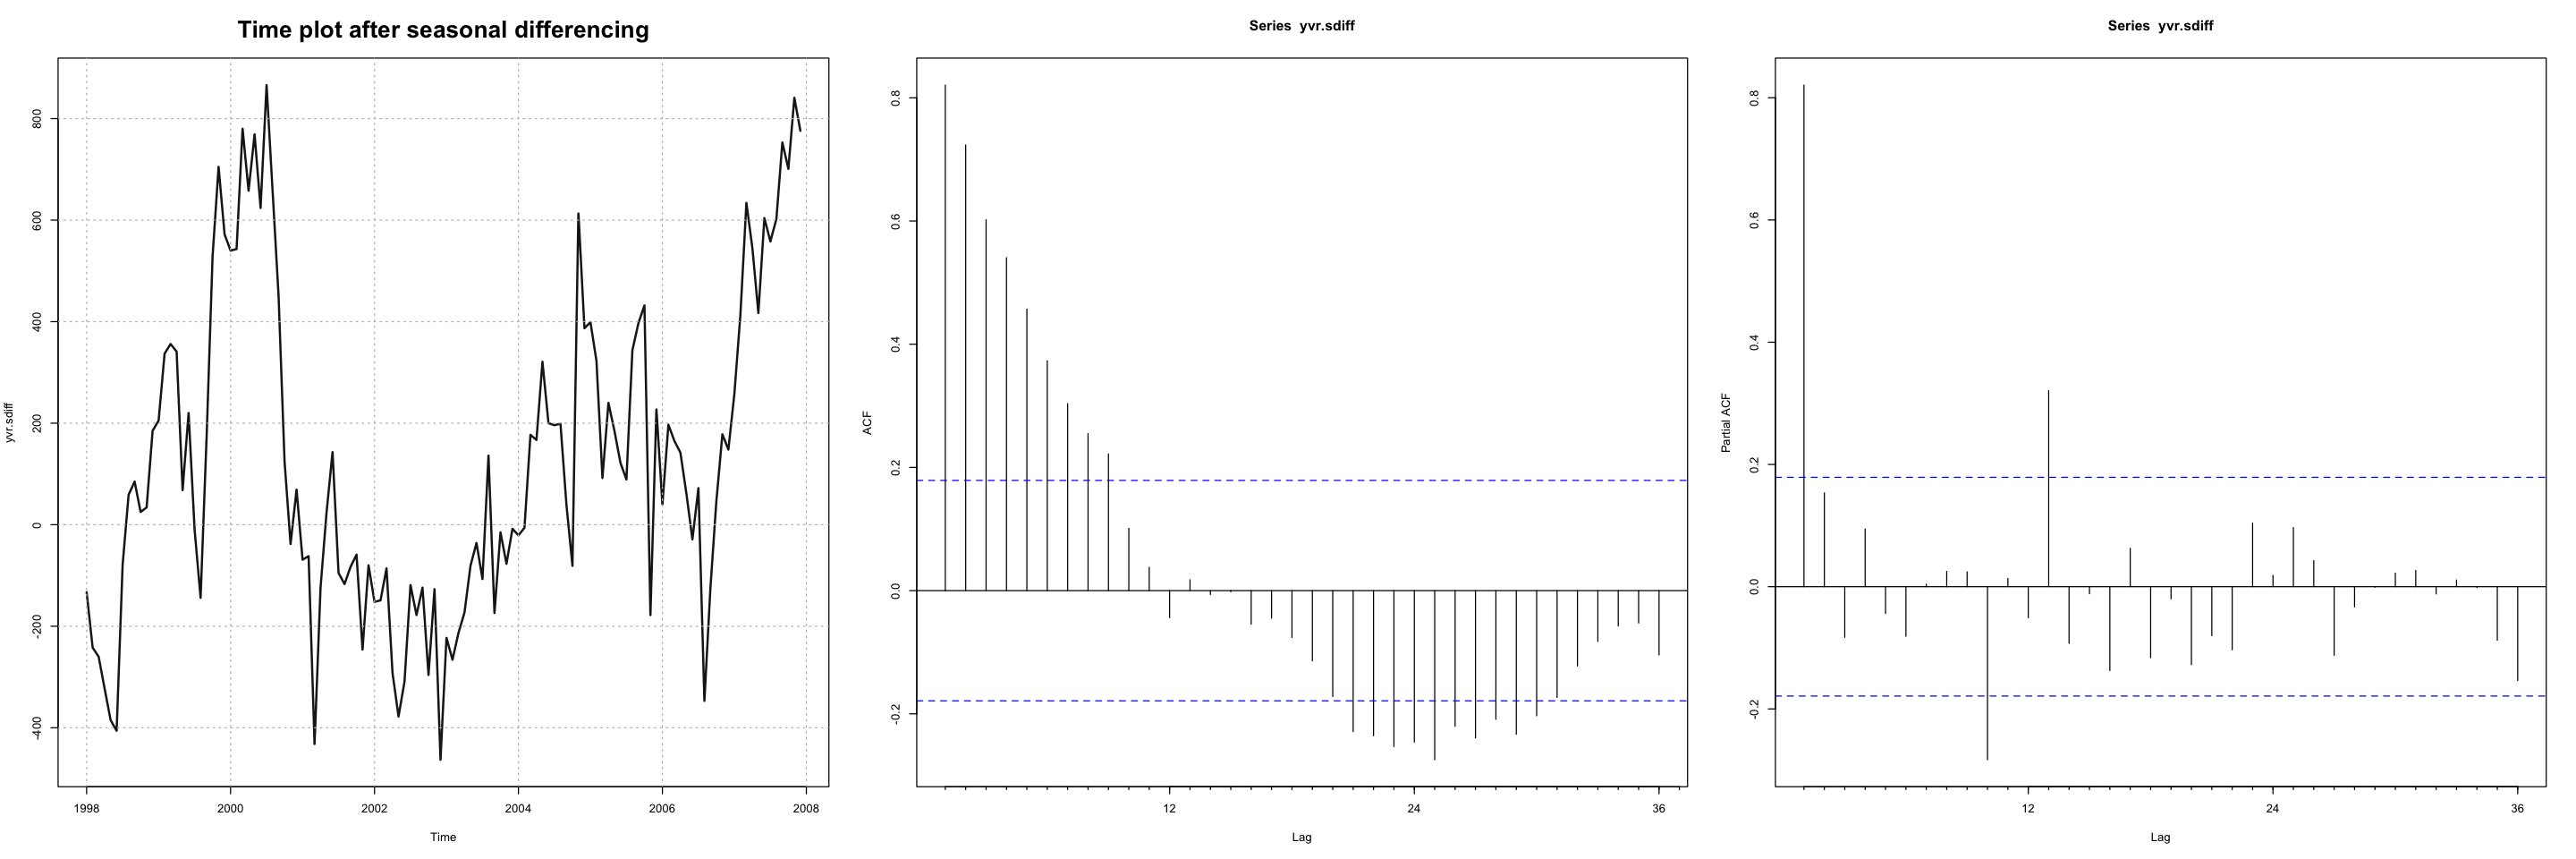

In [50]:
# Seasonal Differencing
options(repr.plot.width=24, repr.plot.height=8)
par(mfrow=c(1,3))

yvr.sdiff <- diff(yvr.train, 12)

plot(yvr.sdiff, main = "Time plot after seasonal differencing",
     cex.main= 2, lwd = 2, col = "gray11")
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")
Acf(yvr.sdiff, lag = 36)
Pacf(yvr.sdiff, lag = 36)

<p style = "color:#4863A0"><b> After the appropriate amount of seasonal differencing, the series has some trend , indicating that we should use d=1 .

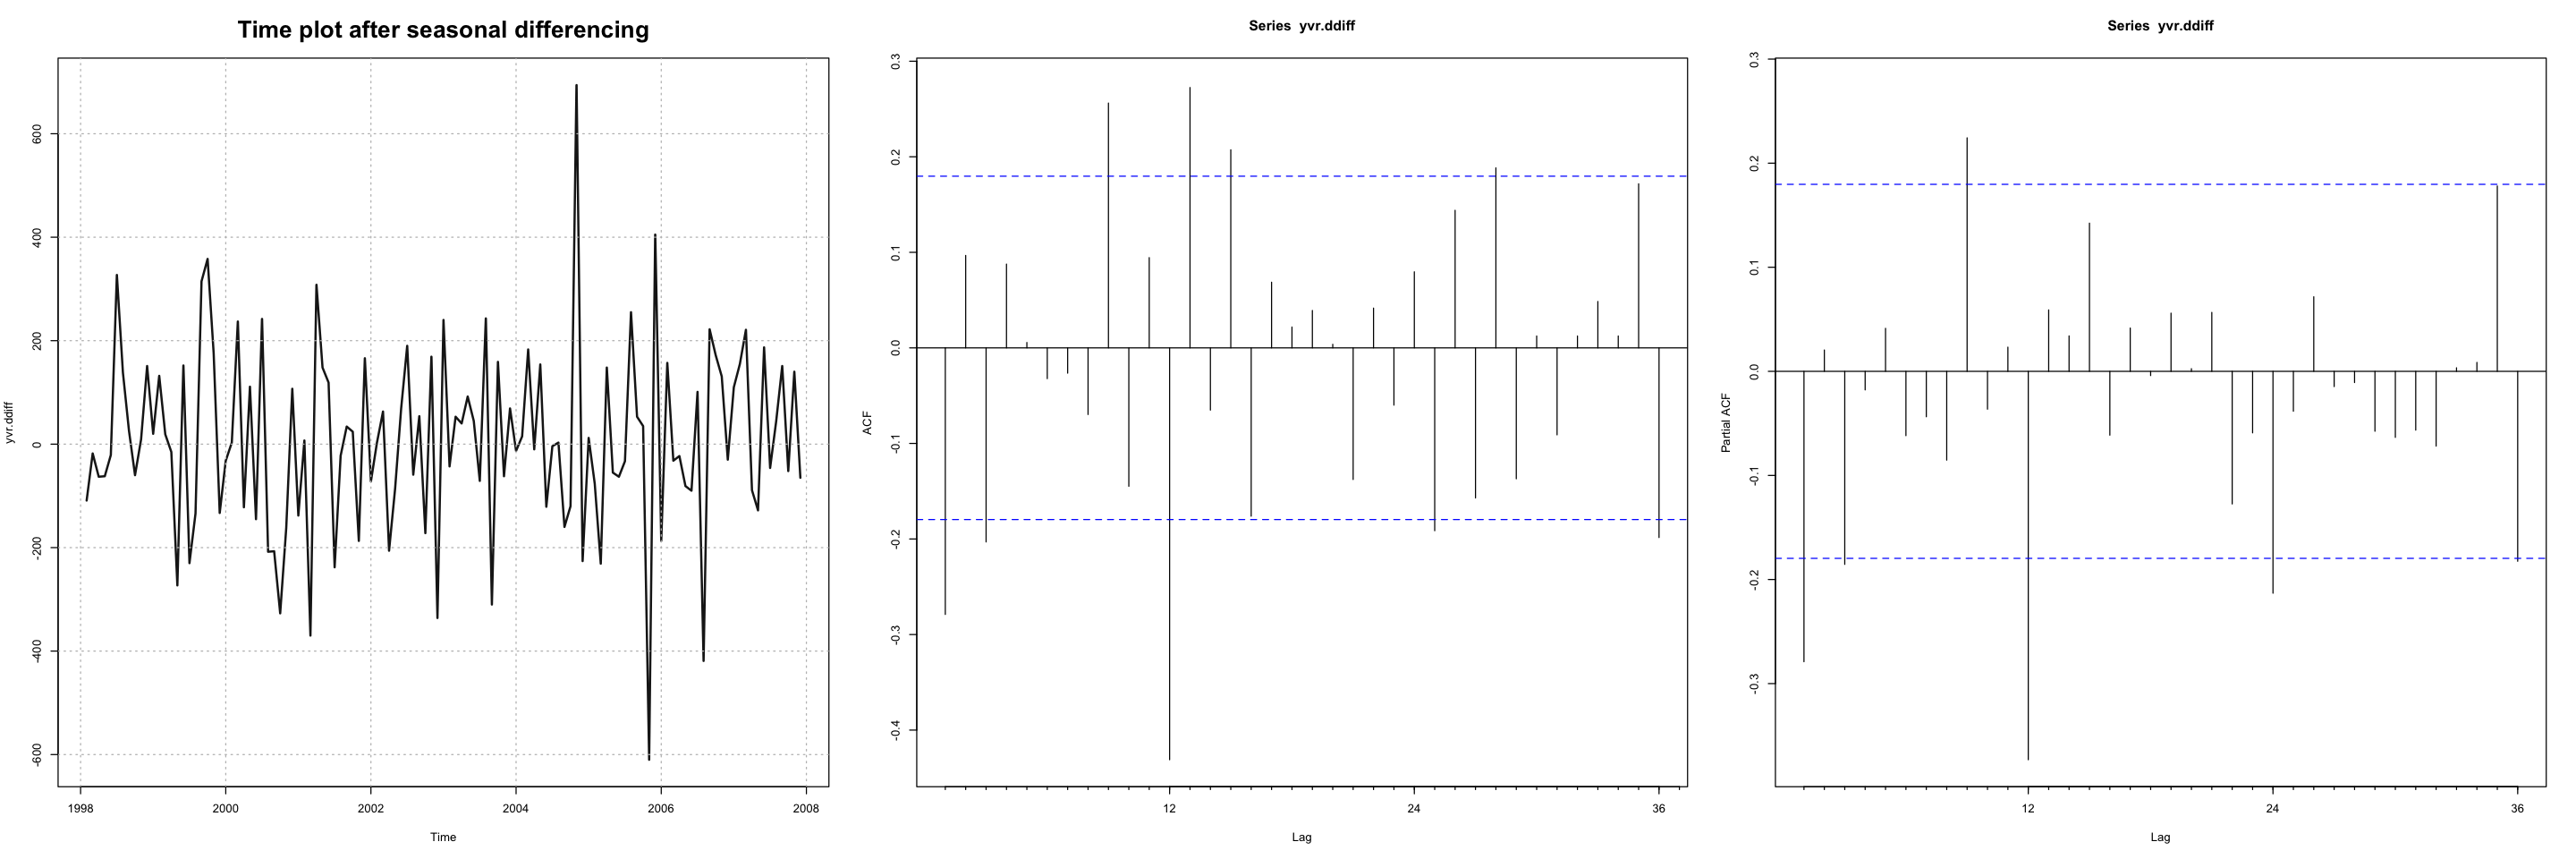

In [51]:
# non-seasonal differencing
options(repr.plot.width=24, repr.plot.height=8)
par(mfrow=c(1,3))

yvr.ddiff <- diff(yvr.sdiff)

plot(yvr.ddiff, main = "Time plot after seasonal differencing",
     cex.main= 2, lwd = 2, col = "gray11")
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")
Acf(yvr.ddiff, lag = 36)
Pacf(yvr.ddiff, lag = 36)

<p style = "color:#4863A0"><b> The series tend to be stationary after appropriate differencing. ACF shows a simpler pattern for seasonal lags with one significant lag at m=12 and two not too significant lags at lag =24 and lag =36, so we include Q = 1. PACF has fewer significant non-seasonal lag with a significant lag at m = 1 and rapidly drop to 0 so we include p = 1.

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

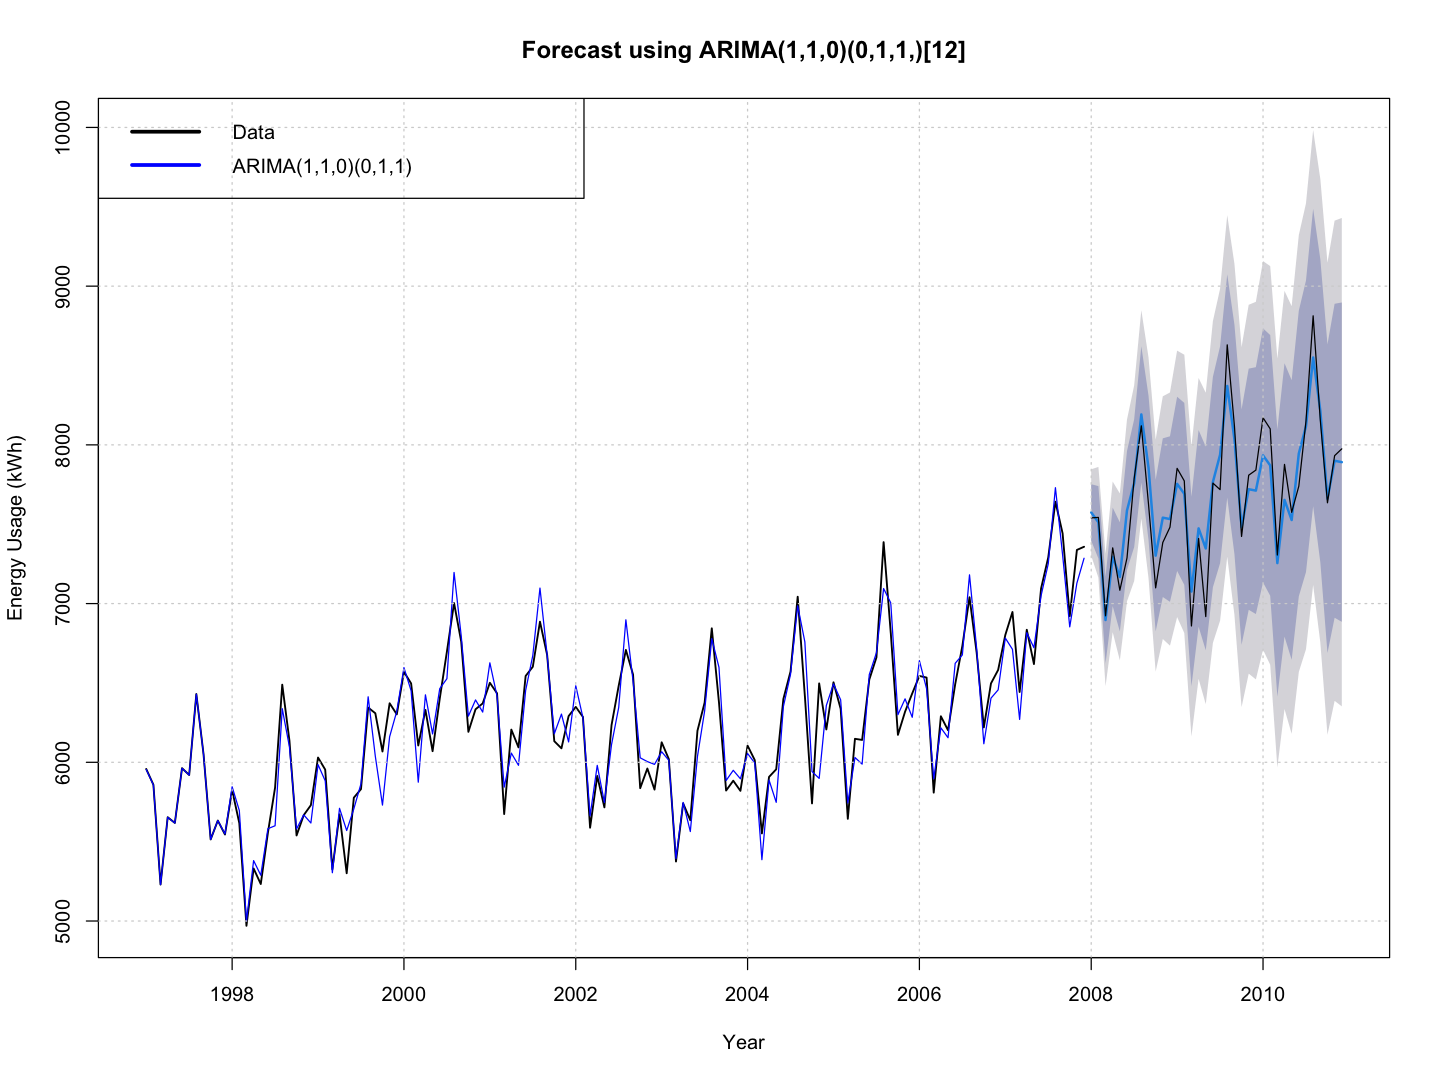

In [52]:
options(repr.plot.width=12, repr.plot.height=9)

plot(forecast(arima.best, h=36), main = "Forecast using ARIMA(1,1,0)(0,1,1,)[12]", ylab = "Energy Usage (kWh)", xlab = "Year",lwd = 1.5)
lines(yvr.test)
lines(fitted(arima.best), col = "blue")
grid(nx = NULL, ny = NULL, col = "lightgray", lty = "dotted")
legend("topleft",lty=1, lwd = 3, col=c("black","blue"), c("Data", "ARIMA(1,1,0)(0,1,1)"))

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ARIMA models that you tried. (Present any values, then 4 sentences max.)

<h3 style = "color:#4863A0"> Accuracy measures on the training set

In [53]:
# Show the scores on the training set
ARIMA_method <- c("ARIMA(0,1,3)(0,1,2)", 
             "ARIMA(0,1,3)(2,1,0)", 
             "ARIMA(1,1,0)(2,1,0)", 
             "ARIMA(1,1,0)(0,1,2)",
             "ARIMA(0,1,2)(0,1,2)",
             "ARIMA(1,1,1)(2,1,2)",
             "ARIMA(0,1,1)(0,1,1)",
             "ARIMA(1,1,0)(0,1,1)",
             "arima.auto",
             "Mean method", "Naive method", "Drift method", "Seasonal naive method")
cbind(ARIMA_method, round(rbind(
    acc.arima1[1,c(2,3,5,6)], 
    acc.arima2[1,c(2,3,5,6)], 
    acc.arima3[1,c(2,3,5,6)], 
    acc.arima4[1,c(2,3,5,6)],
    acc.arima5[1,c(2,3,5,6)],
    acc.arima6[1,c(2,3,5,6)],
    acc.arima7[1,c(2,3,5,6)],
    acc.arima.best[1,c(2,3,5,6)],
    acc.arima.auto[1,c(2,3,5,6)],
    acc1[1,c(2,3,5,6)],
    acc2[1,c(2,3,5,6)],
    acc3[1,c(2,3,5,6)],
    acc4[1,c(2,3,5,6)]),4))

ARIMA_method          RMSE     MAE      MAPE   MASE  
 [1,] ARIMA(0,1,3)(0,1,2)   123.5034 90.3006  1.4372 0.3408
 [2,] ARIMA(0,1,3)(2,1,0)   145.997  104.6241 1.6638 0.3948
 [3,] ARIMA(1,1,0)(2,1,0)   146.2229 104.9458 1.6685 0.396 
 [4,] ARIMA(1,1,0)(0,1,2)   123.7373 90.1738  1.4359 0.3403
 [5,] ARIMA(0,1,2)(0,1,2)   123.7048 90.5806  1.4424 0.3418
 [6,] ARIMA(1,1,1)(2,1,2)   124.202  90.2472  1.4371 0.3406
 [7,] ARIMA(0,1,1)(0,1,1)   128.7797 94.2565  1.4995 0.3557
 [8,] ARIMA(1,1,0)(0,1,1)   129.171  93.9569  1.4946 0.3546
 [9,] arima.auto            146.2229 104.9458 1.6685 0.396 
[10,] Mean method           507.84   406.4286 6.5795 1.5338
[11,] Naive method          371.8135 310.2901 5.0536 1.171 
[12,] Drift method          371.6598 309.3927 5.0441 1.1676
[13,] Seasonal naive method 343.3462 264.9833 4.1644 1

<p style = "color:#4863A0">Given the accuracy scores from the training set, the ARIMA(1,1,0)(0,1,1)[12] model exhibits a better fit to the training set than basic forecasting methods (mean, naive, drift, and seasonal naive), as evidenced by much lower values across all four metrics. Additionally, it performs similarly well compared to the other ARIMA models we tested and performs better than the auto ARIMA model chosen by R.

## Accuracy measures (0.5 marks)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [54]:
cbind("ARIMA(1,1,0)(0,1,1)", round(rbind(acc.arima.best[2,c(2,3,5,6)]),4))

RMSE     MAE      MAPE   MASE  
[1,] ARIMA(1,1,0)(0,1,1) 159.9366 125.0931 1.6339 0.4721

## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

<p style = "color:#4863A0"><b>The table of accuracy measures presented below outlines the accuracy metrics for each model on the test set. The ARIMA(1,1,0)(0,1,1)[12] model stands out with the lowest RMSE, MAE, MAPE and MASE values among all tested models. The forecast plots of the four models with the best scores are very similar to each other, so we picked ARIMA(1,1,0)(0,1,1)[12] for its best accuracy scores.

<h3 style = "color:#4863A0"> Accuracy measures on the test set

In [55]:
# Show the scores on the test set
ARIMA_method <- c("ARIMA(0,1,3)(0,1,2)", 
             "ARIMA(0,1,3)(2,1,0)", 
             "ARIMA(1,1,0)(2,1,0)", 
             "ARIMA(1,1,0)(0,1,2)",
             "ARIMA(0,1,2)(0,1,2)",
             "ARIMA(1,1,1)(2,1,2)",
             "ARIMA(0,1,1)(0,1,1)",
             "ARIMA(1,1,0)(0,1,1)",
             "arima.auto",
             "Mean method", "Naive method", "Drift method", "Seasonal naive method")
cbind(ARIMA_method, round(rbind(
    acc.arima1[2,c(2,3,5,6)], 
    acc.arima2[2,c(2,3,5,6)], 
    acc.arima3[2,c(2,3,5,6)], 
    acc.arima4[2,c(2,3,5,6)],
    acc.arima5[2,c(2,3,5,6)],
    acc.arima6[2,c(2,3,5,6)],
    acc.arima7[2,c(2,3,5,6)],
    acc.arima.best[2,c(2,3,5,6)],
    acc.arima.auto[2,c(2,3,5,6)],
    acc1[2,c(2,3,5,6)],
    acc2[2,c(2,3,5,6)],
    acc3[2,c(2,3,5,6)],
    acc4[2,c(2,3,5,6)]),4))

ARIMA_method          RMSE      MAE       MAPE    MASE  
 [1,] ARIMA(0,1,3)(0,1,2)   166.2204  129.7446  1.6975  0.4896
 [2,] ARIMA(0,1,3)(2,1,0)   509.9645  437.2263  5.6963  1.65  
 [3,] ARIMA(1,1,0)(2,1,0)   532.0308  459.5772  5.9856  1.7344
 [4,] ARIMA(1,1,0)(0,1,2)   170.2617  127.8264  1.6836  0.4824
 [5,] ARIMA(0,1,2)(0,1,2)   168.0545  128.4282  1.6867  0.4847
 [6,] ARIMA(1,1,1)(2,1,2)   172.7737  126.0214  1.6719  0.4756
 [7,] ARIMA(0,1,1)(0,1,1)   161.6306  128.2304  1.6685  0.4839
 [8,] ARIMA(1,1,0)(0,1,1)   159.9366  125.0931  1.6339  0.4721
 [9,] arima.auto            532.0308  459.5772  5.9856  1.7344
[10,] Mean method           1528.4982 1463.7955 18.7756 5.5241
[11,] Naive method          550.0588  443.1944  5.6035  1.6725
[12,] Drift method          415.979   328.4824  4.2133  1.2396
[13,] Seasonal naive method 698.6573  626.8333  8.0386  2.3656

<h3 style = "color:#4863A0"> Forecast plot for the test set

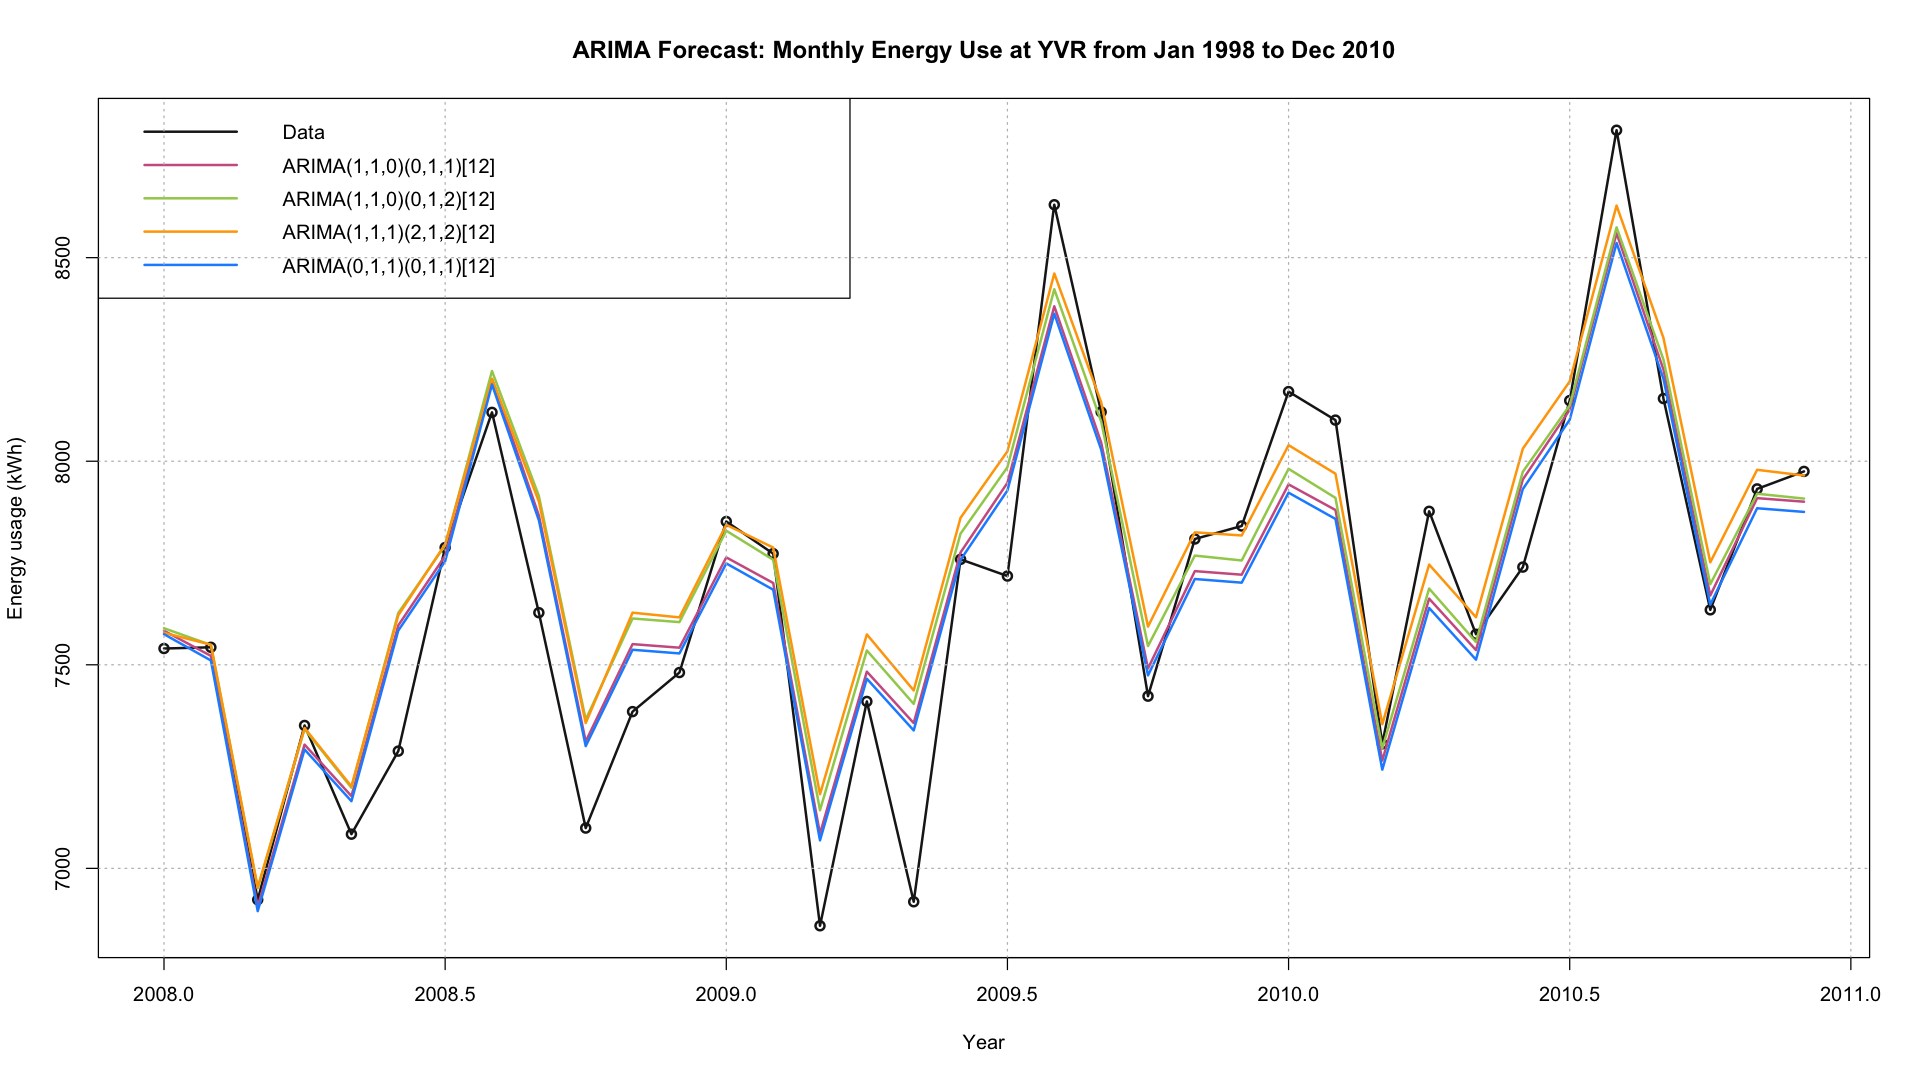

In [56]:
# Plot the models
options(repr.plot.width=16, repr.plot.height=9)

plot(yvr.test, main = "ARIMA Forecast: Monthly Energy Use at YVR from Jan 1998 to Dec 2010",
     ylab = "Energy usage (kWh)", xlab = "Year",
     cex.main= 1.2, lwd = 2, col = "gray11", type = "o")
lines(forecast(arima.best, h = 36)$mean+mean(residuals(arima.best)), col = "hotpink3", lwd = 2)
lines(forecast(arima4, h = 36)$mean+mean(residuals(arima4)), col = "darkolivegreen3", lwd = 2)
lines(forecast(arima6, h = 36)$mean+mean(residuals(arima6)), col = "orange", lwd = 2)
lines(forecast(arima7, h = 36)$mean+mean(residuals(arima7)), col = "dodgerblue", lwd = 2)


legend("topleft",lty=1, lwd = 2, col=c("gray11",
                                   "hotpink3", 
                                   "darkolivegreen3",
                                   "orange",
                                   "dodgerblue"), 
       c("Data", 
         "ARIMA(1,1,0)(0,1,1)[12]", 
         "ARIMA(1,1,0)(0,1,2)[12]",
         "ARIMA(1,1,1)(2,1,2)[12]",
         "ARIMA(0,1,1)(0,1,1)[12]"))
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")

## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

<p style = "color:#4863A0"><b>a) Mean of the residuals = 9.4951. The value indicating bias exists and additional information should be adding to the model.

In [57]:
# (a) Calculate the mean of the residuals
mean(residuals(arima.best), na.rm = TRUE)

[1] 9.495075

<p style = "color:#4863A0"><b>b)</b>

- <p style = "color:#4863A0"><b>"The residuals should have a zero mean" property is met</b>: From the time plot, the residuals have a mean of zero.
- <p style = "color:#4863A0"><b>"The residuals are uncorrelated" property is met</b>: From the ACF plot, there is one significant lag at lag = 9 we expect 5 % of autocorrelations to be significant due to chance. Overall the residuals are unautocorrelated.
- <p style = "color:#4863A0"><b>"Residuals have constant variance" property is met:</b> From the time plot, the variance of residuals stays approximately constant through time.
- <p style = "color:#4863A0"><b>"Residuals are normally distributed" property is met:</b> From the histogram plot, when excluding the outlier, the residuals are approximately normally distributed.

<p style = "color:#4863A0"><b>c)</b>

- <p style = "color:#4863A0"><b>H0</b>: the first 24 lags autocorrelations are not significantly different from a white noice process

- <p style = "color:#4863A0"><b>HA</b>: the first 24 lags autocorrelations are significantly different from a white noise process

- <p style = "color:#4863A0"><b>number of lags tested</b>: 2m = 24

- <p style = "color:#4863A0"><b>p-value</b> = 0.7223

- <p style = "color:#4863A0"><b>Ljung-Box statistic Q*</b> is not very large

- <p style = "color:#4863A0"><b>Using alpha = 0.05, given that p-value is 0.7223 which is way larger than 0.05, so we fail to Fail to reject H0.</b> 

- <p style = "color:#4863A0"><b>Conclusion</b>: There are no significant autocorrelations for the first 24 lags of the residuals.


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(0,1,1)[12]
Q* = 17.722, df = 22, p-value = 0.7223

Model df: 2.   Total lags used: 24



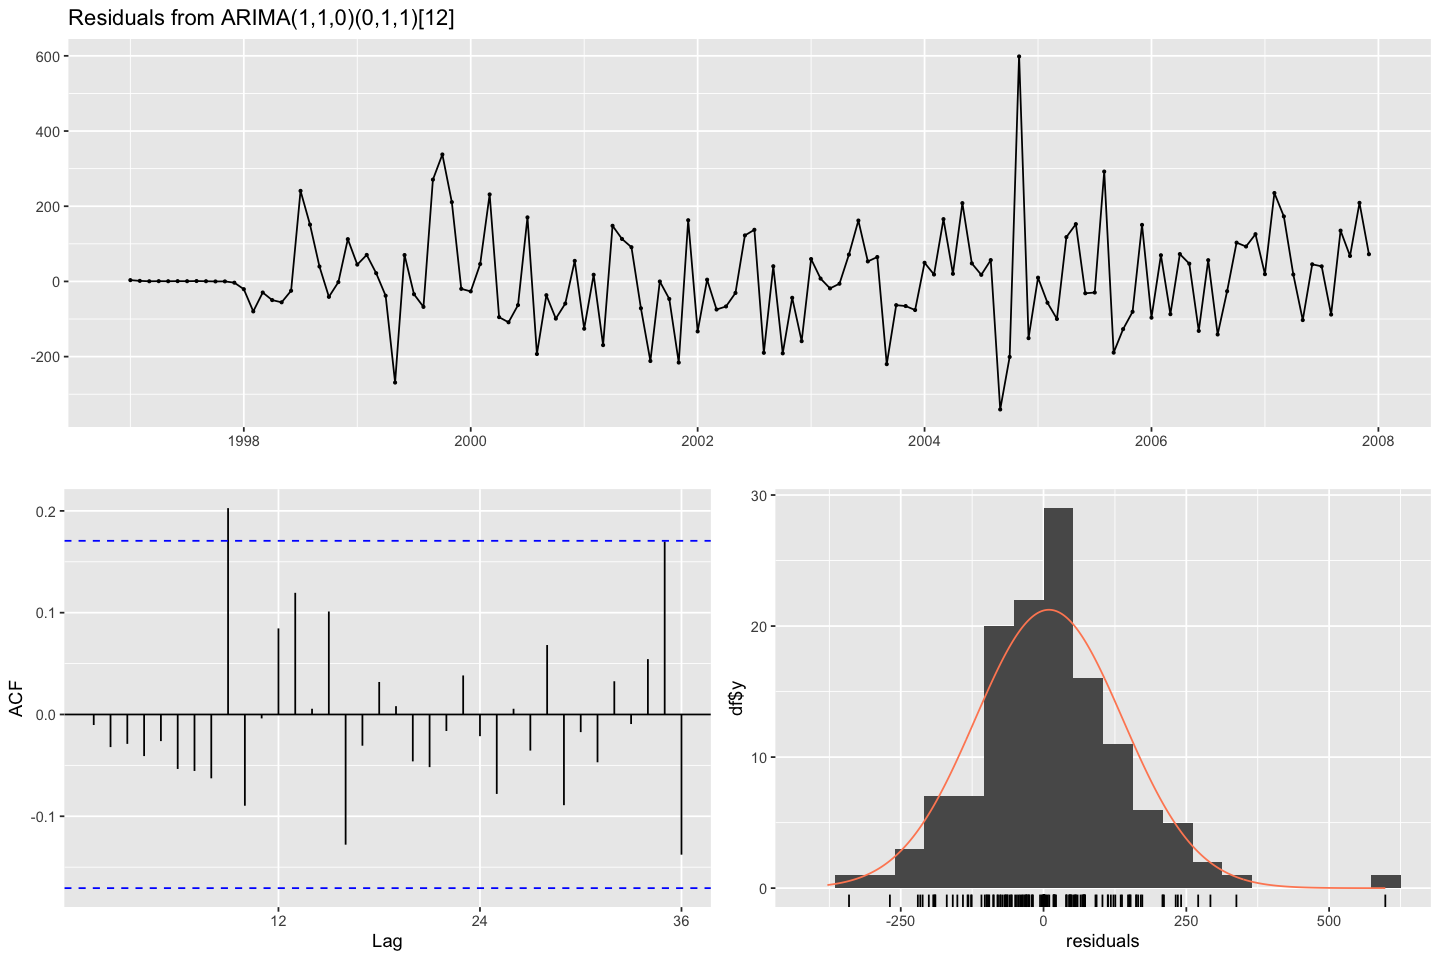

In [58]:
options(repr.plot.width=12, repr.plot.height=8)

checkresiduals(arima.best)

----

<div class="alert alert-block alert-warning">
<a id="Comparison"></a>

# Comparison of models (200 words max.) (2 marks)  

Compare your exponential smoothing/ETS model, your ARIMA model, and the basic methods. Which one is your best forecasting method (this will be your final model that is used in the next two sections)? Explain using support from previous questions as well as by creating a plot to compare the forecasts for the test set for the different methods.  
<div>


<p style = "color:#4863A0">Based on the accuracy metrics we chose <b>ETS(M,M,A)</b> as our best forecasting method. Based on the forecast plot on the test set, it fits the observed data similarly well compared to the ARIMA models, while it has the lowest RMSE, MAE, MAPE and MASE value accross all the models we have tried. 

<h3 style = "color:#4863A0"> Accuracy measures on the test set

In [59]:
# Accuracy assessment
method <- c("ARIMA(1,1,0)(0,1,1)",
            "Multiplicative Error Additive Holt-Winter's method ETS(M,A,A)",
            "Mean method", "Naive method", "Drift method", "Seasonal naive method")
cbind(method, round(rbind(
    acc.arima.best[2,c(2,3,5,6)],
    acc.ets.best[2,c(2,3,5,6)],
    acc1[2,c(2,3,5,6)],
    acc2[2,c(2,3,5,6)],
    acc3[2,c(2,3,5,6)],
    acc4[2,c(2,3,5,6)]),3))

method                                                        RMSE    
[1,] ARIMA(1,1,0)(0,1,1)                                           159.937 
[2,] Multiplicative Error Additive Holt-Winter's method ETS(M,A,A) 155.983 
[3,] Mean method                                                   1528.498
[4,] Naive method                                                  550.059 
[5,] Drift method                                                  415.979 
[6,] Seasonal naive method                                         698.657 
     MAE      MAPE   MASE 
[1,] 125.093  1.634  0.472
[2,] 123.179  1.614  0.465
[3,] 1463.795 18.776 5.524
[4,] 443.194  5.603  1.673
[5,] 328.482  4.213  1.24 
[6,] 626.833  8.039  2.366

<h3 style = "color:#4863A0"> Forecast plot for the test set

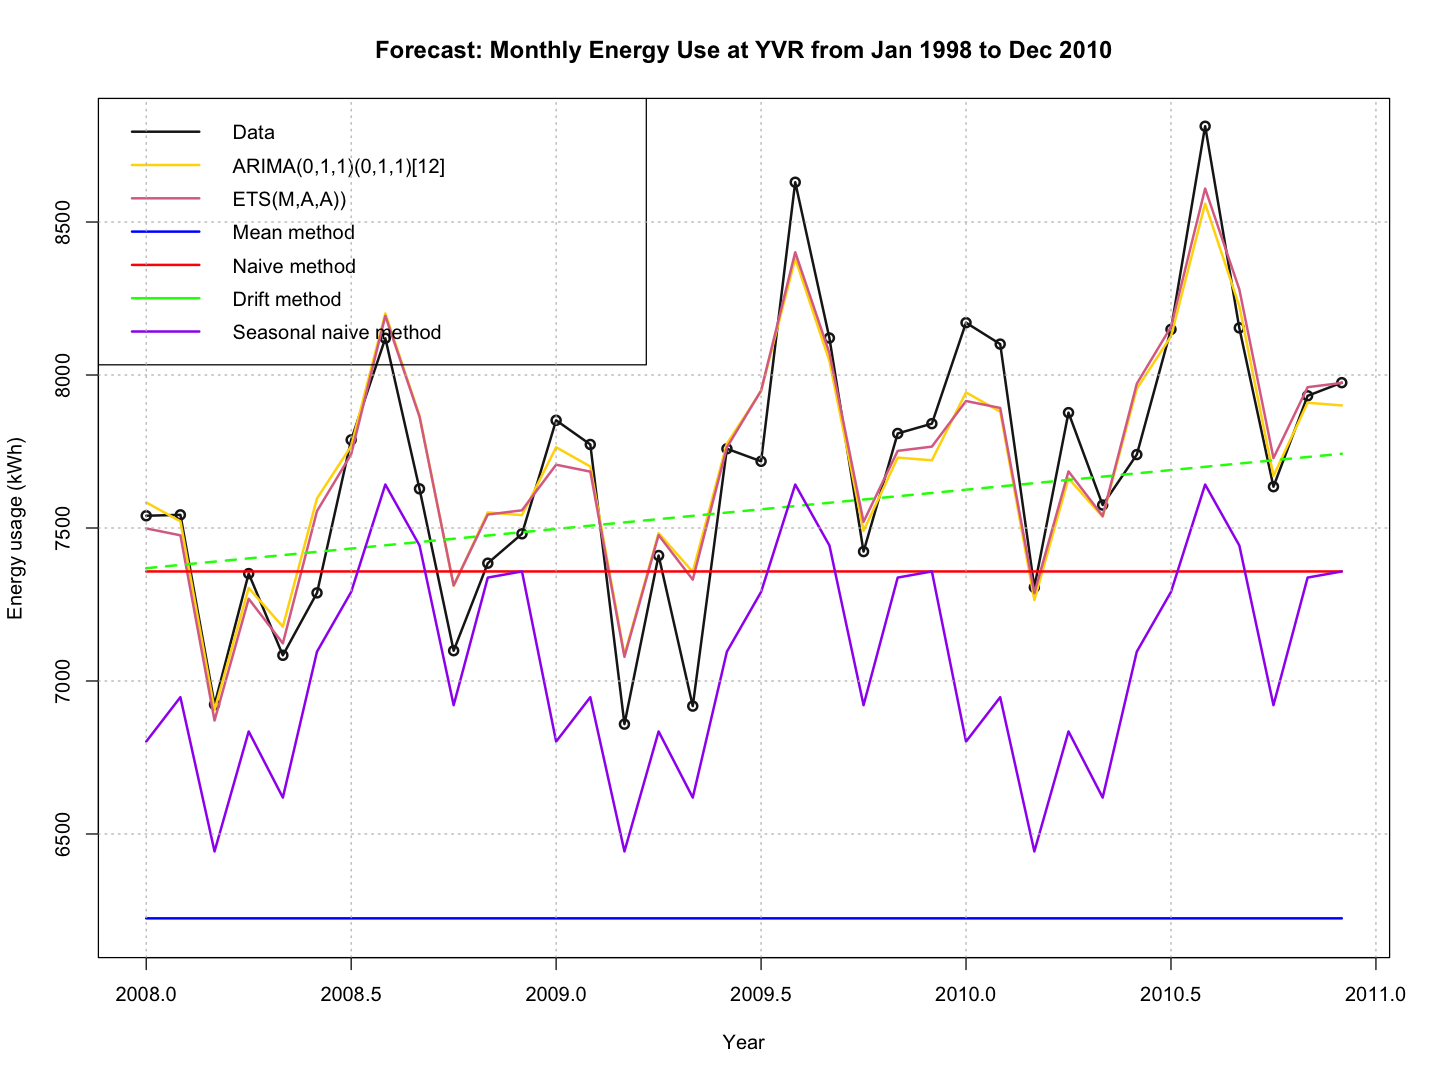

In [60]:
# Visual assessment
options(repr.plot.width=12, repr.plot.height=9)

plot(yvr.test, main = "Forecast: Monthly Energy Use at YVR from Jan 1998 to Dec 2010",
     ylab = "Energy usage (kWh)", xlab = "Year",
     cex.main= 1.2, lwd = 2, col = "gray11", ylim = c(6200,8800), type = "o")
lines(forecast(arima.best, h = 36)$mean+mean(residuals(arima.best)), col = "gold1", lwd = 2)
lines(fcst.ets$mean, col = "palevioletred", lwd = 2)
lines(fit1$mean, col = "blue", lwd = 2)
lines(fit2$mean, col = "red", lwd = 2)
lines(fit3$mean, col = "green", lwd = 2, lty = 2 )
lines(fit4$mean, col = "purple", lwd = 2)


legend("topleft",lty=1, lwd = 2, col=c("gray11",
                                       "gold1", 
                                       "palevioletred",
                                       "blue",
                                       "red",
                                      "green",
                                      "purple"), 
       c("Data", 
         "ARIMA(0,1,1)(0,1,1)[12]",
         "ETS(M,A,A))",
         "Mean method", "Naive method", "Drift method", "Seasonal naive method"))
grid(nx = NULL, ny = NULL, col = "grey", lty = "dotted")

In [61]:
model_final <- ets(yvr_elec, model = "MAA")
summary(model_final)

ETS(M,A,A) 

Call:
 ets(y = yvr_elec, model = "MAA") 

  Smoothing parameters:
    alpha = 0.7084 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5894.2397 
    b = 15.0939 
    s = -60.2598 -43.2879 -235.963 303.555 674.6531 220.7477
           29.4621 -373.681 -169.519 -575.7559 87.9496 142.0991

  sigma:  0.0219

     AIC     AICc      BIC 
2543.501 2547.581 2596.608 

Training set error measures:
                    ME     RMSE      MAE         MPE     MAPE      MASE
Training set -3.353891 136.2935 105.3347 -0.09586174 1.606211 0.3810014
                    ACF1
Training set -0.04345065

<div class="alert alert-block alert-info"> 
<a id="Forecasts"></a>   
    
# Forecasts (1.25 marks)

Calculate the point forecasts using your final model for the next three years (January 2011 through December 2013).

Plot the entire dataset with the forecasts from your best forecasting method, including prediction intervals.
</div>

In [62]:
forecast_final <- forecast(model_final, h = 36);forecast_final

         Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
Jan 2011       8173.279 7944.159  8402.400 7822.870  8523.689
Feb 2011       8134.109 7854.186  8414.032 7706.003  8562.215
Mar 2011       7485.462 7174.785  7796.139 7010.323  7960.601
Apr 2011       7906.742 7554.953  8258.532 7368.727  8444.758
May 2011       7717.637 7335.349  8099.926 7132.977  8302.297
Jun 2011       8135.805 7717.580  8554.029 7496.186  8775.424
Jul 2011       8342.109 7890.701  8793.517 7651.740  9032.478
Aug 2011       8811.081 8323.606  9298.556 8065.552  9556.610
Sep 2011       8454.988 7941.636  8968.341 7669.883  9240.093
Oct 2011       7930.476 7396.532  8464.421 7113.879  8747.074
Nov 2011       8138.277 7579.113  8697.440 7283.110  8993.444
Dec 2011       8136.326 7554.164  8718.488 7245.986  9026.667
Jan 2012       8353.730 7747.089  8960.370 7425.953  9281.506
Feb 2012       8314.559 7685.908  8943.211 7353.119  9275.999
Mar 2012       7665.912 7022.083  8309.742 6681.260  8650.565
Apr 2012

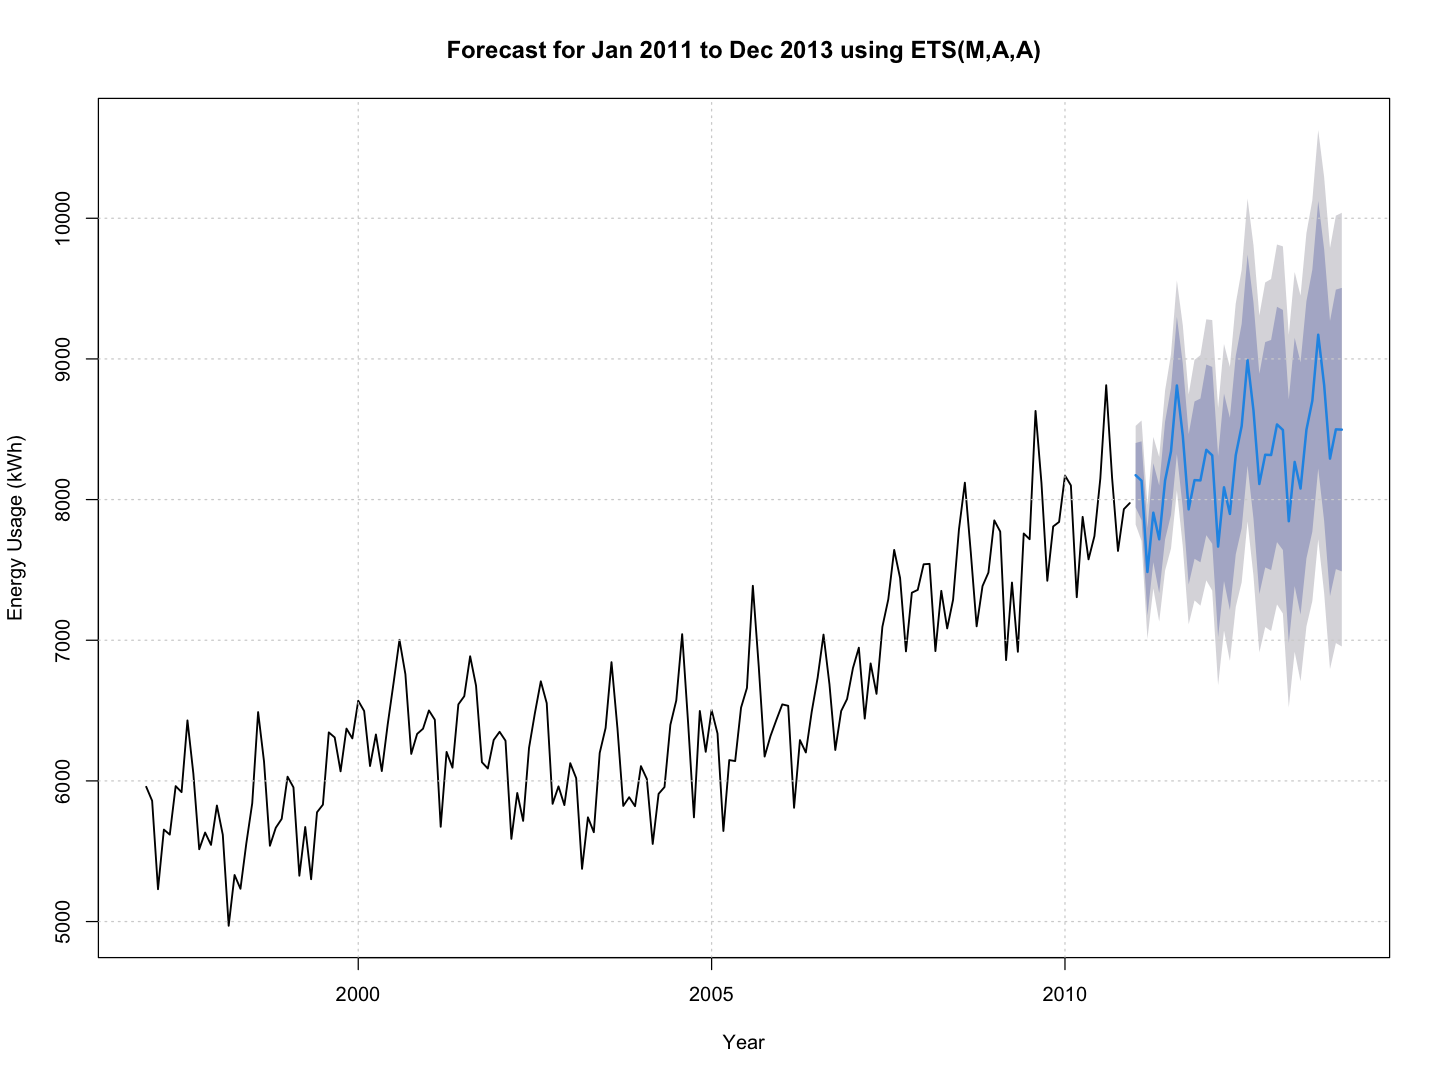

In [63]:
plot(forecast_final, 
     main = "Forecast for Jan 2011 to Dec 2013 using ETS(M,A,A)", 
     ylab = "Energy Usage (kWh)", xlab = "Year",lwd = 1.5)
grid(nx = NULL, ny = NULL, col = "lightgray", lty = "dotted")

<div class="alert alert-block alert-warning">
<a id="Discussion"></a>

# Discussion (300 words max.) (3 marks)

Discuss three limitations of this final model, and recommendations to address these limitations. (300 words max.)
<div>


- <p style = "color:#4863A0">The current limitation of the model lies in its reliance solely on historical data, restricting its foresight into energy demand shifts due to unforeseen infrastructural changes like airport expansions. This model's inability to factor in such developments could lead to underestimations of future energy needs. To overcome this, incorporating predictive information on infrastructural projects and anticipated operational changes into our forecasting model is recommended.
    
- <p style = "color:#4863A0">Another limitation is its current inability to effectively incorporate the impact of seasonal and holiday-related variations in passenger volumes, which are significant factors affecting energy consumption at the Vancouver airport. This model, while proficient in analyzing trends and patterns within the historical data, does not inherently adjust for the periodic spikes in energy usage associated with major holidays like Canada Day, Thanksgiving, Christmas, and New Year's Day, or specific periods such as university reading breaks. These events lead to increased airport activity and, consequently, energy demand, underscoring the necessity for a model that can account for these predictable yet fluctuating factors to enhance forecasting accuracy.
 
- <p style = "color:#4863A0">The model adeptly analyzes historical of data to forecast energy consumption at the Vancouver airport but may overlook sudden demand shifts from unforeseen events or operational changes. Its historical data reliance potentially misses emerging patterns. Enhancing this model with real-time operational and passenger behavior data—like flight frequency adjustments, new routes, and energy policy updates—could significantly improve forecast accuracy. Incorporating these variables offers a proactive approach to predicting energy needs, making the model more adaptable and responsive to the dynamic airport environment. This strategic adjustment ensures a forecasting framework that is both precise and anticipatory, aligning more closely with the airport's evolving energy landscape.

----

<div class="alert alert-block alert-danger">
<a id="AppendixA"></a>

# Appendix A:
# ETS models (1 mark)
</div>

In [31]:
# Fit the models
#auto ETS model chosen by R
ets0 <- ets(yvr.train)
#Holt-Winters additive method ETS(A,A,A)
ets1 <- hw(yvr.train, seasonal = "additive", h = 36)
#Holt-Winters multiplicative method ETS(A,A,M)
ets2 <- hw(yvr.train, seasonal = "multiplicative", h = 36)
#Holt-Winters additive method damped (A,Ad,A)
ets3 <- hw(yvr.train,  seasonal = "additive", h = 36, damped = TRUE)
#Holt-Winters multiplicative method damped (A,Ad,M)
ets4 <- hw(yvr.train, seasonal = "multiplicative", damped = TRUE, h = 36)
#Multiplicative error Holt-Winters addictive method ETS(M,M,A)
ets_best <- ets(yvr.train, model = "MAA")

# Fit seasonal adjusted models
yvr.train.stl <- stl(yvr.train, s.window = "periodic")
yvr.train.sa <- seasadj(yvr.train.stl)

#Holt's linear additive trend on seasonal adjusted data (A,A,N)s
ets5 <- holt(yvr.train.sa, initial = "optimal", h = 36)
#Exponential trend method on seasonal adjusted data (A,M,N)s
ets6 <- holt(yvr.train.sa, initial = "simple", exponential = TRUE, h = 36)
#Multiplicative error Holt-Linear's Additive (M, A, N) on sesonal adjusted data
ets7 <- ets(yvr.train.sa, model = "MAN")

In [32]:
# Calculate accuracy metrics
fcst0 <- forecast(ets0, h = 36)
fcst1 <- forecast(ets1, h = 36)
fcst2 <- forecast(ets2, h = 36)
fcst3 <- forecast(ets3, h = 36)
fcst4 <- forecast(ets4, h = 36)
fcst5 <- forecast(ets5, h = 36)$mean + seasonal(yvr.train.stl)[1:12]
fcst6 <- forecast(ets6, h = 36)$mean + seasonal(yvr.train.stl)[1:12]
fcst7 <- forecast(ets7, h = 36)$mean + seasonal(yvr.train.stl)[1:12]

acc.ets0 <- accuracy(fcst0, yvr.test)
acc.ets1 <- accuracy(fcst1, yvr.test)
acc.ets2 <- accuracy(fcst2, yvr.test)
acc.ets3 <- accuracy(fcst3, yvr.test)
acc.ets4 <- accuracy(fcst4, yvr.test)
acc.ets.best <- accuracy(fcst.ets, yvr.test)
acc.ets5 <- accuracy(fcst5, yvr.test)
acc.ets6 <- accuracy(fcst6, yvr.test)
acc.ets7 <- accuracy(fcst7, yvr.test)

In [33]:
summary(ets0) #(A,N,A) alpha = 0.8142 gamma = 1e-04 AICc 1956.8
summary(ets1) #(A,A,A) alpha = 0.7846 beta  = 1e-04 gamma = 1e-04 AICc 1961.2
summary(ets2) #(A,A,M) alpha = 0.4706 beta  = 1e-04 gamma = 0.0072 AICc 1984.2
summary(ets3) #(A,Ad,A) alpha = 0.7931  beta  = 1e-04  gamma = 1e-04  phi   = 0.98 
summary(ets4) #(A,Ad,M) alpha = 0.7692 beta  = 0.0067 gamma = 1e-04  phi   = 0.9691 AICc 1967
summary(ets5) #(A,A,N)s alpha = 0.8027 beta  = 1e-04 AICc 1927
summary(ets6) #(A,M,N)s alpha = 0.8009 beta  = 0.0244 
summary(ets7) #(M,A,N)s alpha = 0.8063 beta  = 1e-04 

ETS(A,N,A) 

Call:
 ets(y = yvr.train) 

  Smoothing parameters:
    alpha = 0.8142 
    gamma = 1e-04 

  Initial states:
    l = 6028.2465 
    s = -53.9951 -35.1353 -238.2527 322.9962 671.4127 226.3734
           66.8415 -359.4489 -191.2235 -589.7391 56.3954 123.7755

  sigma:  133.9544

     AIC     AICc      BIC 
1952.670 1956.808 1995.912 

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 12.73609 126.6517 98.09986 0.1709555 1.569775 0.3702114 -0.0144411


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = yvr.train, h = 36, seasonal = "additive") 

  Smoothing parameters:
    alpha = 0.7846 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5879.3546 
    b = 12.3652 
    s = -36.7977 -27.2016 -238.1219 321.0426 666.3048 232.4424
           58.5104 -349.8579 -192.2142 -564.3842 38.3341 91.9432

  sigma:  134.6878

     AIC     AICc      BIC 
1955.855 1961.224 2004.863 

Error measures:
                    ME     RMSE      MAE         MPE     MAPE      MASE
Training set -1.171192 126.2613 98.95847 -0.06213835 1.594299 0.3734517
                    ACF1
Training set 0.005411505

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2008       7485.996 7313.387 7658.605 7222.013 7749.979
Feb 2008       7444.636 7225.222 7664.050 7109.071 7780.200
Mar 2008       6854.252 6596.383 7112.120 6459.876 7248.627
Apr 2008       7238.806 6947.507 7530


Forecast method: Holt-Winters' multiplicative method

Model Information:
Holt-Winters' multiplicative method 

Call:
 hw(y = yvr.train, h = 36, seasonal = "multiplicative") 

  Smoothing parameters:
    alpha = 0.4706 
    beta  = 1e-04 
    gamma = 0.0072 

  Initial states:
    l = 5875.9098 
    b = 8.9647 
    s = 0.9826 0.9884 0.9611 1.0515 1.1023 1.0388
           1.0155 0.9525 0.9714 0.9096 1.0082 1.0182

  sigma:  0.0237

     AIC     AICc      BIC 
1978.826 1984.195 2027.834 

Error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE      ACF1
Training set 5.731122 136.4113 105.8658 0.02292035 1.702491 0.3995188 0.3457665

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2008       7517.507 7289.219 7745.795 7168.371 7866.643
Feb 2008       7450.360 7200.345 7700.374 7067.995 7832.724
Mar 2008       6729.247 6483.871 6974.624 6353.977 7104.518
Apr 2008       7196.257 6914.518 7477.997 6765.374 7627.140
May 2008       7063.


Forecast method: Damped Holt-Winters' additive method

Model Information:
Damped Holt-Winters' additive method 

Call:
 hw(y = yvr.train, h = 36, seasonal = "additive", damped = TRUE) 

  Smoothing parameters:
    alpha = 0.7931 
    beta  = 1e-04 
    gamma = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 5805.4605 
    b = 13.8363 
    s = -38.863 -43.2456 -244.5015 321 668.5009 230.8187
           64.3729 -346.505 -192.5901 -569.7257 56.5732 94.1651

  sigma:  135.8223

     AIC     AICc      BIC 
1958.927 1964.980 2010.817 

Error measures:
                   ME     RMSE      MAE       MPE    MAPE      MASE        ACF1
Training set 9.048528 126.7748 99.15104 0.1037289 1.59089 0.3741784 -0.01026726

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2008       7479.370 7305.306 7653.433 7213.163 7745.576
Feb 2008       7442.693 7220.519 7664.866 7102.908 7782.478
Mar 2008       6817.430 6555.841 7079.019 6417.365 7217.495
Apr 2008       7195.566 6899.76


Forecast method: Damped Holt-Winters' multiplicative method

Model Information:
Damped Holt-Winters' multiplicative method 

Call:
 hw(y = yvr.train, h = 36, seasonal = "multiplicative", damped = TRUE) 

  Smoothing parameters:
    alpha = 0.7692 
    beta  = 0.0067 
    gamma = 1e-04 
    phi   = 0.9691 

  Initial states:
    l = 5839.2095 
    b = 13.1174 
    s = 0.9892 0.993 0.9601 1.0494 1.1057 1.0382
           1.0139 0.947 0.9671 0.9063 1.0077 1.0224

  sigma:  0.0221

     AIC     AICc      BIC 
1960.935 1966.988 2012.825 

Error measures:
                   ME     RMSE     MAE       MPE     MAPE      MASE       ACF1
Training set 10.95501 127.3611 99.0056 0.1331349 1.583785 0.3736295 0.03576243

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
Jan 2008       7591.206 7376.255 7806.158 7262.466  7919.946
Feb 2008       7489.905 7221.530 7758.280 7079.461  7900.349
Mar 2008       6742.556 6458.613 7026.498 6308.303  7176.808
Apr 2008       7201.168 6858.0


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = yvr.train.sa, h = 36, initial = "optimal") 

  Smoothing parameters:
    alpha = 0.8027 
    beta  = 1e-04 

  Initial states:
    l = 5903.533 
    b = 10.8335 

  sigma:  125.8742

     AIC     AICc      BIC 
1926.983 1927.459 1941.397 

Error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.7495046 123.9524 96.08386 -0.0264682 1.541414 0.3626034
                     ACF1
Training set -0.001157524

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2008       7417.280 7255.966 7578.595 7170.571 7663.989
Feb 2008       7428.124 7221.254 7634.994 7111.744 7744.504
Mar 2008       7438.967 7194.893 7683.041 7065.688 7812.246
Apr 2008       7449.811 7173.490 7726.131 7027.214 7872.407
May 2008       7460.654 7155.468 7765.840 6993.912 7927.396
Jun 2008       7471.497 7139.944 7803.051 6964.429 7978.565
Jul 2008       7482.341 7126.361 7


Forecast method: Holt's method with exponential trend

Model Information:
Holt's method with exponential trend 

Call:
 holt(y = yvr.train.sa, h = 36, initial = "simple", exponential = TRUE) 

  Smoothing parameters:
    alpha = 0.8009 
    beta  = 0.0244 

  Initial states:
    l = 5828.6489 
    b = 0.9973 

  sigma:  0.0203
Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 14.09326 124.9294 95.56087 0.2004182 1.530736 0.3606298
                    ACF1
Training set -0.01299737

Forecasts:
         Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
Jan 2008       7435.090 7241.982  7626.395 7138.313  7727.600
Feb 2008       7460.938 7207.286  7716.919 7079.904  7853.272
Mar 2008       7486.875 7183.219  7794.237 7017.057  7965.816
Apr 2008       7512.902 7160.331  7861.080 6989.624  8066.907
May 2008       7539.020 7140.749  7934.285 6948.299  8159.503
Jun 2008       7565.229 7134.127  8003.738 6920.070  8273.125
Jul 2008       7591.

ETS(M,A,N) 

Call:
 ets(y = yvr.train.sa, model = "MAN") 

  Smoothing parameters:
    alpha = 0.8063 
    beta  = 1e-04 

  Initial states:
    l = 5833.0997 
    b = 12.4257 

  sigma:  0.0203

     AIC     AICc      BIC 
1927.846 1928.322 1942.260 

Training set error measures:
                     ME     RMSE      MAE         MPE     MAPE     MASE
Training set -0.5542801 123.6972 95.43533 -0.04669293 1.530887 0.360156
                     ACF1
Training set -0.006457343

In [34]:
ETS_method <- c("Auto ETS", 
             "Additive (seasonality) Holt-Winter's method (A,A,A)", 
             "Multiplicative (seasonality) Holt-Winter's method (A,A,M)", 
             "Additive Holt-Winters Damped (additive trend) method (A,Ad,A)", 
             "Multiplicative Holt-Winters Damped (additive trend) method(A,Ad,M)",
             "Seasonal Adjusted Additive Trend Method (A,A,N)",
             "Seasonal Adjusted Exponential Trend Method (A,M,N)",
             "Multiplicative error Additive Holt-Winter's method (M,A,A)",
             "Sesoanl Adjusted Multiplicative error Additive Trend Method (M,A,N)")

cbind(ETS_method, round(rbind(
mean(residuals(ets0), na.rm = TRUE),
mean(residuals(ets1), na.rm = TRUE),
mean(residuals(ets2), na.rm = TRUE),
mean(residuals(ets3), na.rm = TRUE),
mean(residuals(ets4), na.rm = TRUE),
mean(residuals(ets5), na.rm = TRUE),
mean(residuals(ets6), na.rm = TRUE),
mean(residuals(ets_best), na.rm = TRUE),
mean(residuals(ets7), na.rm = TRUE)),
                     4))

ETS_method                                                         
 [1,] Auto ETS                                                           
 [2,] Additive (seasonality) Holt-Winter's method (A,A,A)                
 [3,] Multiplicative (seasonality) Holt-Winter's method (A,A,M)          
 [4,] Additive Holt-Winters Damped (additive trend) method (A,Ad,A)      
 [5,] Multiplicative Holt-Winters Damped (additive trend) method(A,Ad,M) 
 [6,] Seasonal Adjusted Additive Trend Method (A,A,N)                    
 [7,] Seasonal Adjusted Exponential Trend Method (A,M,N)                 
 [8,] Multiplicative error Additive Holt-Winter's method (M,A,A)         
 [9,] Sesoanl Adjusted Multiplicative error Additive Trend Method (M,A,N)
             
 [1,] 12.7361
 [2,] -1.1712
 [3,] 7e-04  
 [4,] 9.0485 
 [5,] 0.0017 
 [6,] 0.7495 
 [7,] 14.0933
 [8,] -0.001 
 [9,] -1e-04


	Ljung-Box test

data:  Residuals from ETS(A,N,A)
Q* = 14.089, df = 24, p-value = 0.9446

Model df: 0.   Total lags used: 24



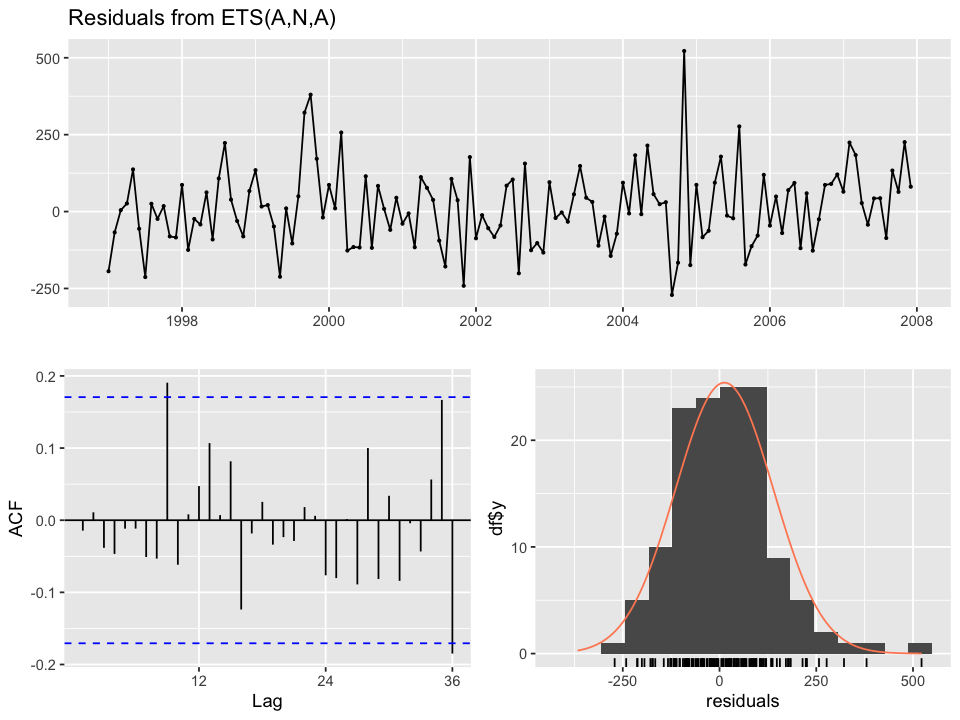


	Ljung-Box test

data:  Residuals from Holt-Winters' additive method
Q* = 14.031, df = 24, p-value = 0.9459

Model df: 0.   Total lags used: 24



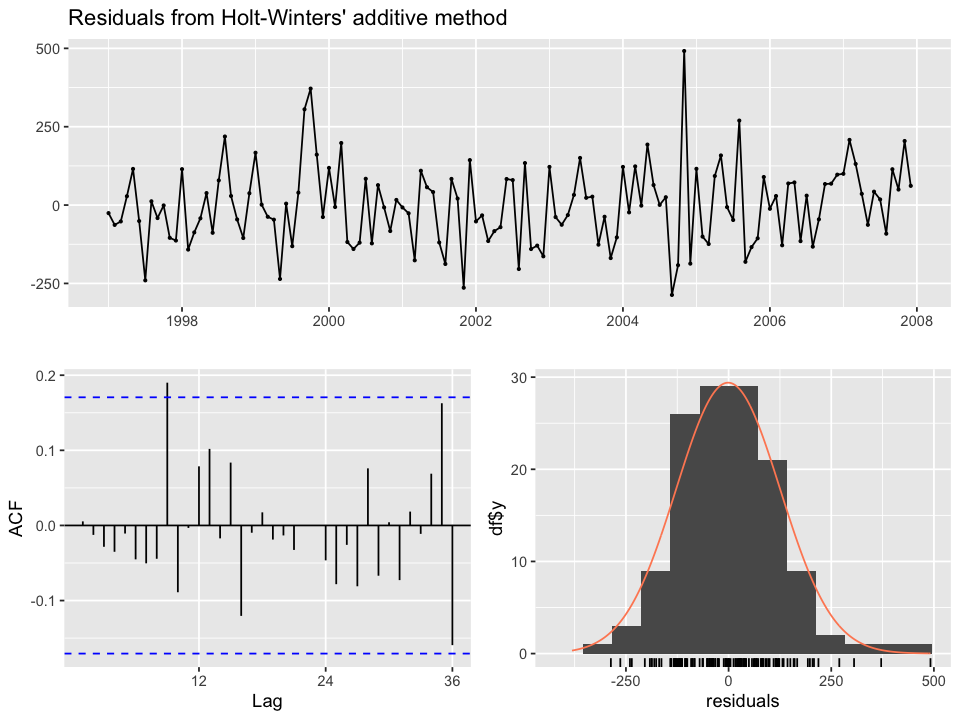


	Ljung-Box test

data:  Residuals from Holt-Winters' multiplicative method
Q* = 39.469, df = 24, p-value = 0.02437

Model df: 0.   Total lags used: 24



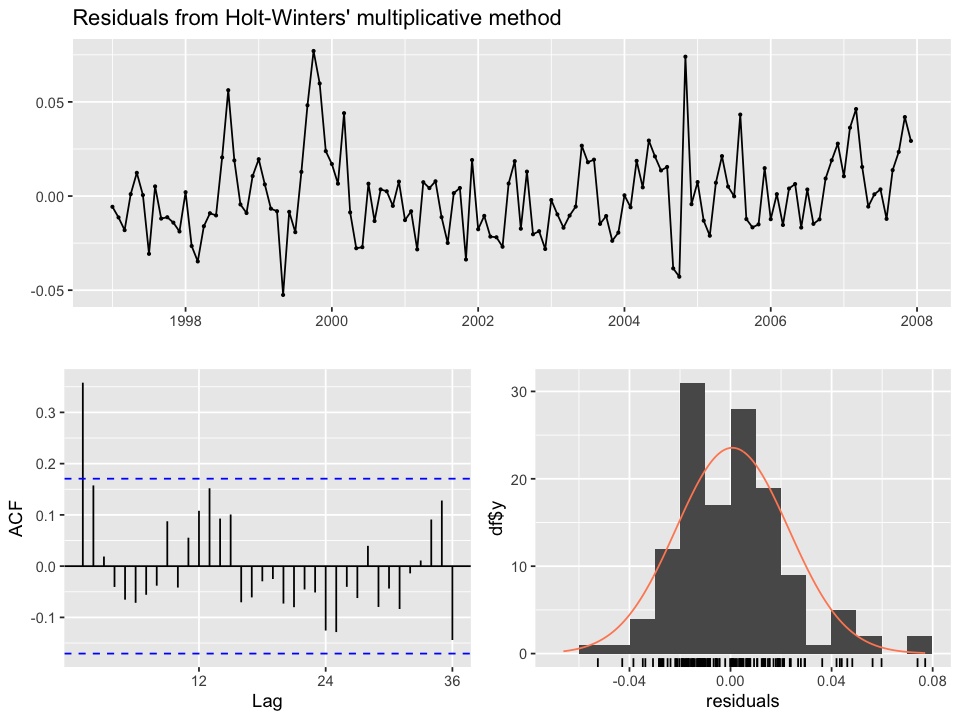


	Ljung-Box test

data:  Residuals from Damped Holt-Winters' additive method
Q* = 13.308, df = 24, p-value = 0.9608

Model df: 0.   Total lags used: 24



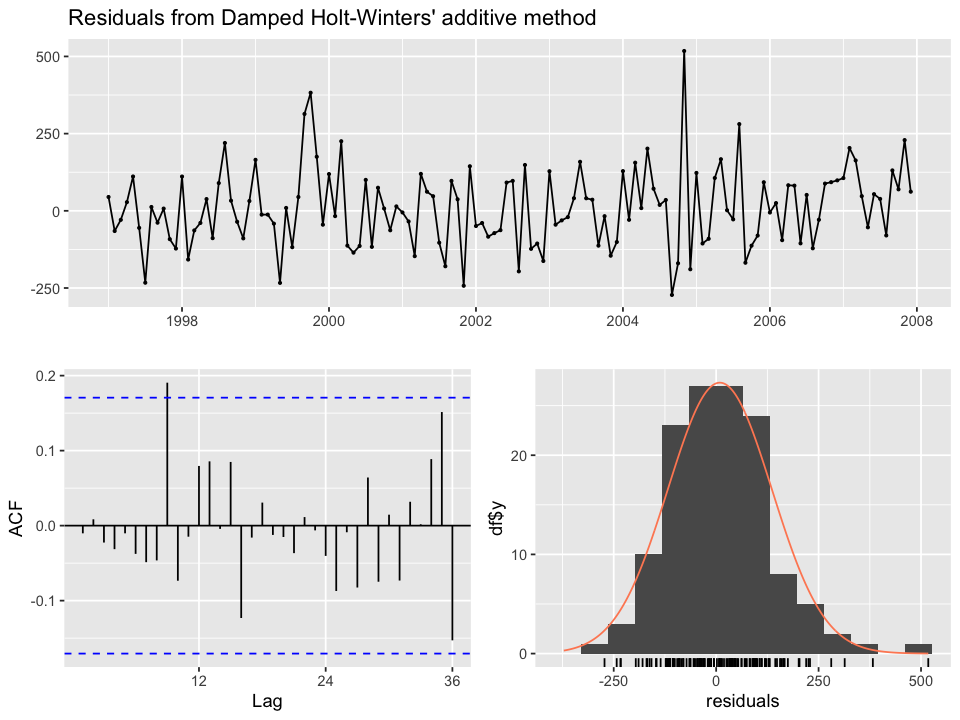


	Ljung-Box test

data:  Residuals from Damped Holt-Winters' multiplicative method
Q* = 15.495, df = 24, p-value = 0.9054

Model df: 0.   Total lags used: 24



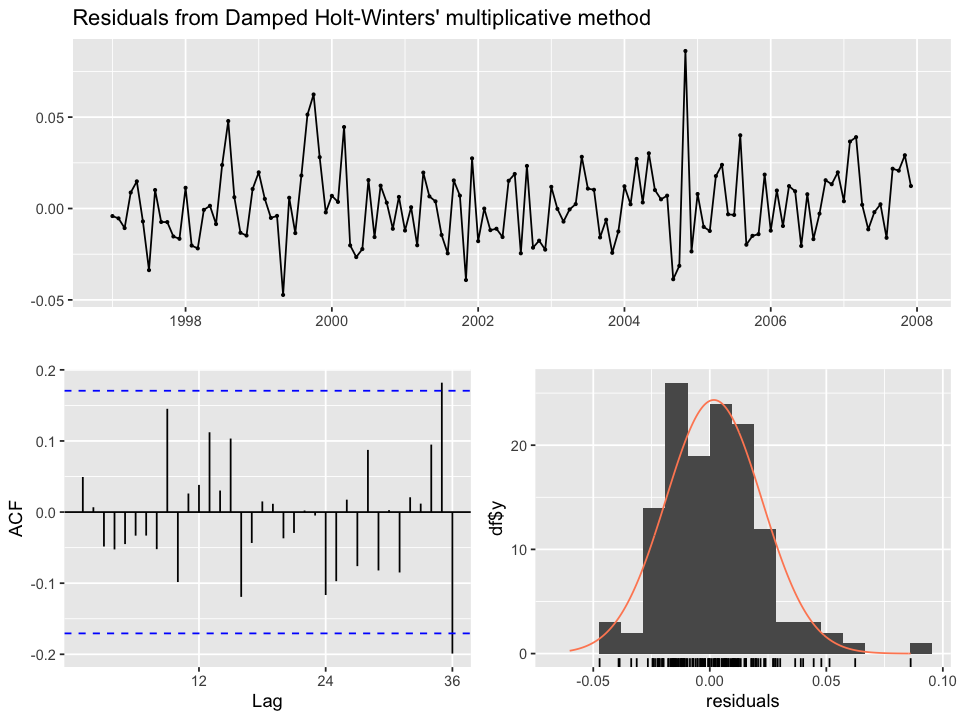


	Ljung-Box test

data:  Residuals from Holt's method
Q* = 15.92, df = 24, p-value = 0.8909

Model df: 0.   Total lags used: 24



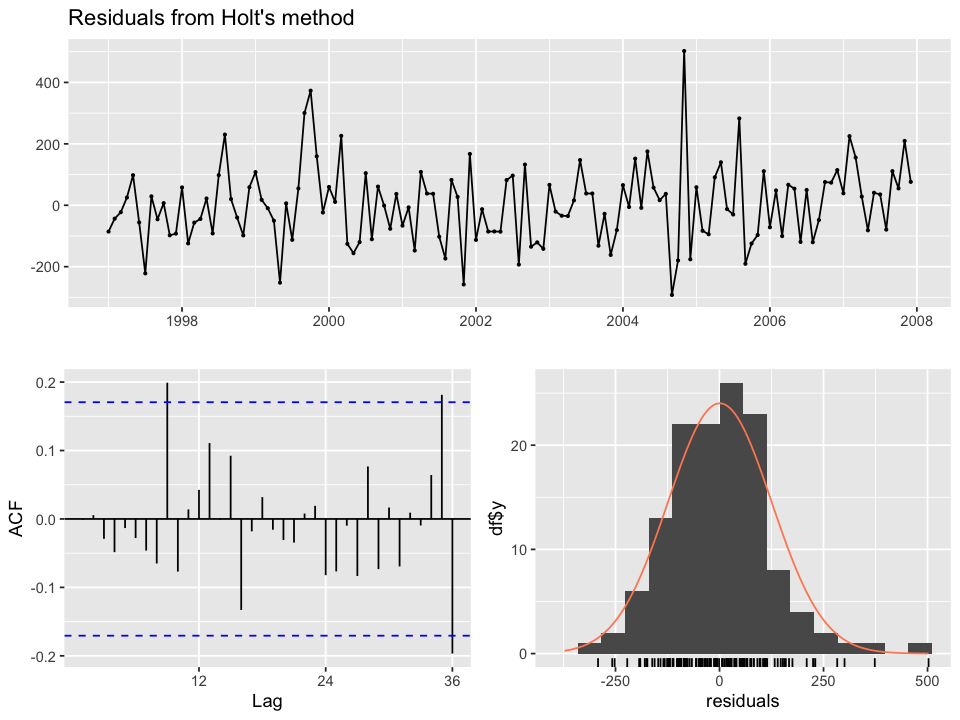


	Ljung-Box test

data:  Residuals from Holt's method with exponential trend
Q* = 16.852, df = 24, p-value = 0.8549

Model df: 0.   Total lags used: 24



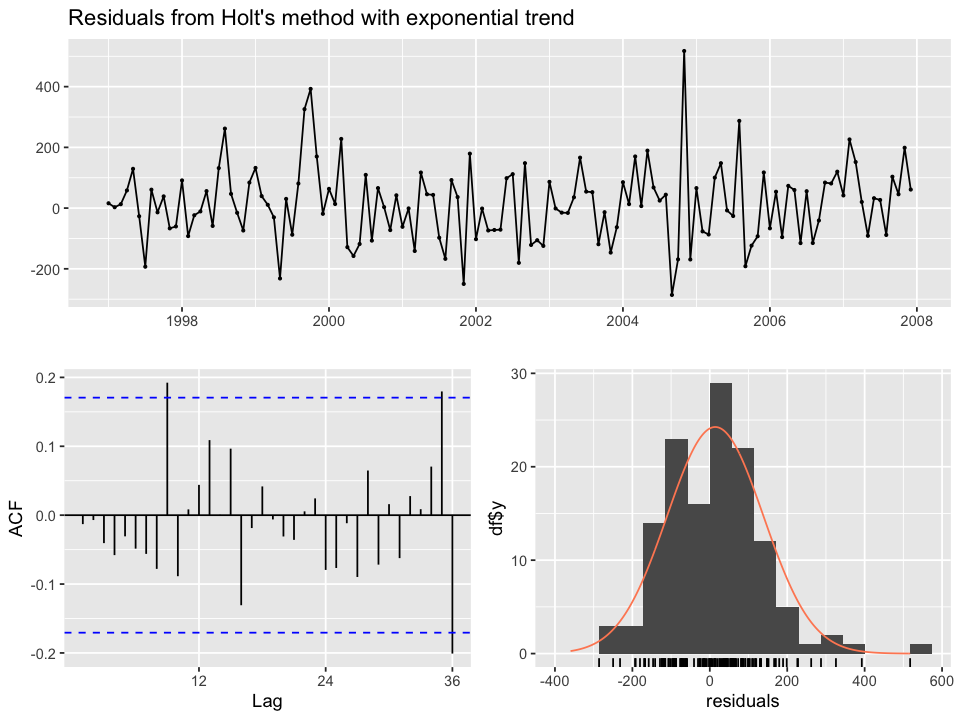


	Ljung-Box test

data:  Residuals from ETS(M,A,N)
Q* = 15.06, df = 24, p-value = 0.919

Model df: 0.   Total lags used: 24



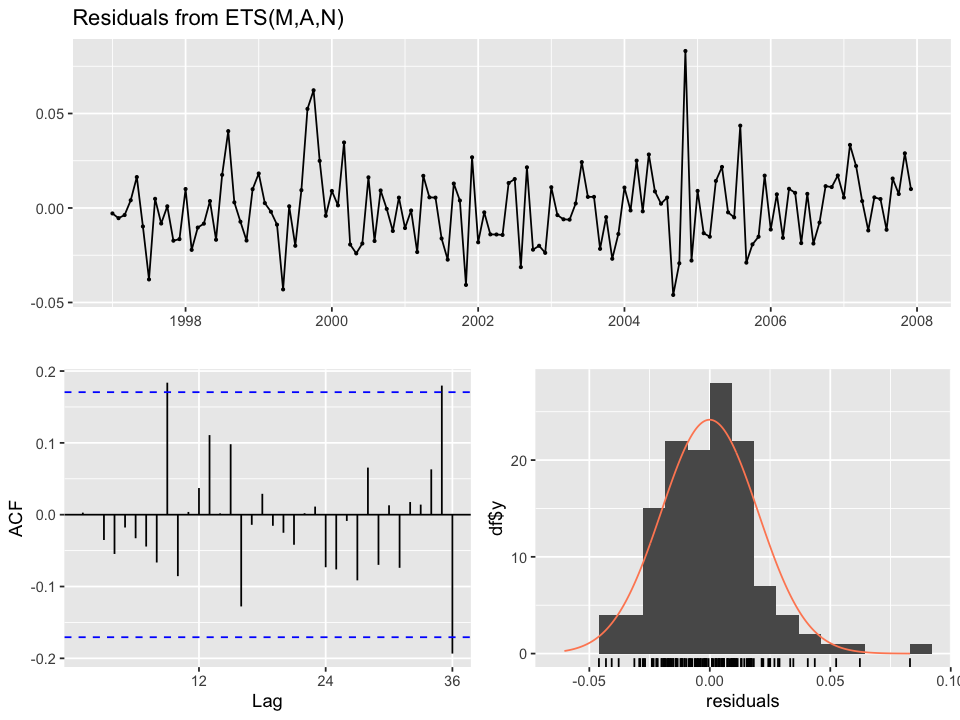

In [35]:
options(repr.plot.width=8, repr.plot.height=6)

checkresiduals(ets0) #p: 0.9446
checkresiduals(ets1) #p: 0.9459
checkresiduals(ets2) #p: 0.02437 reject null
checkresiduals(ets3) #p: 0.9608
checkresiduals(ets4) #p: 0.9054
checkresiduals(ets5) #p-value = 0.8909
checkresiduals(ets6) #p-value = 0.8549
checkresiduals(ets7) #p-value = 0.919

---

<div class="alert alert-block alert-danger">
<a id="AppendixB"></a>

# Appendix B:
# ARIMA Models (1 mark)
</div>

In [36]:
# Fit the model
arima1 <- Arima(yvr.train, order = c(0,1,3), seasonal = c(0,1,2))
arima2 <- Arima(yvr.train, order = c(0,1,3), seasonal = c(2,1,0))
arima3 <- Arima(yvr.train, order = c(1,1,0), seasonal = c(2,1,0))
arima4 <- Arima(yvr.train, order = c(1,1,0), seasonal = c(0,1,2))
arima5 <- Arima(yvr.train, order = c(0,1,2), seasonal = c(0,1,2))
arima6 <- Arima(yvr.train, order = c(1,1,1), seasonal = c(2,1,2))
arima7 <- Arima(yvr.train, order = c(0,1,1), seasonal = c(0,1,1))
arima.best <- Arima(yvr.train, order = c(1,1,0), seasonal = c(0,1,1))
arima.auto <- auto.arima(yvr.train) #(1,1,0)(2,1,0)

In [37]:
# Calculate scores
acc.arima1 <- accuracy(forecast(arima1, h = 36), yvr.test)
acc.arima2 <- accuracy(forecast(arima2, h = 36), yvr.test)
acc.arima3 <- accuracy(forecast(arima3, h = 36), yvr.test)
acc.arima4 <- accuracy(forecast(arima4, h = 36), yvr.test)
acc.arima5 <- accuracy(forecast(arima5, h = 36), yvr.test)
acc.arima6 <- accuracy(forecast(arima6, h = 36), yvr.test)
acc.arima7 <- accuracy(forecast(arima7, h = 36), yvr.test)
acc.arima.best <- accuracy(forecast(arima.best, h = 36), yvr.test)
acc.arima.auto <- accuracy(forecast(arima.auto, h = 36), yvr.test)

In [38]:
ARIMA_method <- c("ARIMA(0,1,3)(0,1,2)", 
             "ARIMA(0,1,3)(2,1,0)",
             "ARIMA(1,1,0)(2,1,0)",
             "ARIMA(1,1,0)(0,1,2)",
             "ARIMA(0,1,2)(0,1,2)",
             "ARIMA(1,1,1)(2,1,2)",
             "ARIMA(1,1,0)(0,1,1)",
             "ARIMA(1,1,0)(1,1,0)",
             "arima.auto")

cbind(ARIMA_method, round(rbind(
mean(residuals(arima1)),
mean(residuals(arima2)),
mean(residuals(arima3)),
mean(residuals(arima4)),
mean(residuals(arima5)),
mean(residuals(arima6)),
mean(residuals(arima7)),
mean(residuals(arima.best)),
mean(residuals(arima.auto))),4))

ARIMA_method               
 [1,] ARIMA(0,1,3)(0,1,2) 10.7795
 [2,] ARIMA(0,1,3)(2,1,0) 11.0355
 [3,] ARIMA(1,1,0)(2,1,0) 9.9027 
 [4,] ARIMA(1,1,0)(0,1,2) 9.4851 
 [5,] ARIMA(0,1,2)(0,1,2) 9.8331 
 [6,] ARIMA(1,1,1)(2,1,2) 9.8701 
 [7,] ARIMA(1,1,0)(0,1,1) 9.8519 
 [8,] ARIMA(1,1,0)(1,1,0) 9.4951 
 [9,] arima.auto          9.9027

In [39]:
options(repr.plot.width=6, repr.plot.height=8)
summary(arima1)
summary(arima2)
summary(arima3)
summary(arima4)
summary(arima5)
summary(arima6)
summary(arima7)
summary(arima.auto) #(1,1,0)(2,1,0)

Series: yvr.train 
ARIMA(0,1,3)(0,1,2)[12] 

Coefficients:
          ma1     ma2      ma3     sma1    sma2
      -0.2211  0.0223  -0.0819  -0.8398  -0.160
s.e.   0.0919  0.0947   0.0965   0.1982   0.096

sigma^2 = 17661:  log likelihood = -761.03
AIC=1534.07   AICc=1534.82   BIC=1550.74

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 10.77955 123.5034 90.30056 0.1452083 1.437185 0.3407783
                     ACF1
Training set -0.006910652

Series: yvr.train 
ARIMA(0,1,3)(2,1,0)[12] 

Coefficients:
          ma1     ma2      ma3     sar1     sar2
      -0.2549  0.0400  -0.0743  -0.4833  -0.2139
s.e.   0.0935  0.0937   0.0999   0.0975   0.1008

sigma^2 = 24681:  log likelihood = -769.7
AIC=1551.4   AICc=1552.15   BIC=1568.07

Training set error measures:
                   ME    RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 11.03547 145.997 104.6241 0.1498218 1.663837 0.3948328 -0.00673683

Series: yvr.train 
ARIMA(1,1,0)(2,1,0)[12] 

Coefficients:
          ar1     sar1     sar2
      -0.2482  -0.4993  -0.2136
s.e.   0.0909   0.0937   0.1006

sigma^2 = 24330:  log likelihood = -769.95
AIC=1547.9   AICc=1548.25   BIC=1559.01

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 9.902711 146.2229 104.9458 0.1326503 1.668495 0.3960468
                     ACF1
Training set -0.008077956

Series: yvr.train 
ARIMA(1,1,0)(0,1,2)[12] 

Coefficients:
          ar1     sma1     sma2
      -0.2130  -0.8573  -0.1426
s.e.   0.0903   0.2078   0.0929

sigma^2 = 17423:  log likelihood = -761.39
AIC=1530.78   AICc=1531.13   BIC=1541.89

Training set error measures:
                   ME     RMSE      MAE       MPE    MAPE      MASE
Training set 9.485071 123.7373 90.17385 0.1261693 1.43591 0.3403001
                     ACF1
Training set -0.007771164

Series: yvr.train 
ARIMA(0,1,2)(0,1,2)[12] 

Coefficients:
          ma1     ma2     sma1     sma2
      -0.2167  0.0080  -0.8604  -0.1395
s.e.   0.0920  0.0925   0.2048   0.0926

sigma^2 = 17565:  log likelihood = -761.38
AIC=1532.77   AICc=1533.3   BIC=1546.66

Training set error measures:
                   ME     RMSE      MAE       MPE    MAPE      MASE
Training set 9.833052 123.7048 90.58056 0.1307149 1.44244 0.3418349
                     ACF1
Training set -0.006881781

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”


Series: yvr.train 
ARIMA(1,1,1)(2,1,2)[12] 

Coefficients:
         ar1      ma1     sar1   sar2     sma1     sma2
      -0.096  -0.1111  -0.4304  0.146  -0.4094  -0.5899
s.e.     NaN   0.0897   0.0916  0.108   0.1489   0.1267

sigma^2 = 18020:  log likelihood = -761.09
AIC=1536.19   AICc=1537.2   BIC=1555.64

Training set error measures:
                   ME    RMSE      MAE       MPE     MAPE      MASE
Training set 9.870108 124.202 90.24718 0.1321682 1.437051 0.3405768
                     ACF1
Training set -0.005756456

Series: yvr.train 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.2021  -0.9006
s.e.   0.0909   0.1912

sigma^2 = 18710:  log likelihood = -762.5
AIC=1531   AICc=1531.21   BIC=1539.33

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 9.851918 128.7797 94.25649 0.1303166 1.499484 0.3557073
                     ACF1
Training set -0.006835481

Series: yvr.train 
ARIMA(1,1,0)(2,1,0)[12] 

Coefficients:
          ar1     sar1     sar2
      -0.2482  -0.4993  -0.2136
s.e.   0.0909   0.0937   0.1006

sigma^2 = 24330:  log likelihood = -769.95
AIC=1547.9   AICc=1548.25   BIC=1559.01

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 9.902711 146.2229 104.9458 0.1326503 1.668495 0.3960468
                     ACF1
Training set -0.008077956


	Ljung-Box test

data:  Residuals from ARIMA(0,1,3)(0,1,2)[12]
Q* = 17.359, df = 19, p-value = 0.5656

Model df: 5.   Total lags used: 24



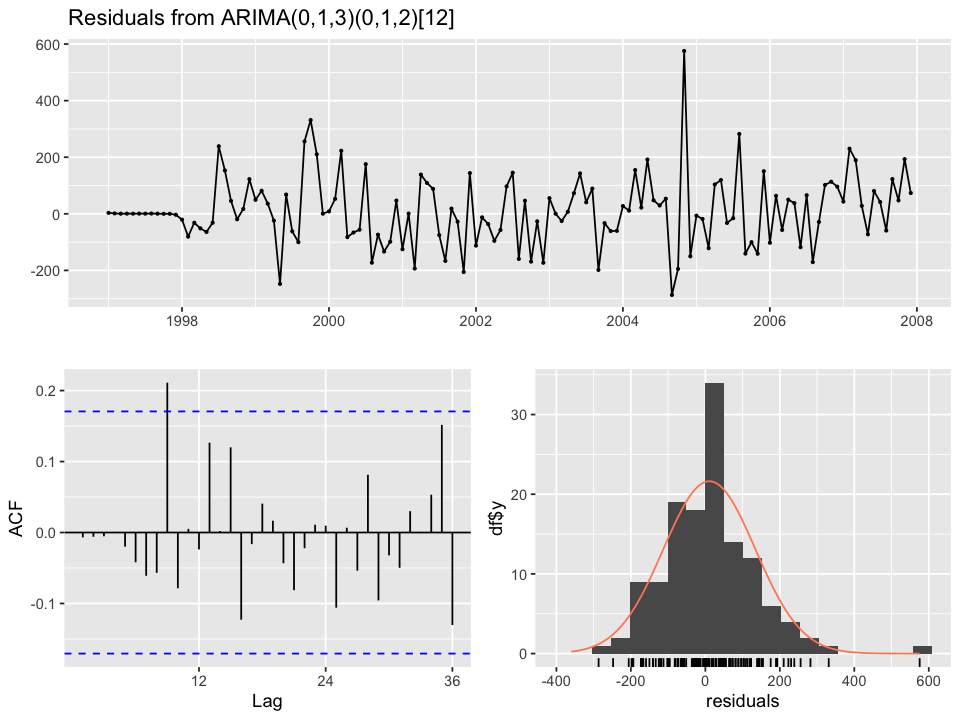


	Ljung-Box test

data:  Residuals from ARIMA(0,1,3)(2,1,0)[12]
Q* = 20.869, df = 19, p-value = 0.3441

Model df: 5.   Total lags used: 24



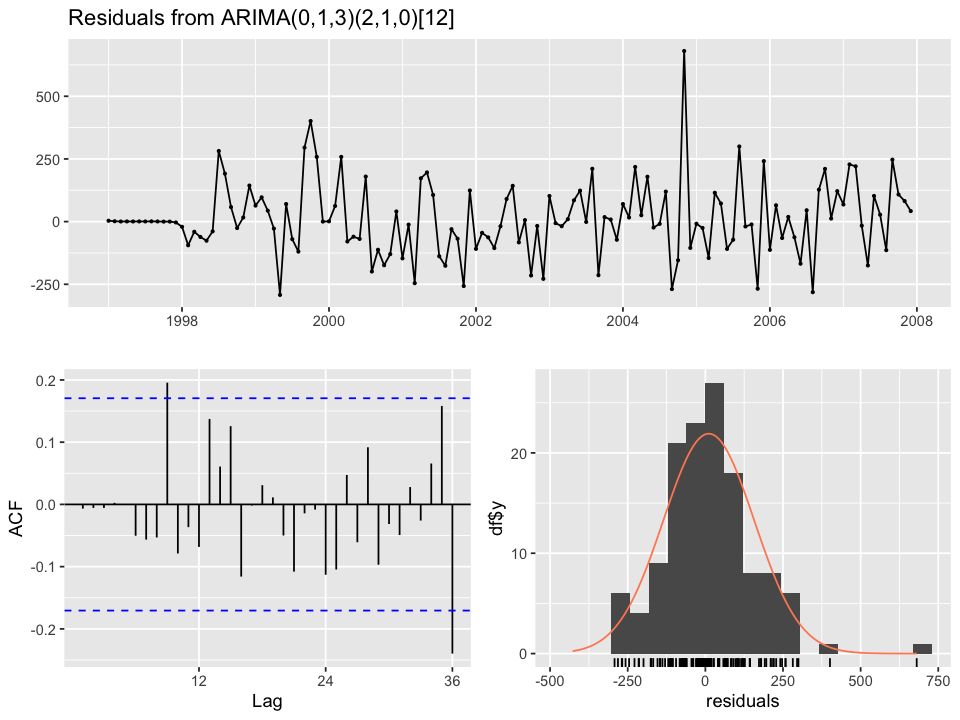


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(2,1,0)[12]
Q* = 22.208, df = 21, p-value = 0.3876

Model df: 3.   Total lags used: 24



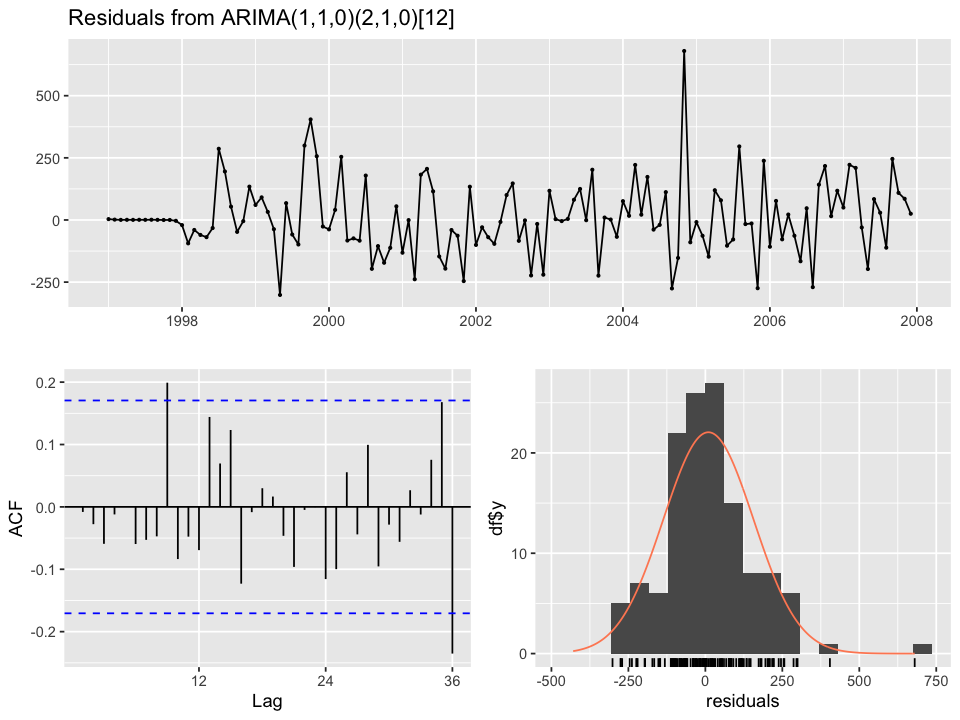


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(0,1,2)[12]
Q* = 18.958, df = 21, p-value = 0.5878

Model df: 3.   Total lags used: 24



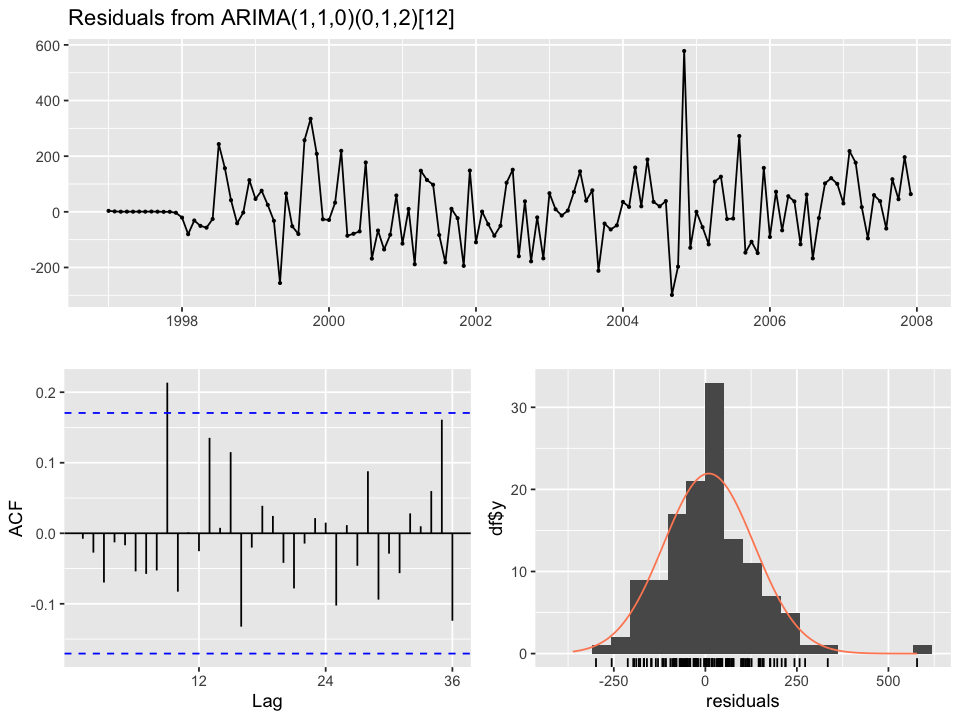


	Ljung-Box test

data:  Residuals from ARIMA(0,1,2)(0,1,2)[12]
Q* = 18.967, df = 20, p-value = 0.524

Model df: 4.   Total lags used: 24



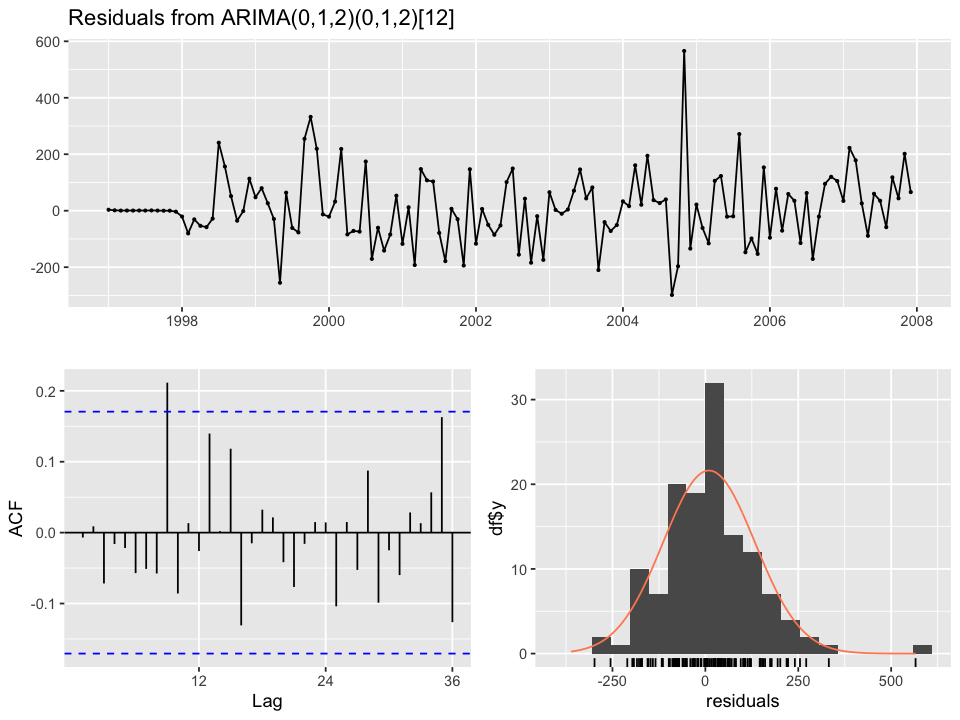


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(2,1,2)[12]
Q* = 17.245, df = 18, p-value = 0.5063

Model df: 6.   Total lags used: 24



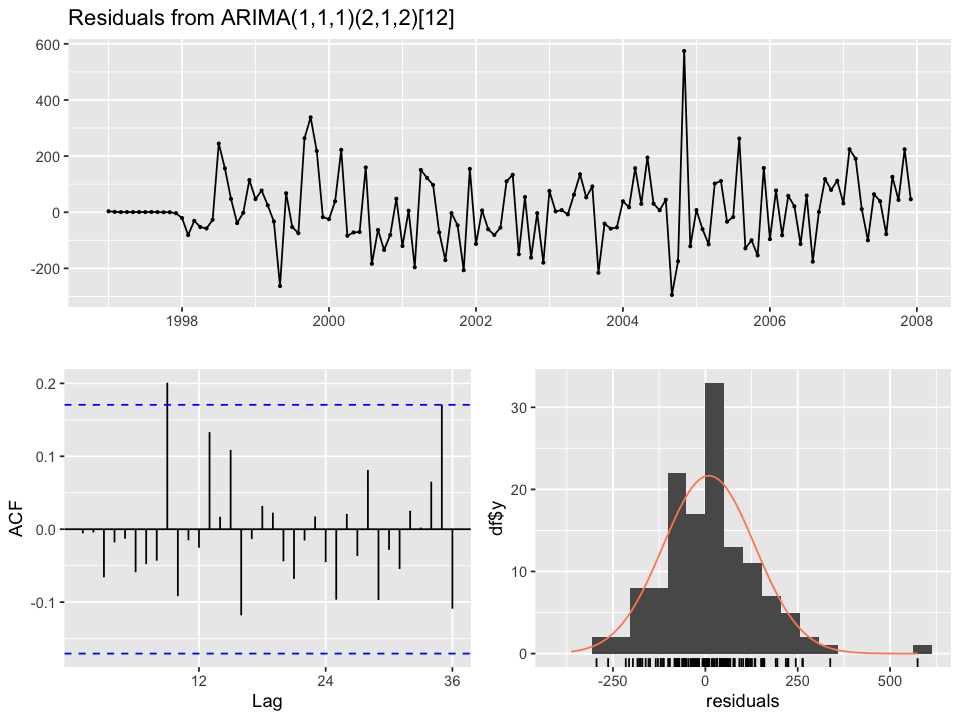


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,1)[12]
Q* = 17.582, df = 22, p-value = 0.7305

Model df: 2.   Total lags used: 24



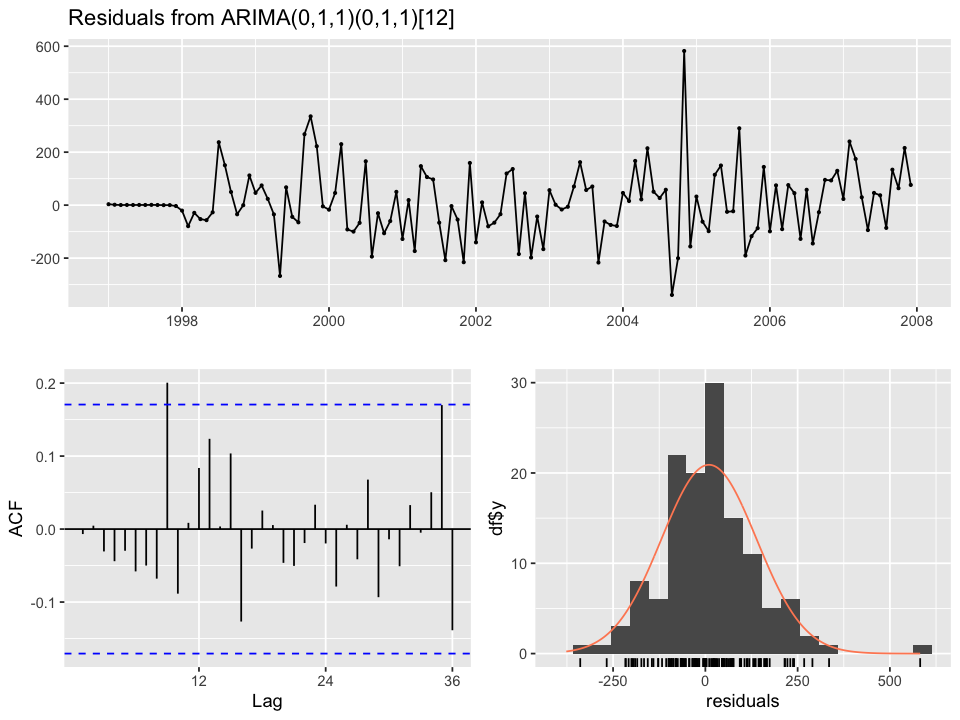


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(2,1,0)[12]
Q* = 22.208, df = 21, p-value = 0.3876

Model df: 3.   Total lags used: 24



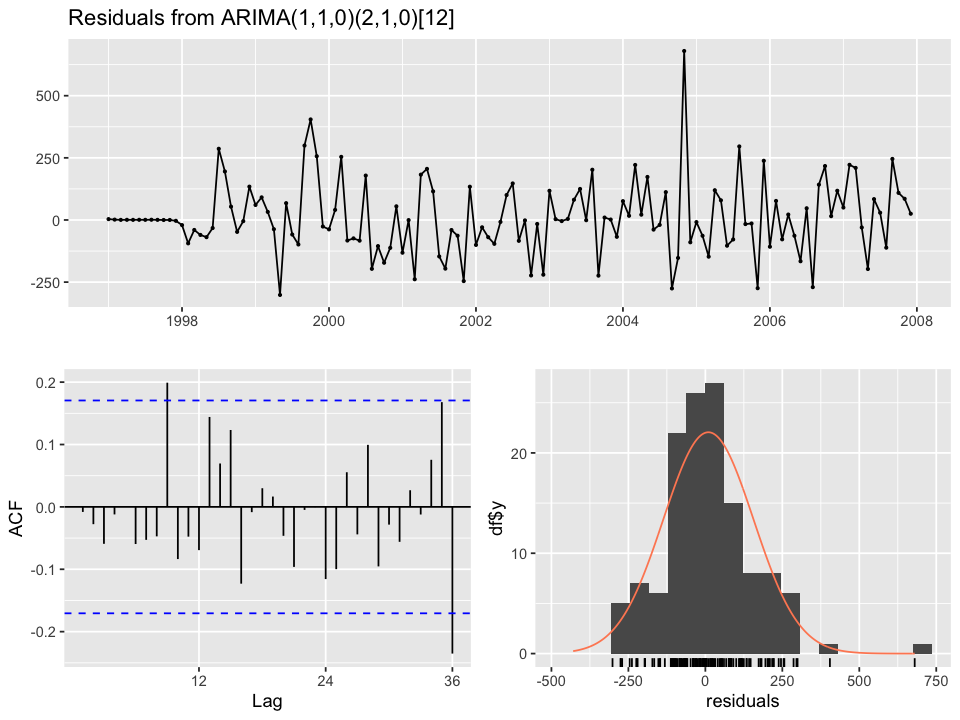

In [40]:
options(repr.plot.width=8, repr.plot.height=6)
checkresiduals(arima1) #0.5656
checkresiduals(arima2) #0.3441
checkresiduals(arima3) #0.3876
checkresiduals(arima4) #0.5878
checkresiduals(arima5) ##0.5878
checkresiduals(arima6) #0.5063
checkresiduals(arima7) #0.7305
checkresiduals(arima.auto) #0.3876